In [44]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy
import random
import scipy.constants as const

### Define functions

In [45]:
# generate NxN grid of spin either with -1 or 1 for ising model 
def generate_grid(N):
    return np.random.choice([-1,1],(N,N)) 

def generate_grid_with_tendency(N,x):
    return np.random.choice([-1,1],(N,N),p=[x,1-x])

def energy_interaction_with_neighbors(grid,i,j):
    length = len(grid[0]) # assuming quadratic grid

    random_point = grid[i,j]

    left = grid[(i-1)%length,j]
    right = grid[(i+1)%length,j]
    up = grid[i,(j-1)%length]
    down = grid[i,(j+1)%length]

    # calculate energy of the grid
    energy = random_point * (left+right+up+down)
    return energy

def M(array): #magnetization function
    return np.mean(array)

def U(array,a): #internal energy functio 
    U = 0
    length = len(array[0])
    for i in range(length):
        for j in range(length):
            U -= energy_interaction_with_neighbors(array,i,j)
    U  -= a*M(array) # a = myu*B/Energy
    return U 

def heat_capacity(array,temperature):
    #convert array into numpy array
    array = np.array(array)
    return np.var(array) / (temperature**2)

def susceptibility(array,temperature):
    array = np.array(array)
    return np.var(array)/ (temperature)

# calculate energy of the grid
def Hamiltonian_Monte_carlo(grid,temperature, a = 0, J = 1):
    length = len(grid[0])
    i = np.random.randint(0,length)
    j = np.random.randint(0,length)
    count = 0

    d_energy =  J * 2 * energy_interaction_with_neighbors(grid,i,j) - 2*a*grid[i,j]
    
    # flip spin according to Energy
    if d_energy < 0 :
        grid[i,j] = - grid[i,j]
        count += 1
    elif np.random.uniform() < np.exp(-d_energy/(temperature)):
            grid[i,j] = - grid[i,j]
            count += 1

    #print(grid)
    return grid, count

### Calculate and iterate

In [46]:
length_grid = 30
grid_array = generate_grid_with_tendency(length_grid,0.55)

/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_72859/3675267484.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


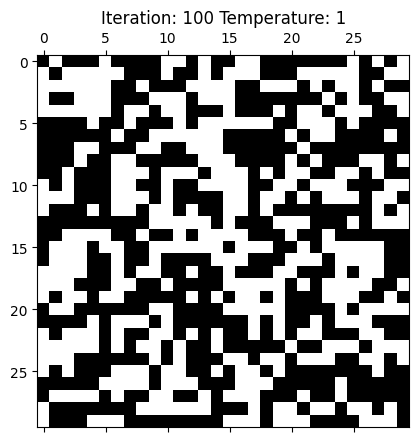

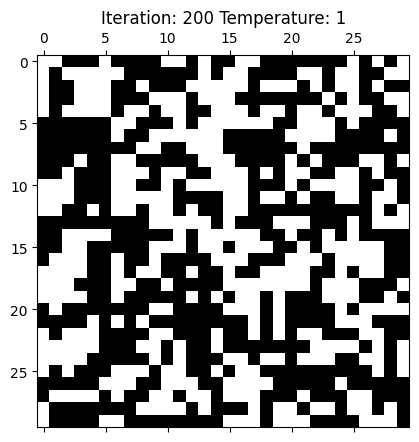

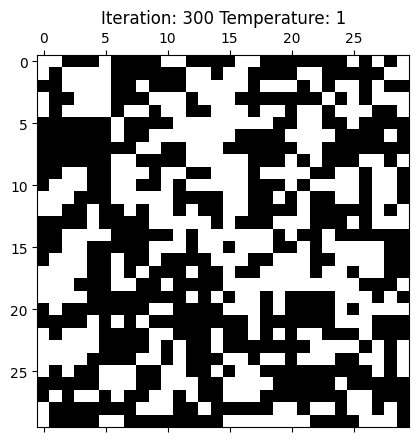

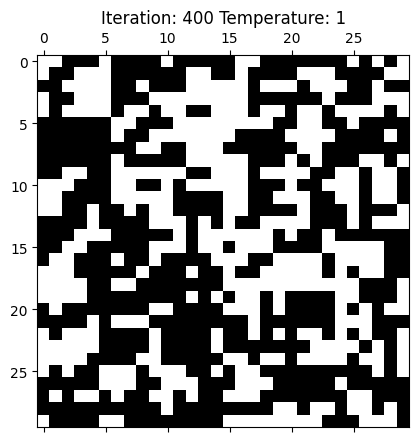

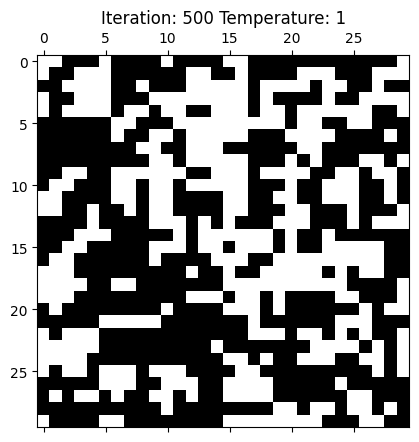

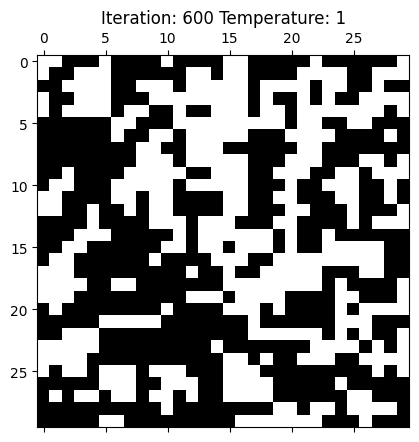

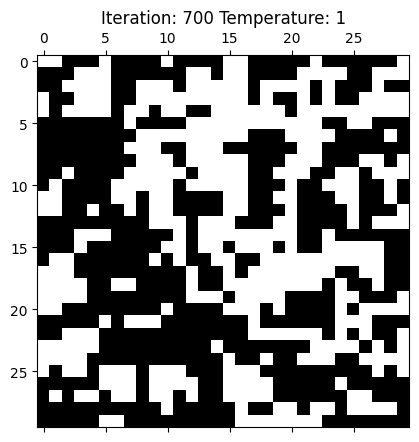

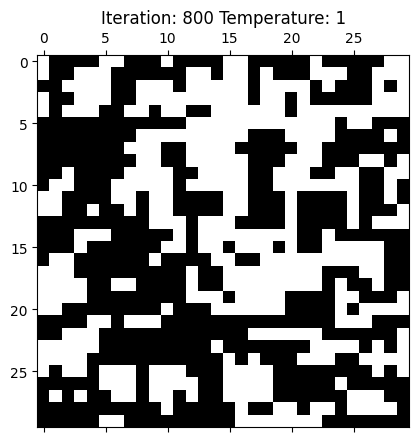

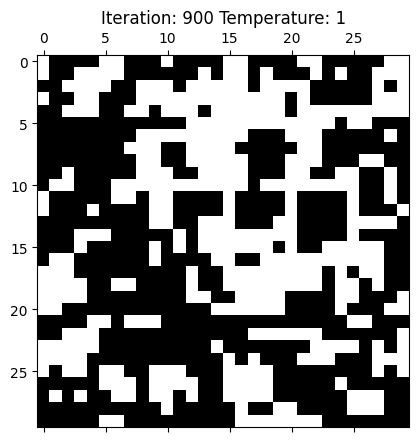

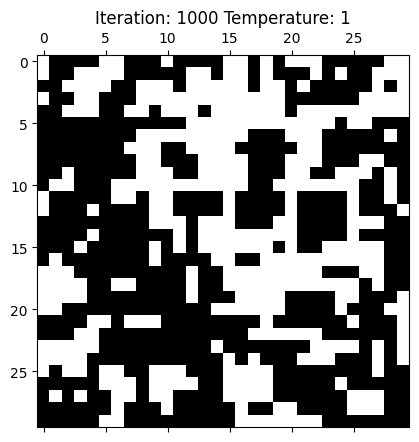

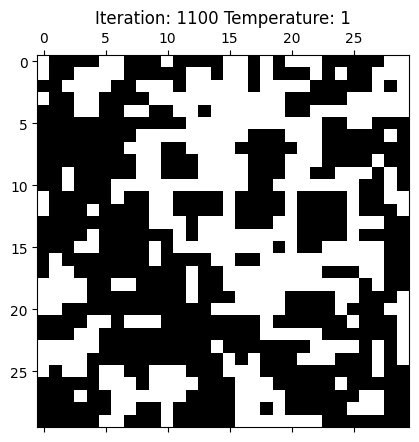

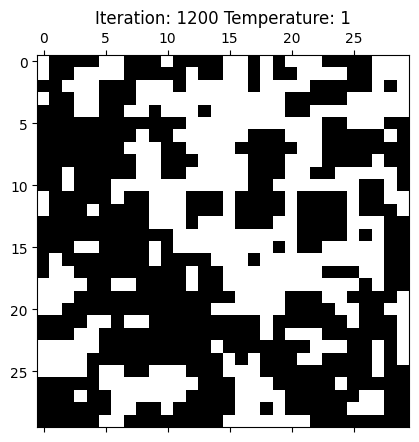

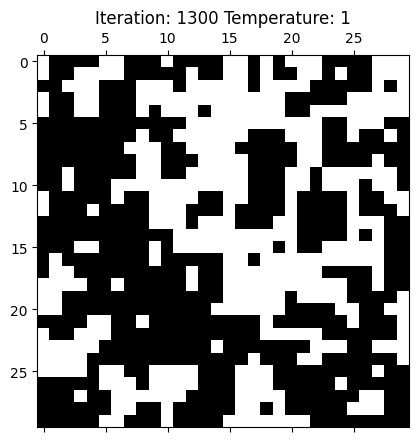

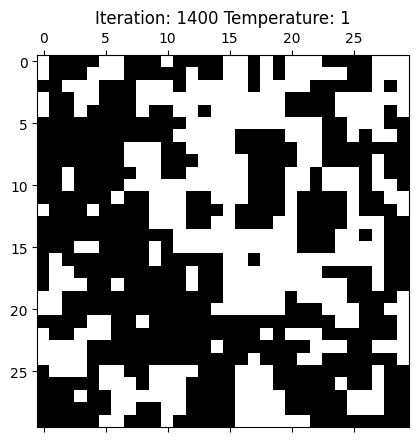

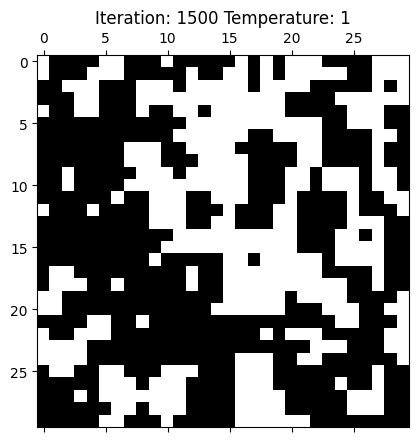

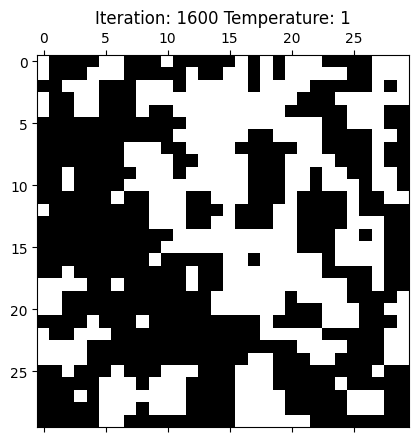

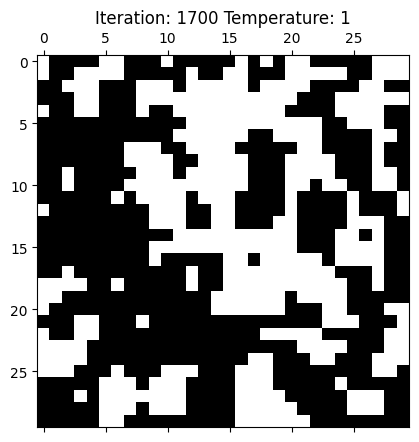

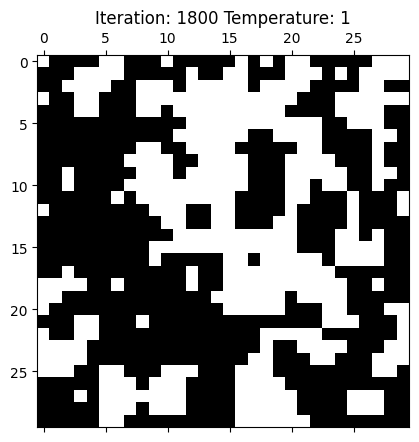

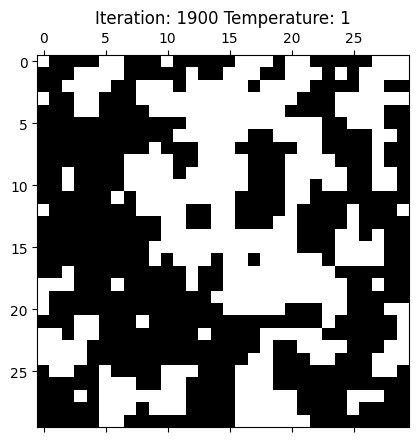

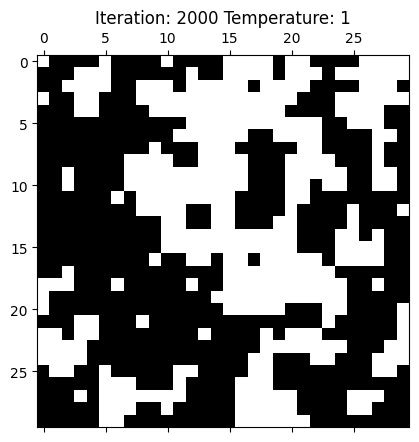

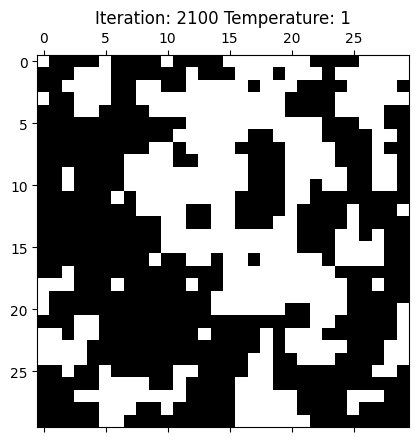

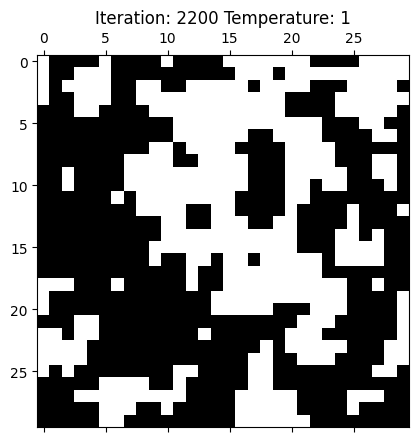

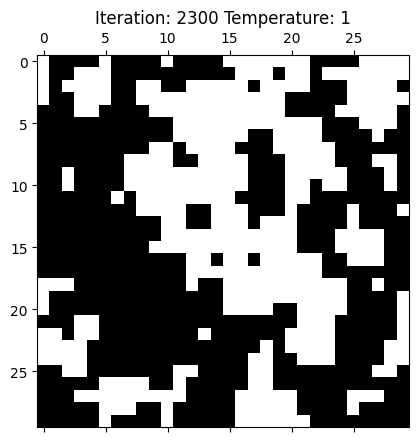

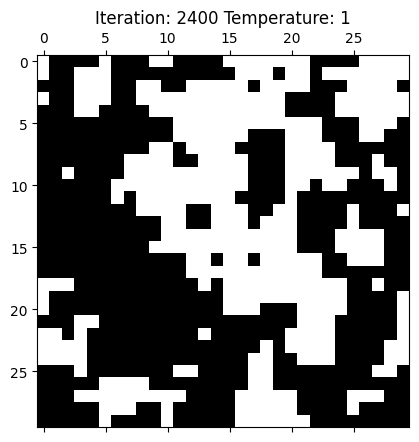

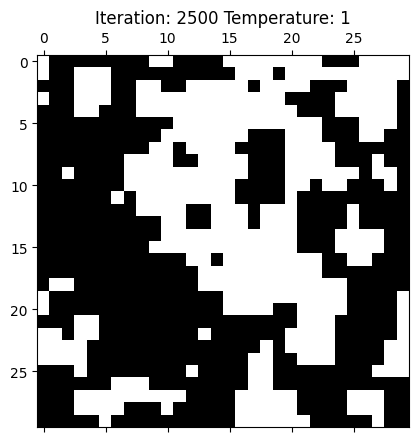

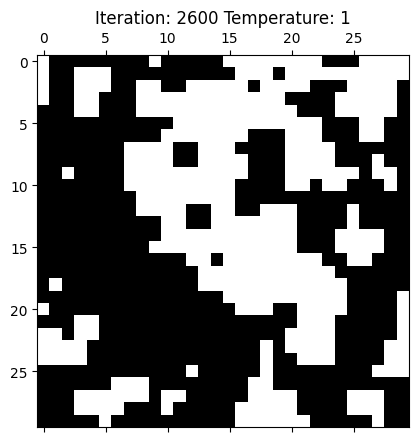

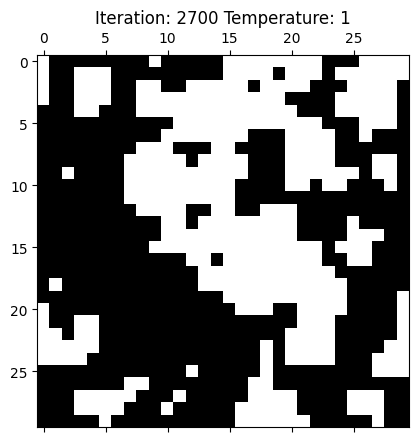

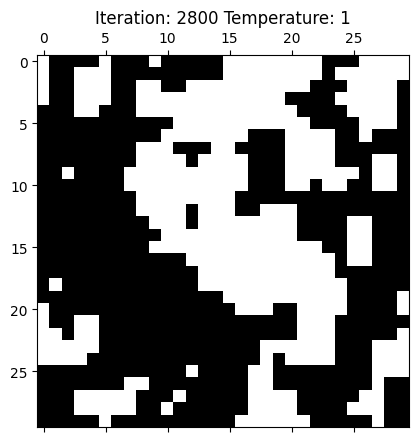

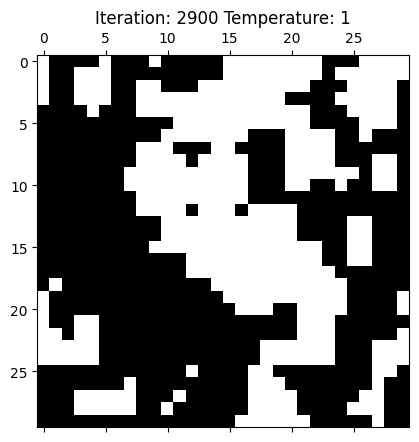

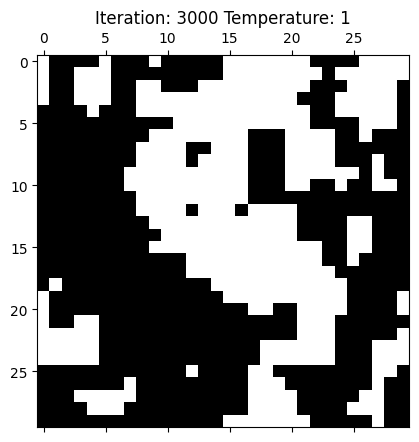

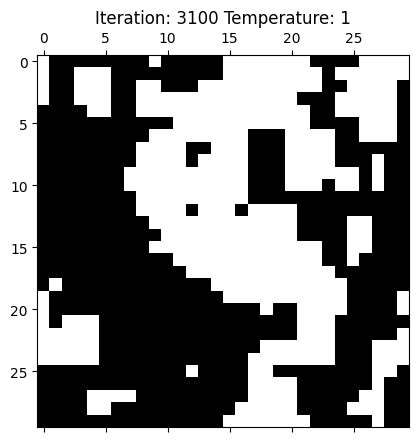

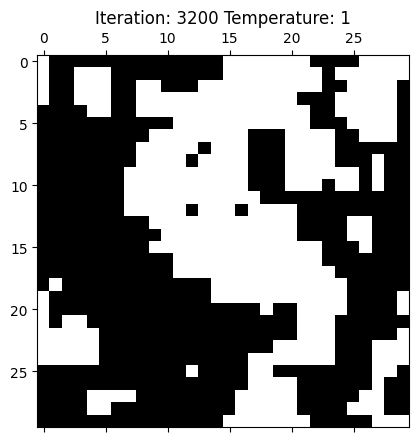

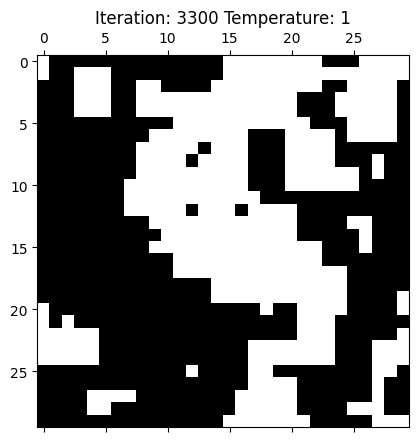

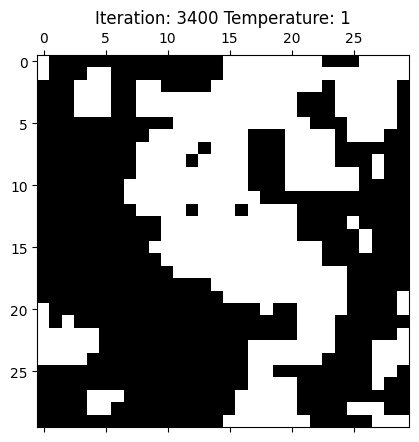

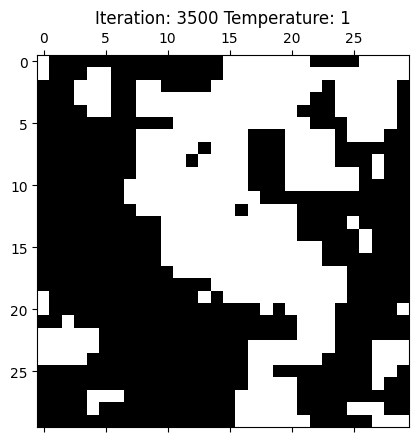

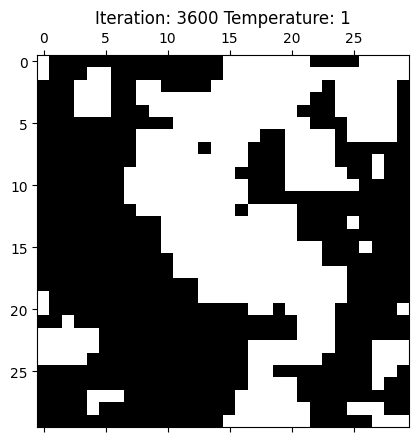

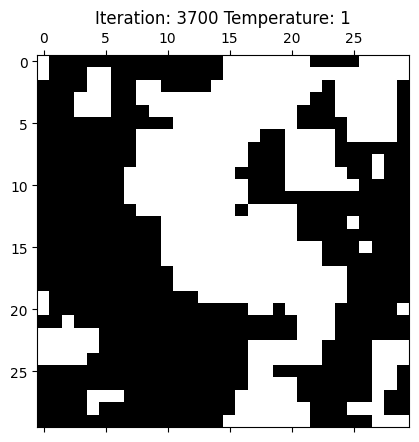

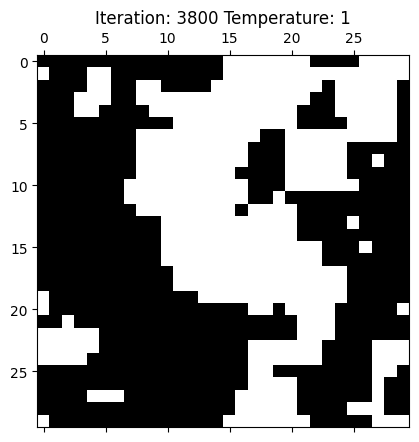

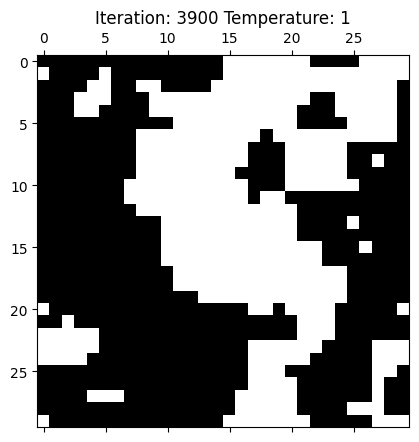

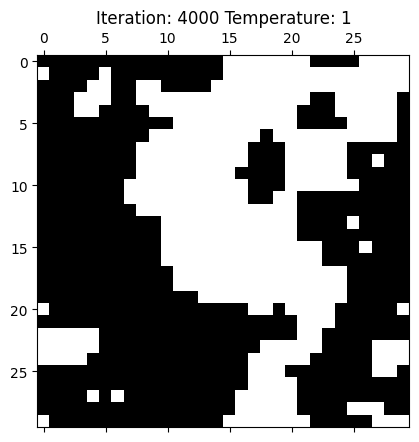

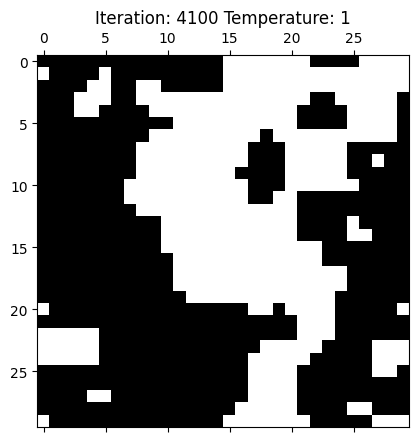

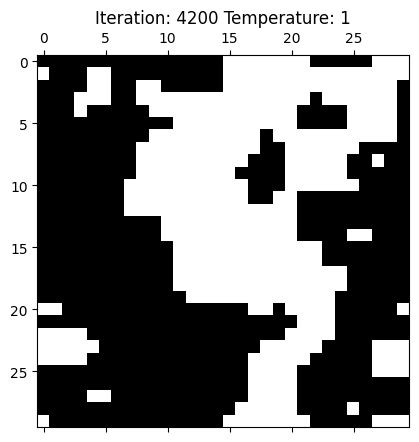

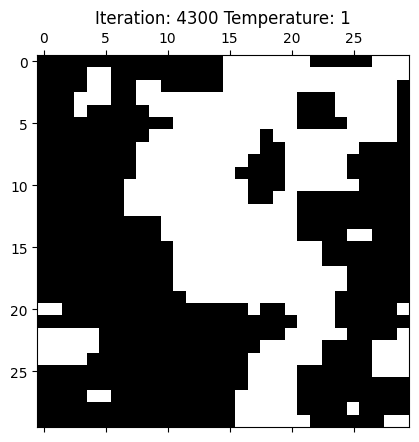

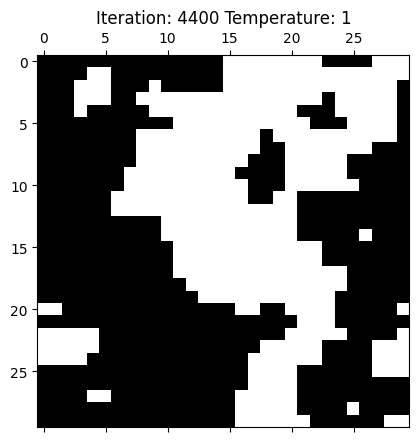

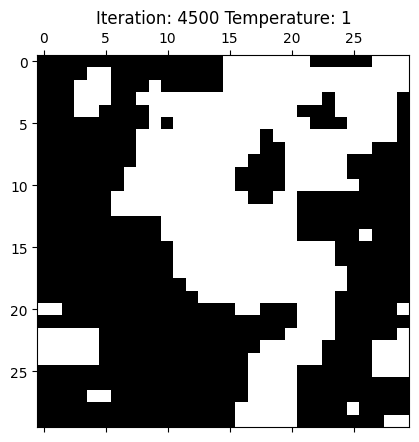

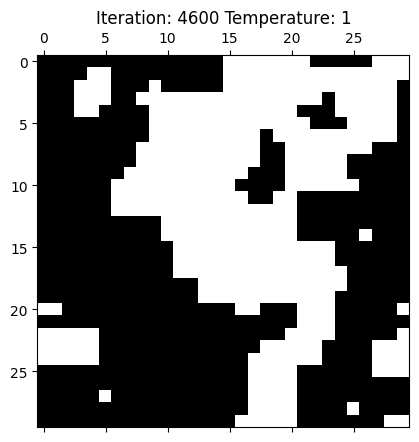

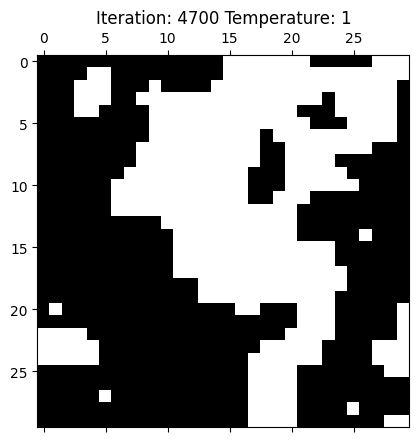

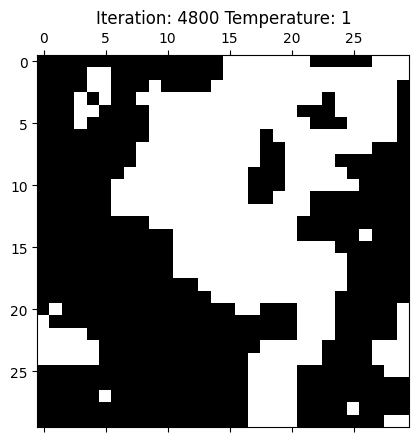

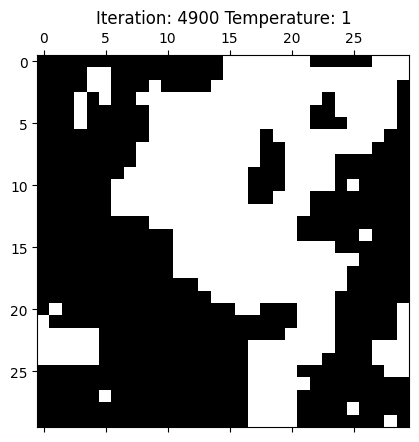

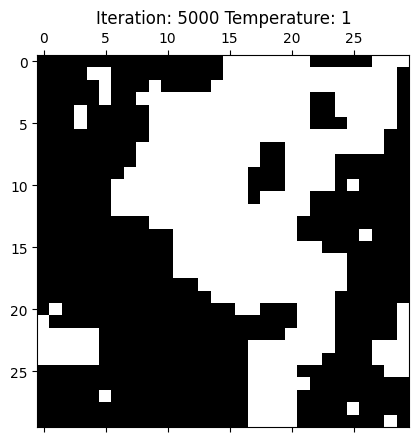

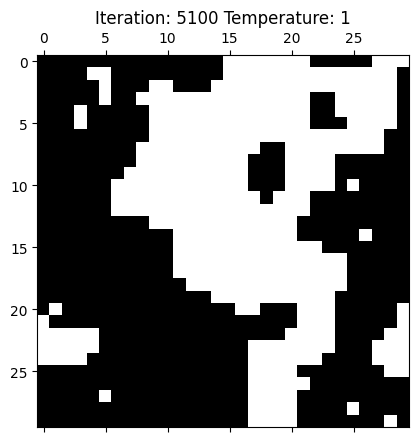

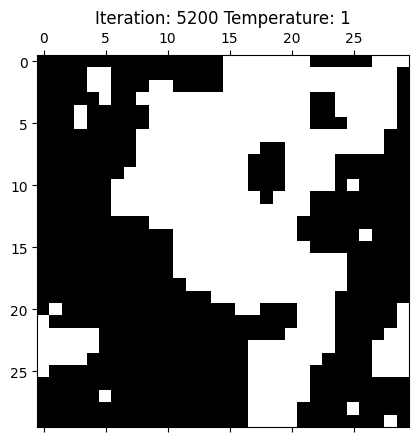

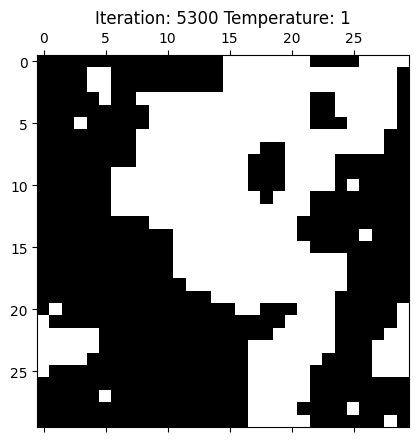

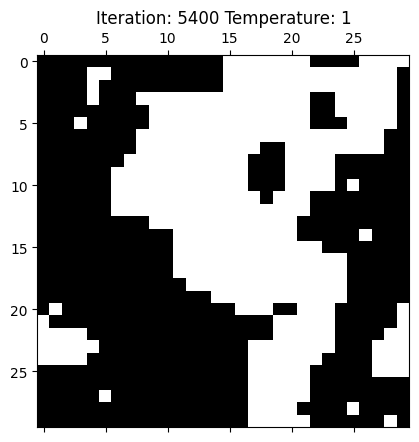

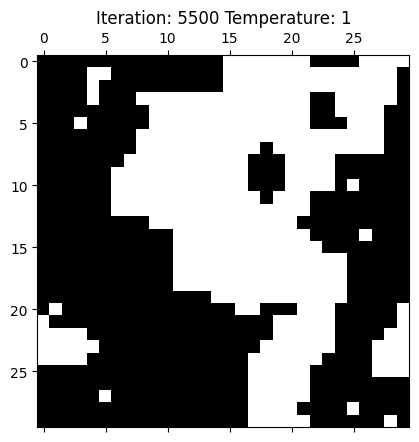

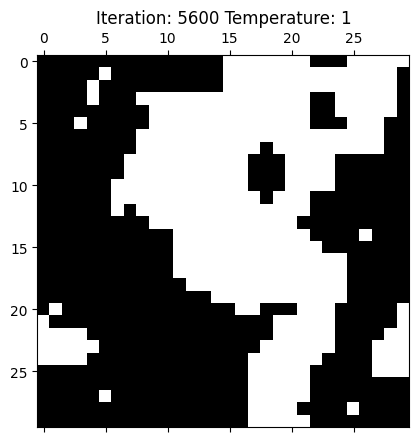

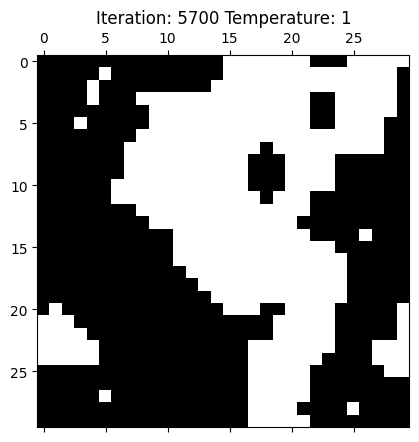

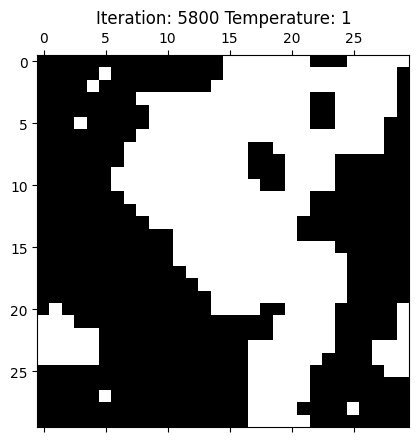

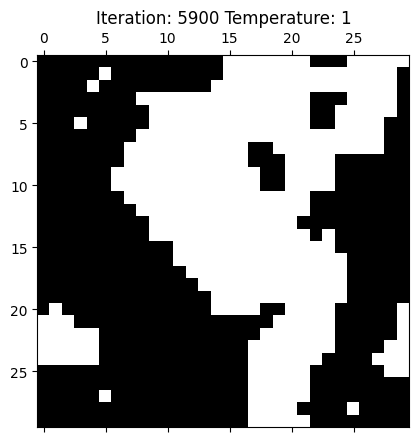

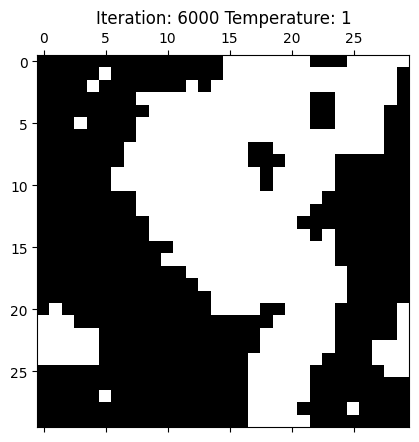

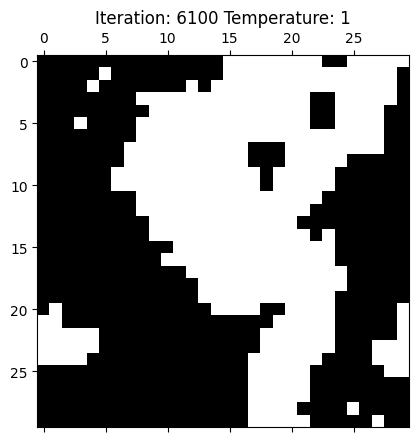

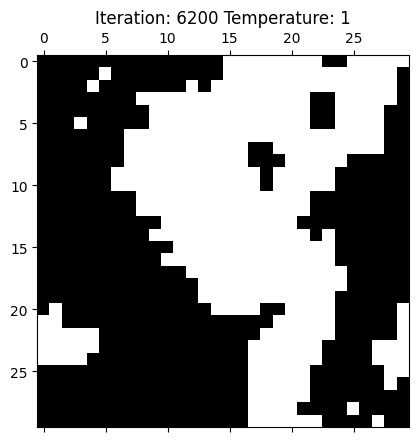

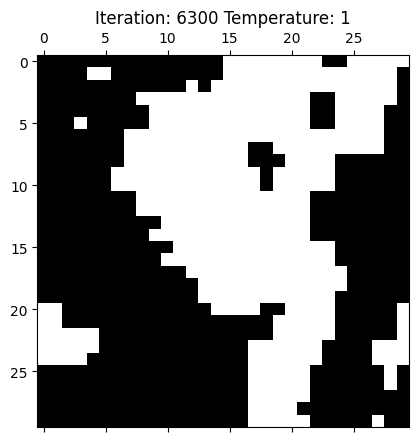

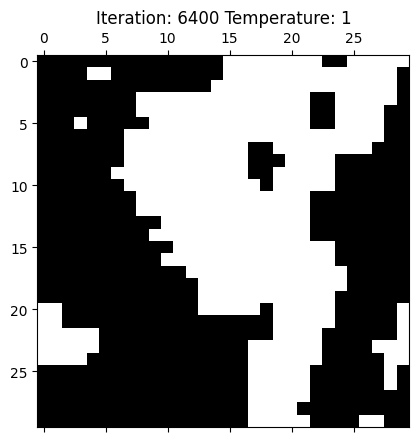

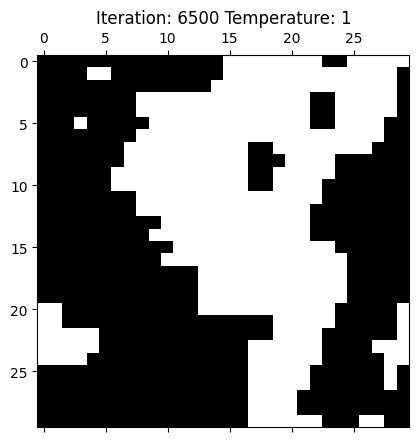

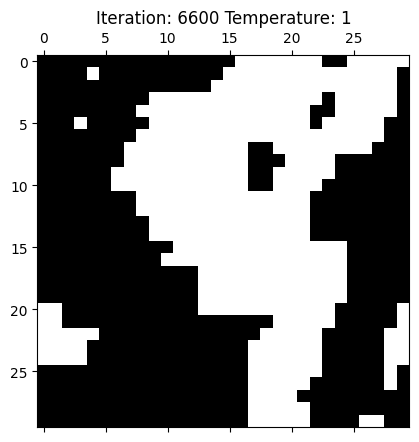

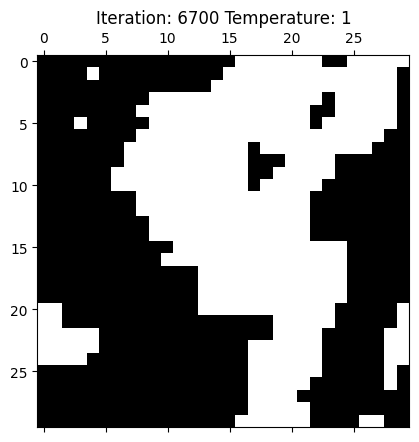

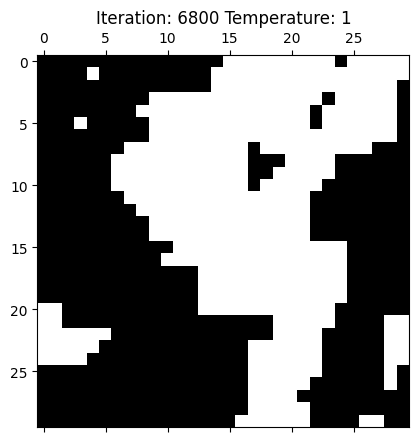

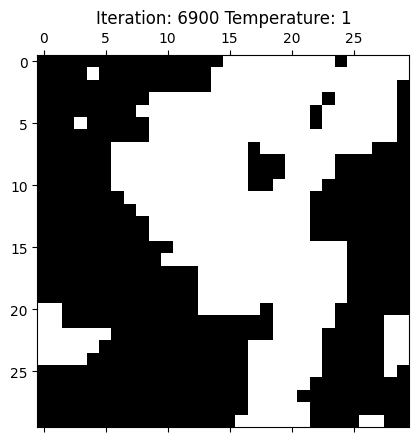

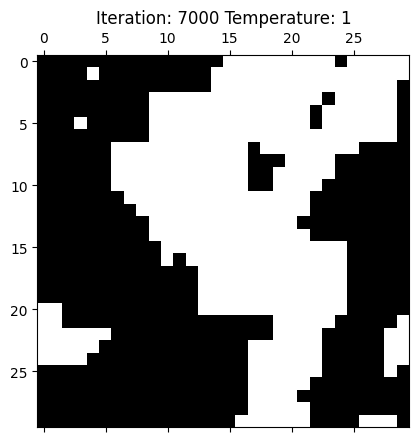

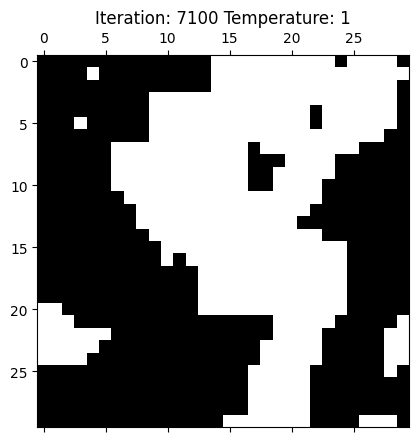

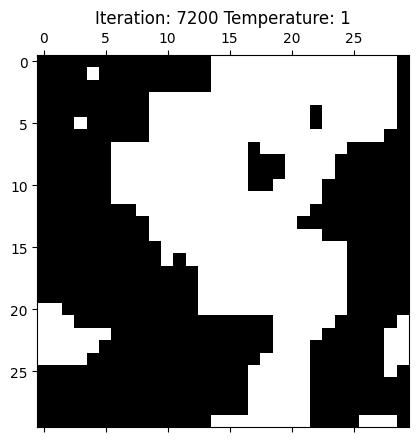

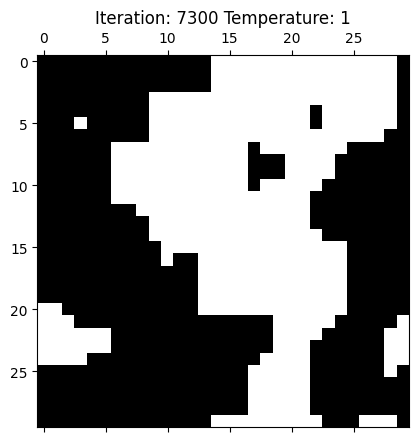

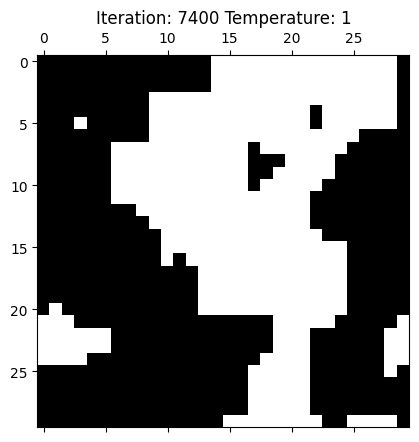

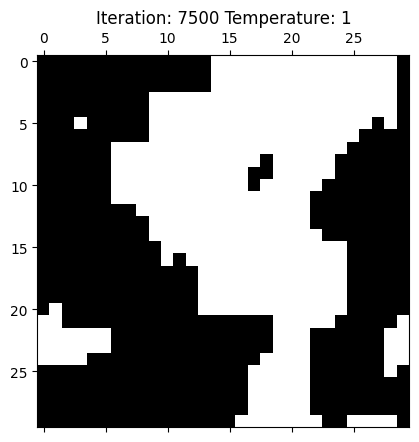

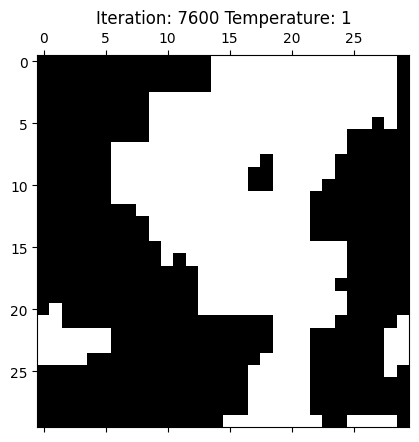

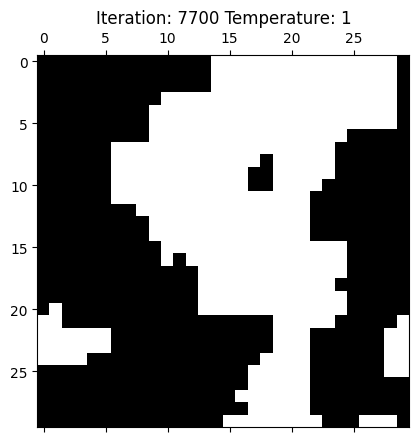

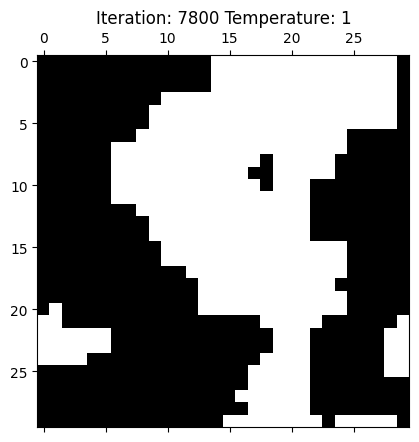

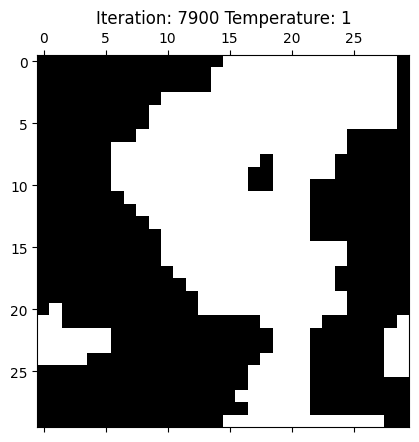

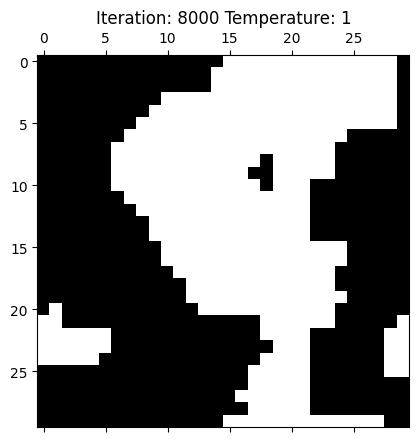

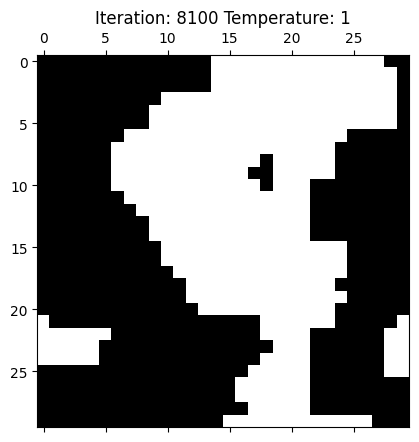

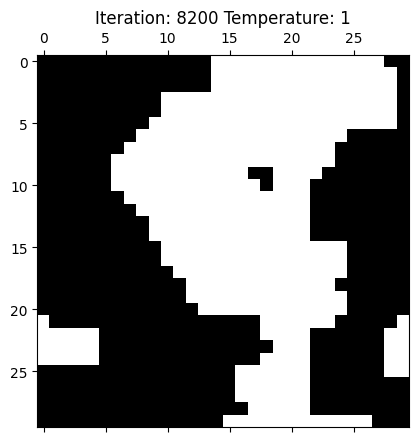

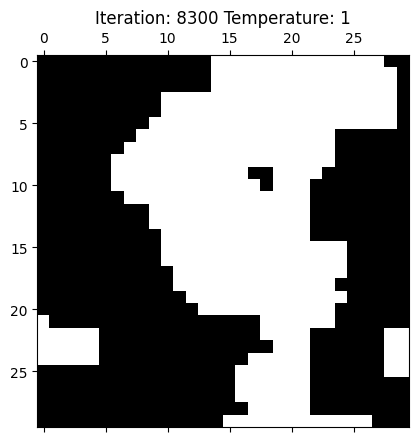

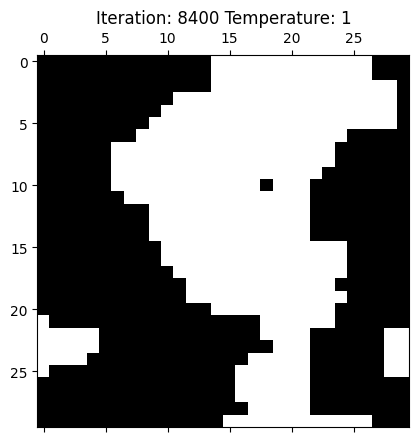

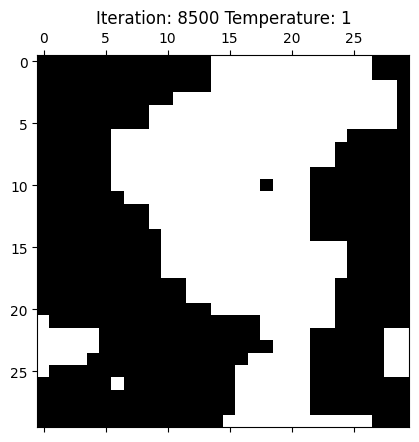

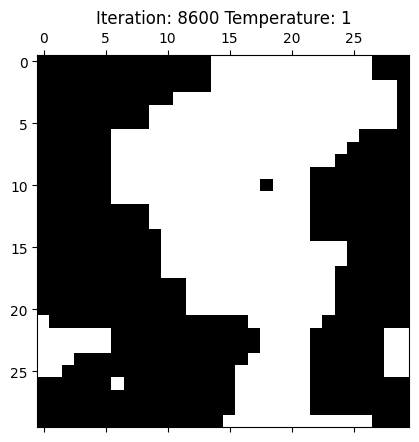

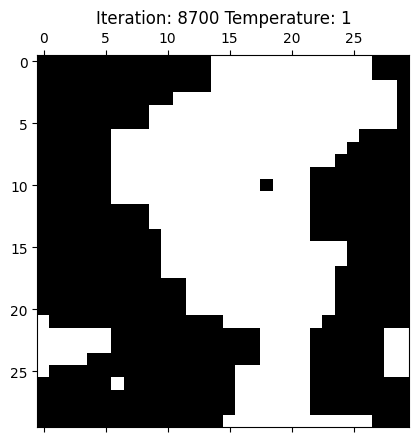

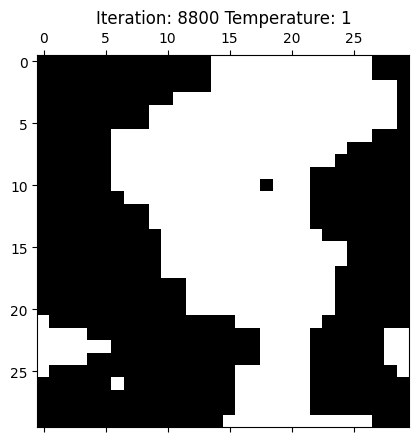

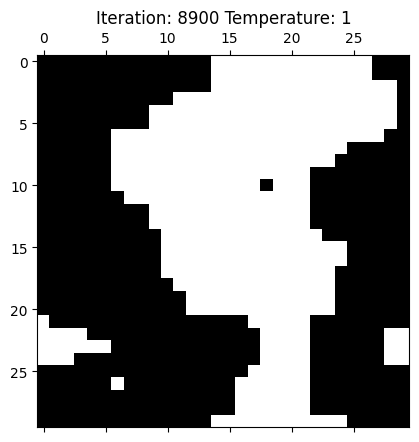

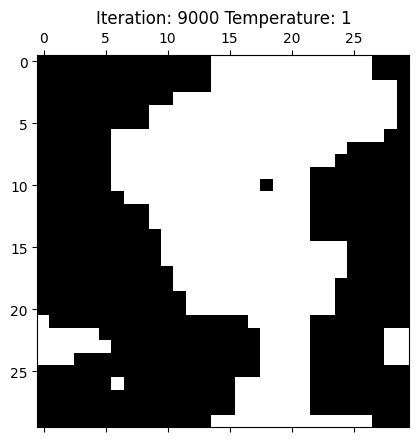

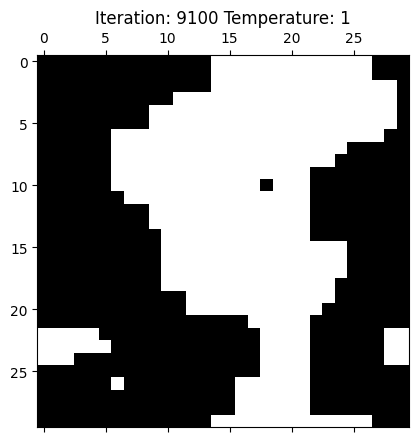

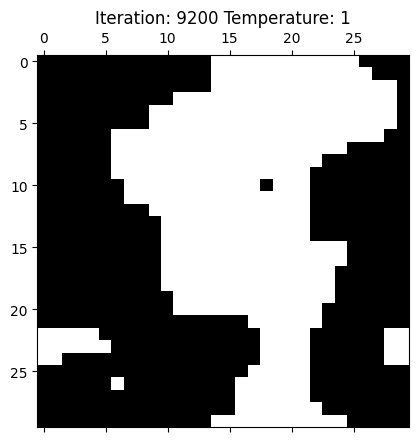

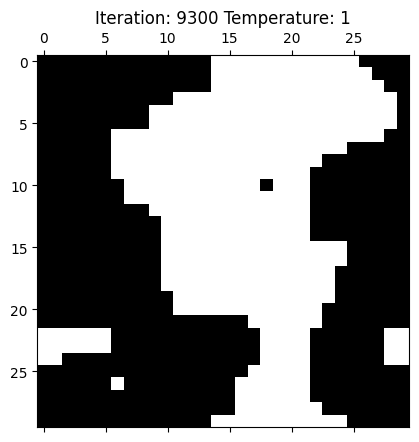

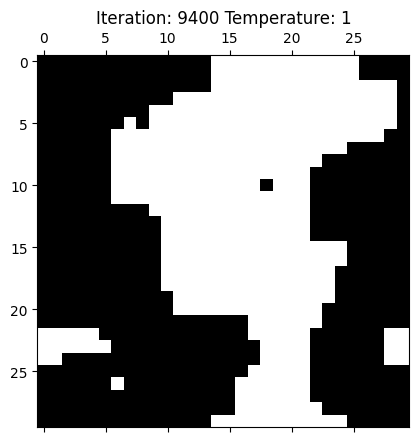

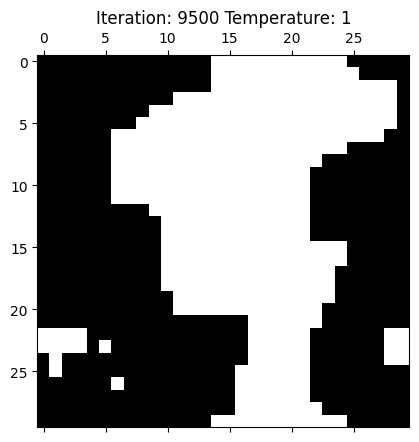

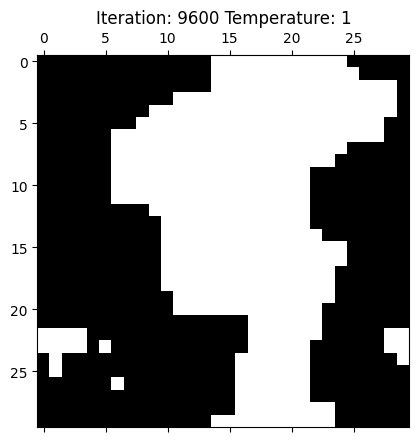

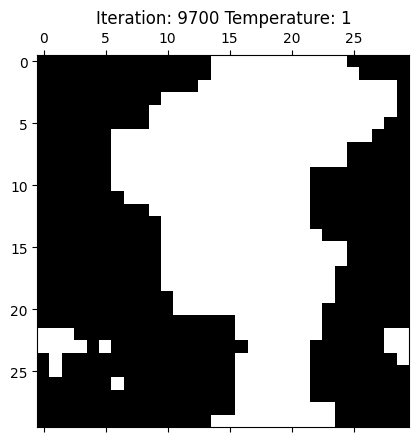

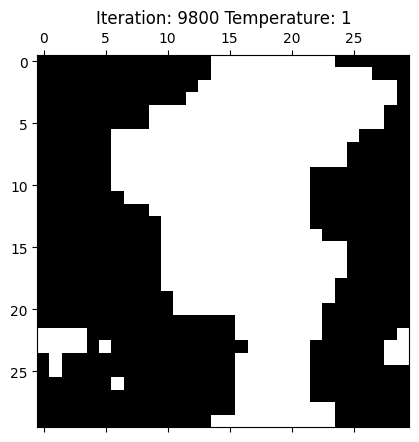

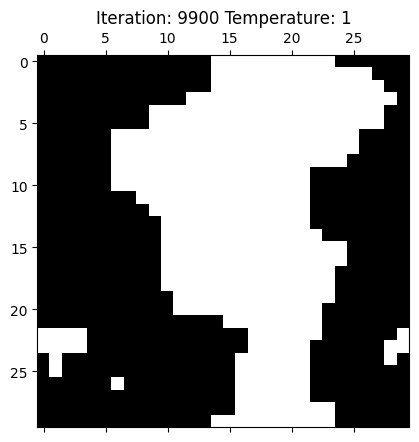

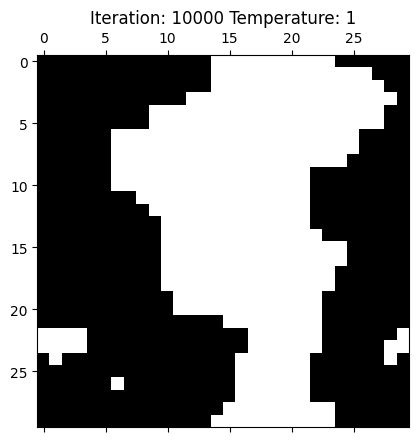

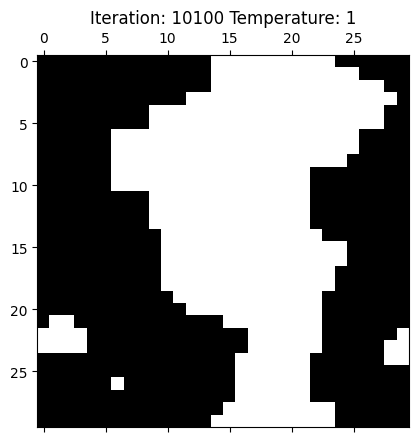

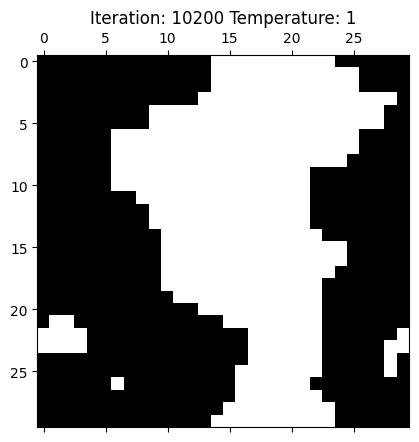

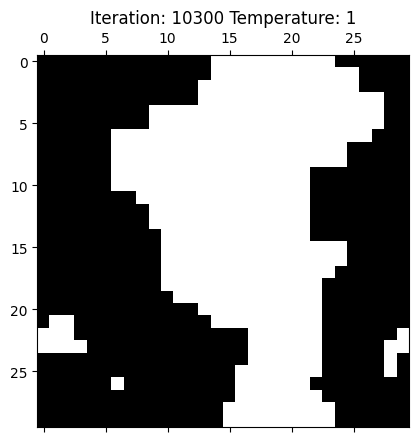

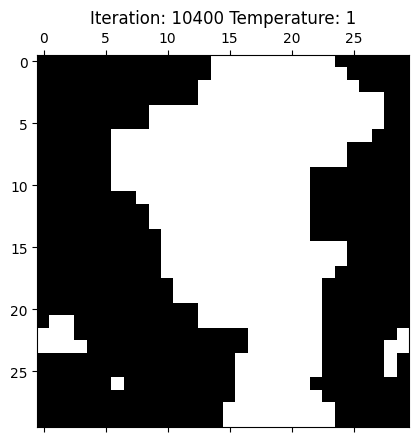

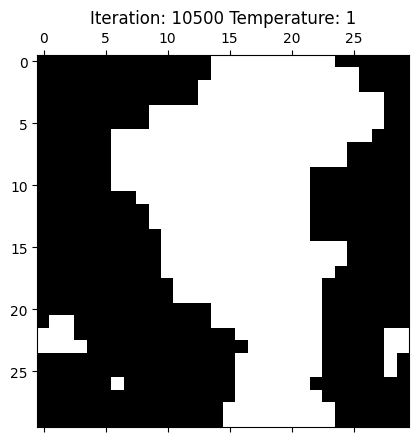

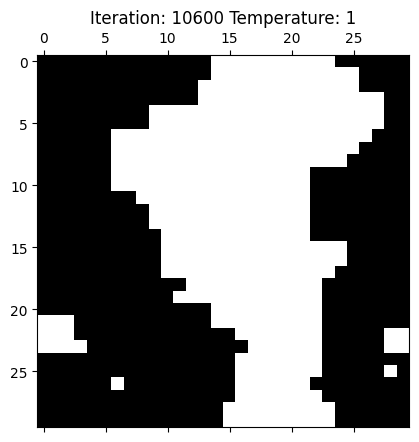

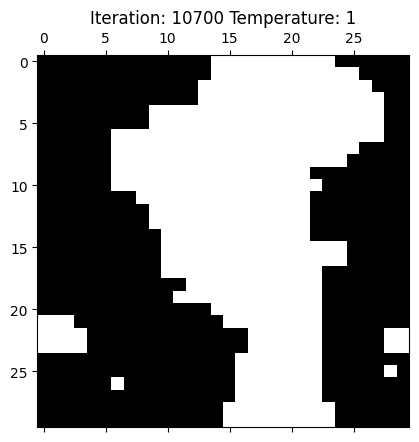

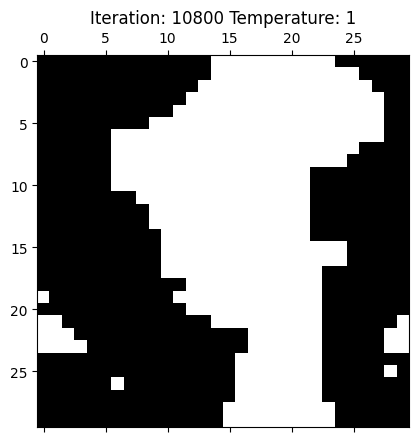

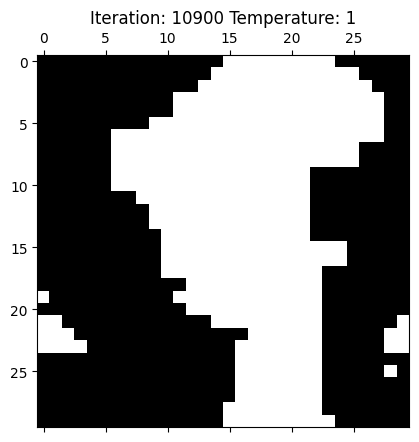

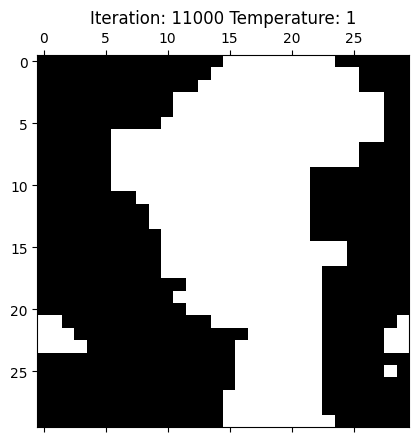

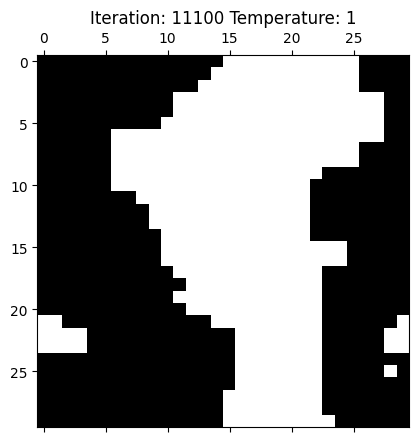

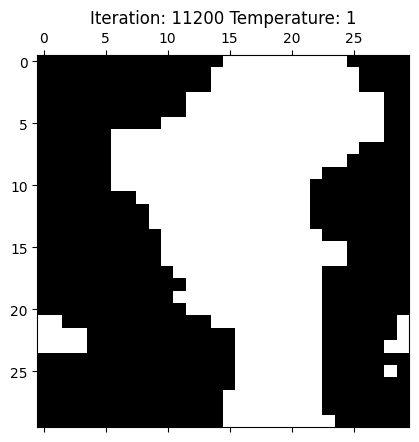

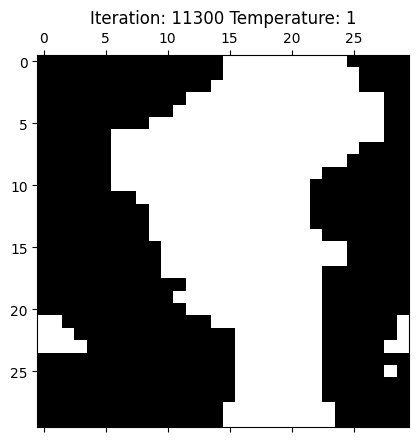

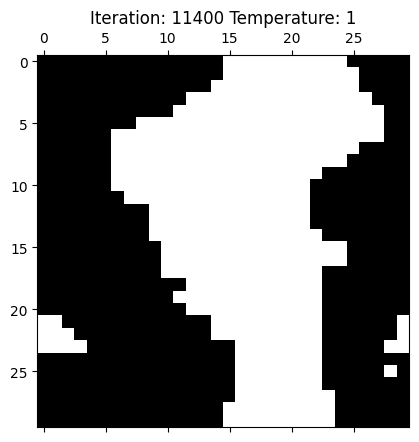

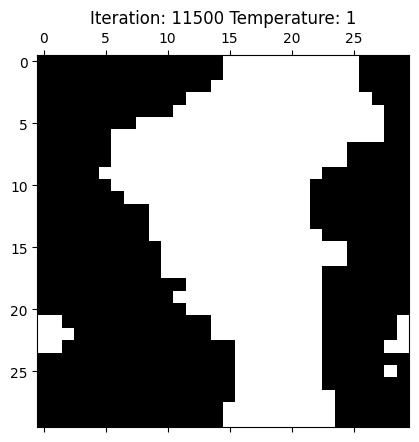

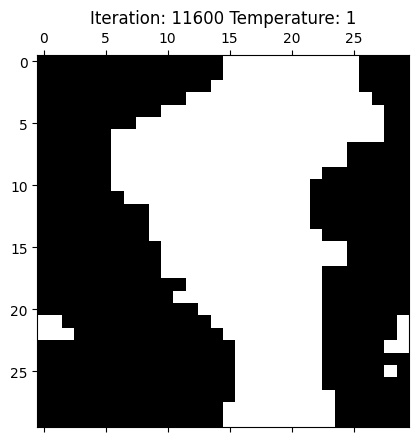

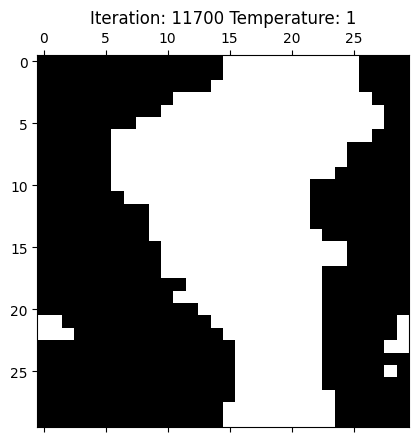

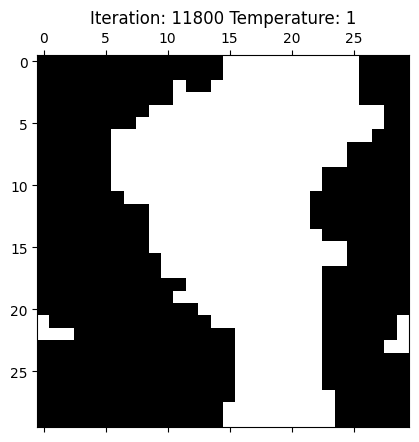

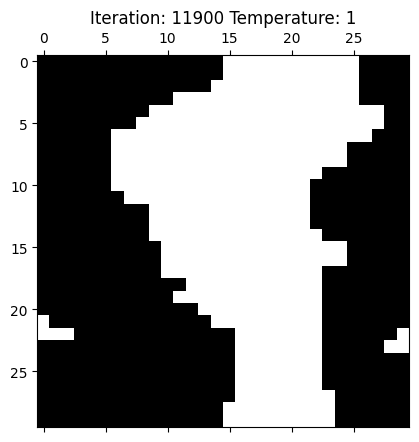

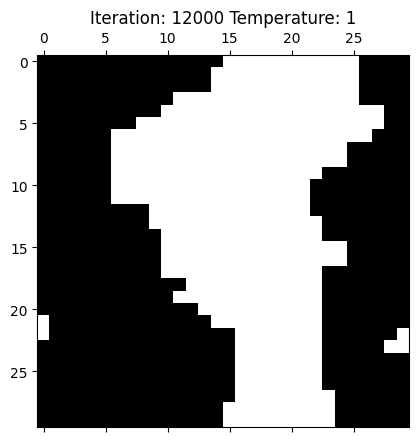

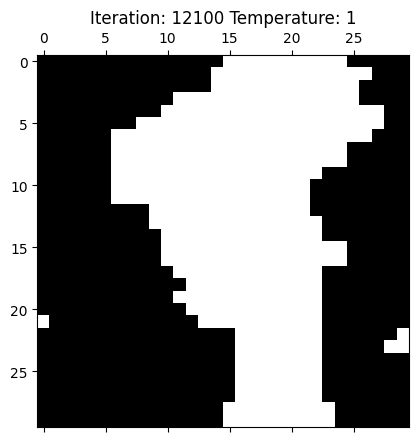

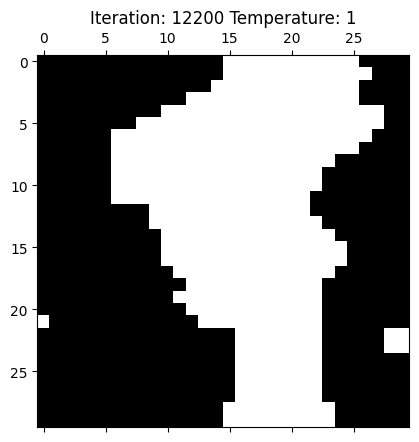

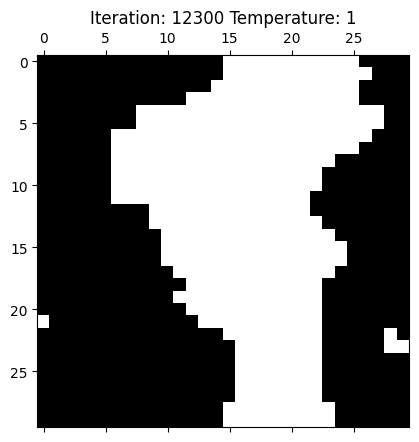

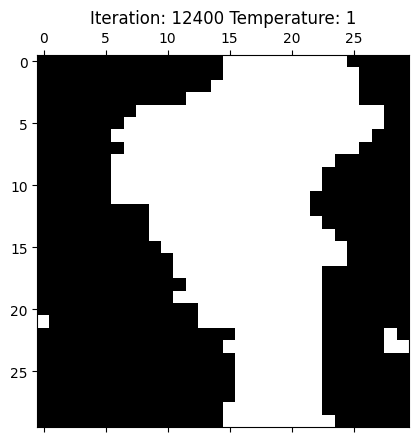

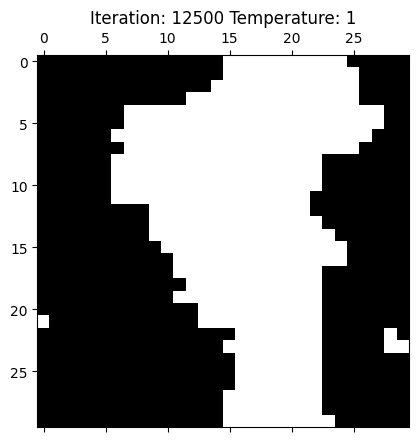

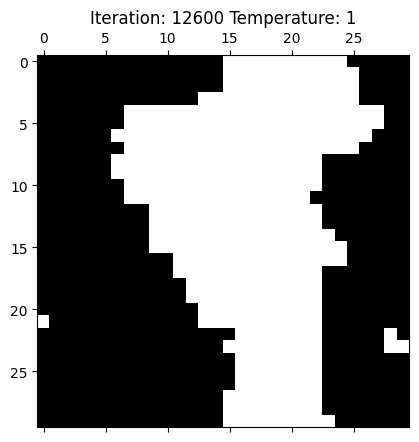

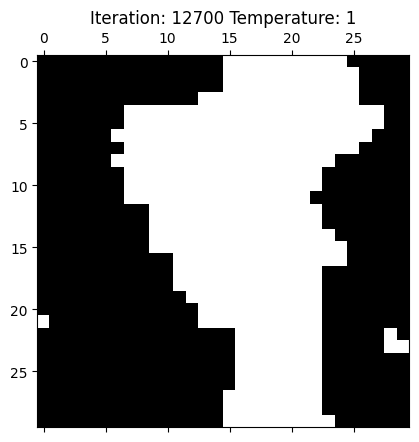

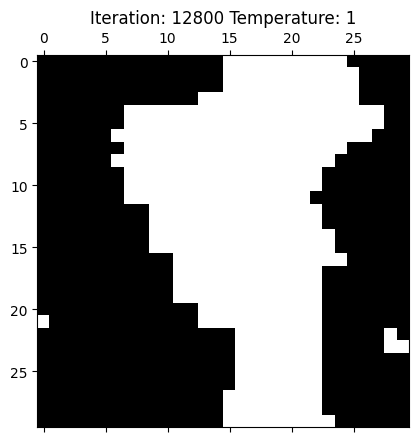

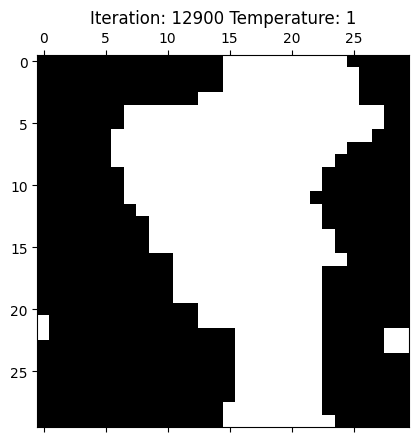

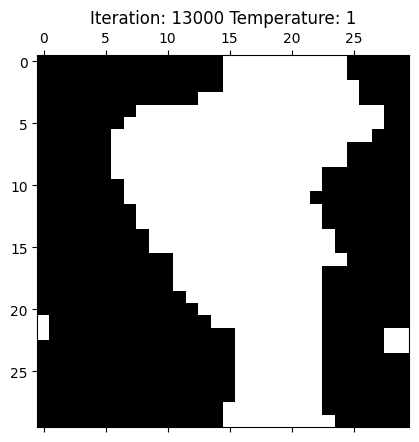

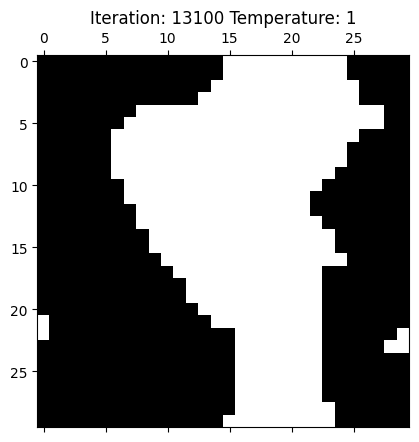

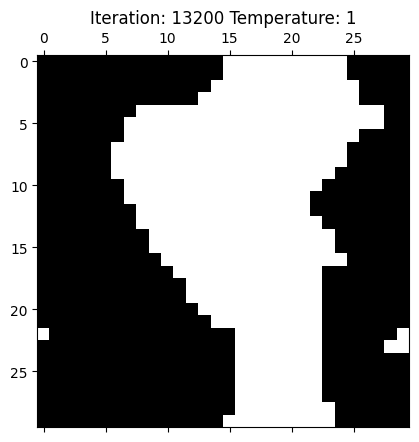

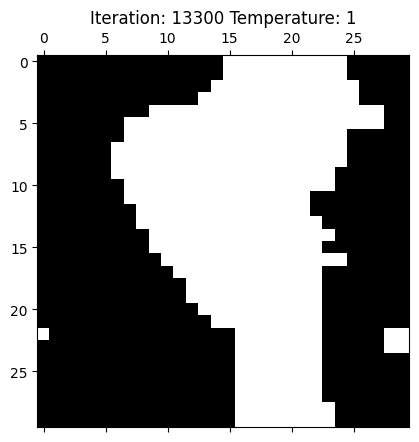

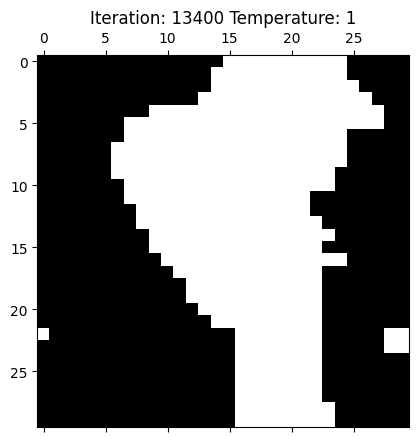

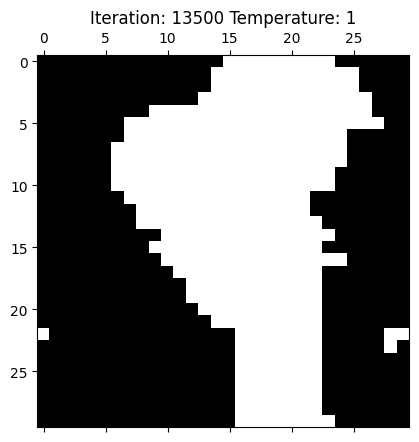

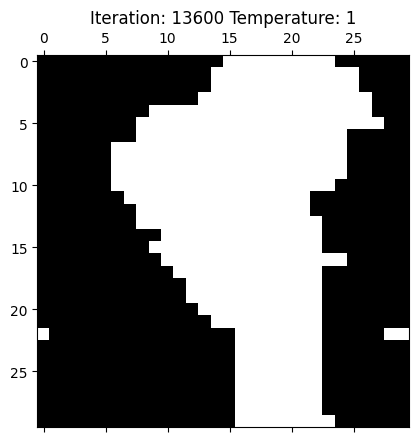

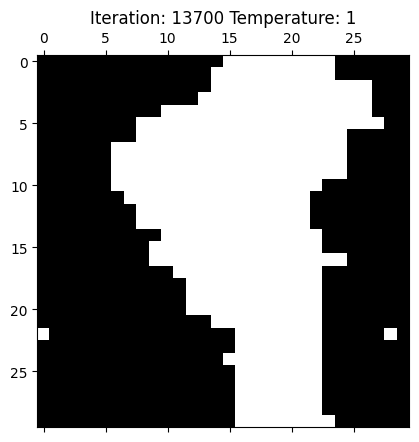

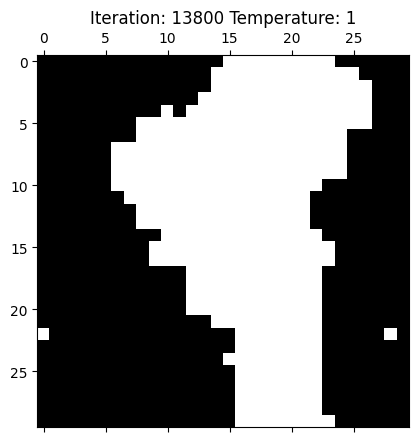

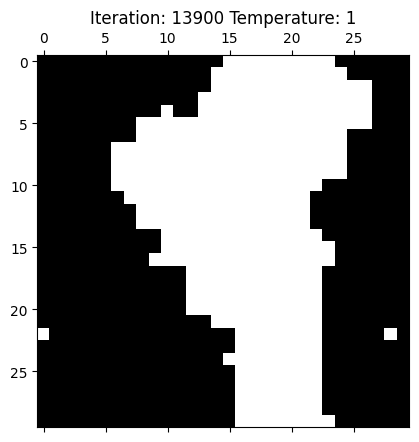

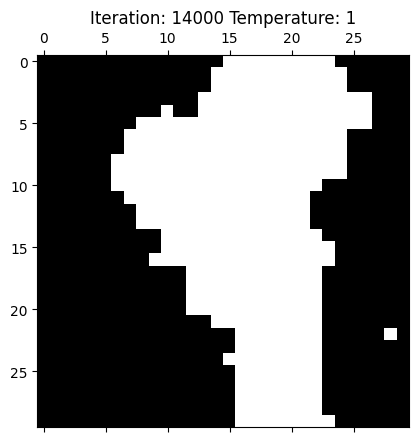

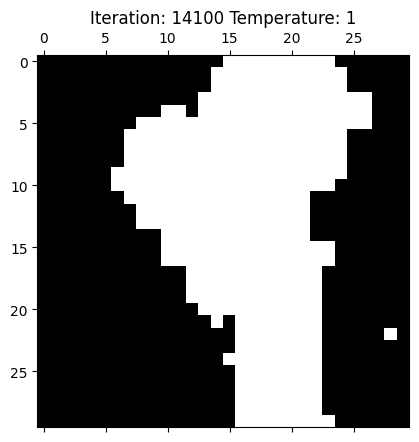

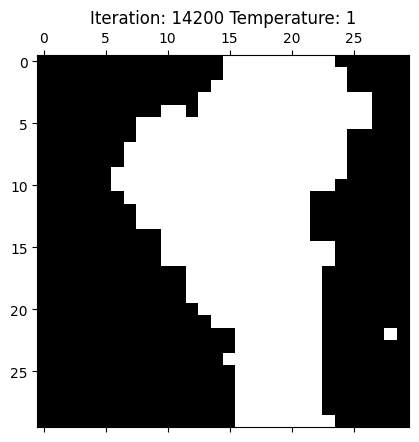

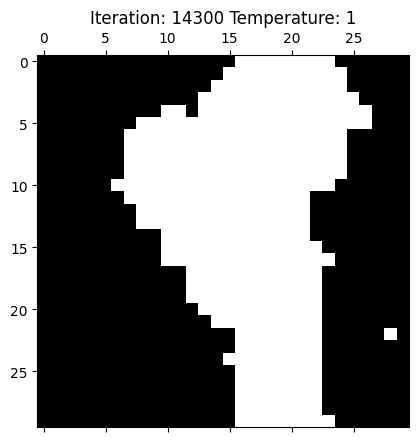

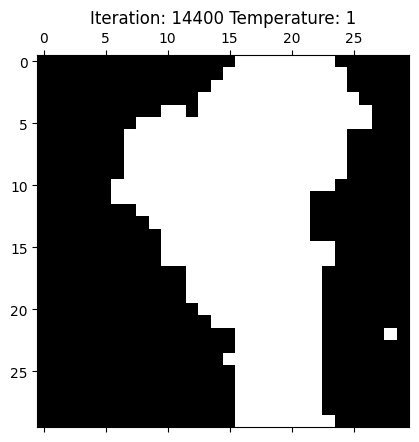

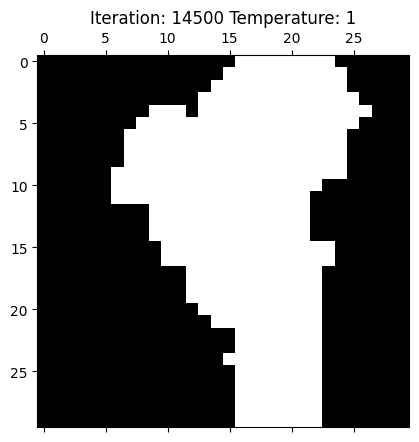

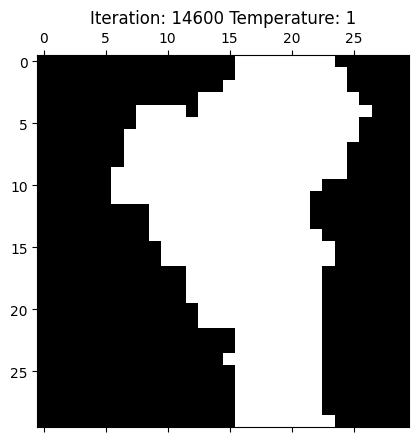

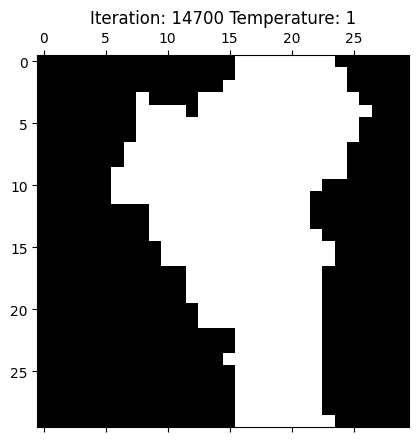

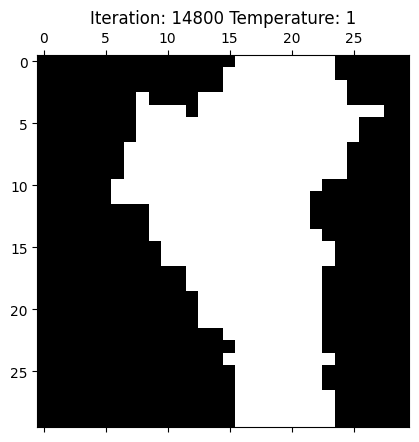

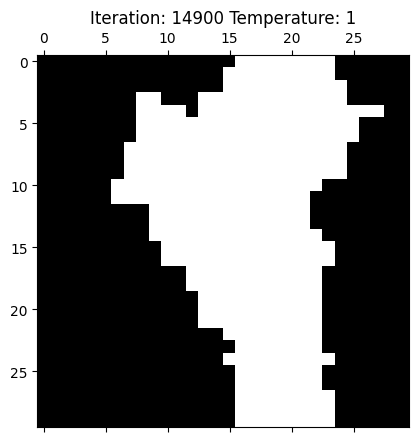

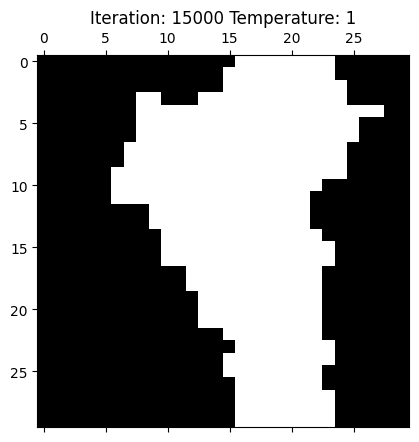

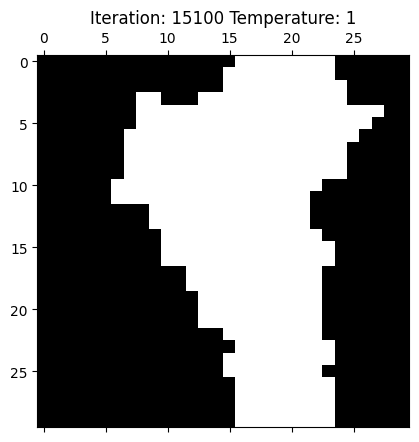

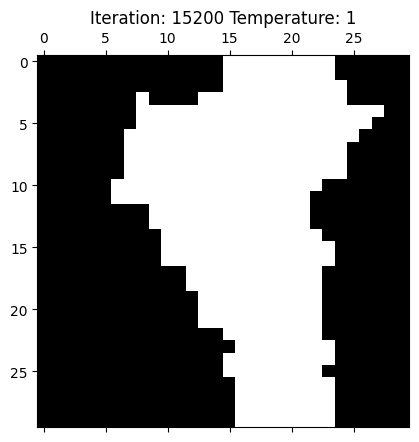

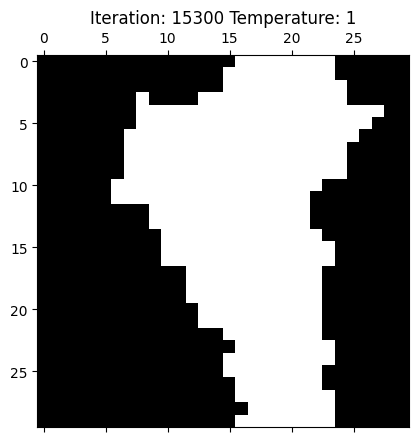

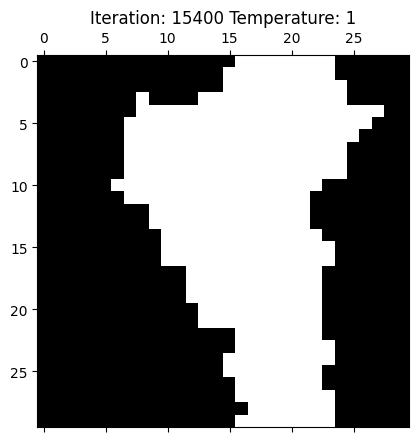

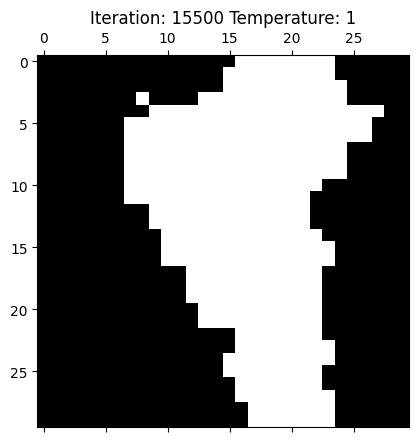

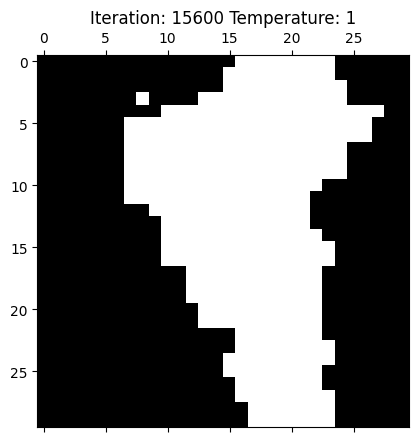

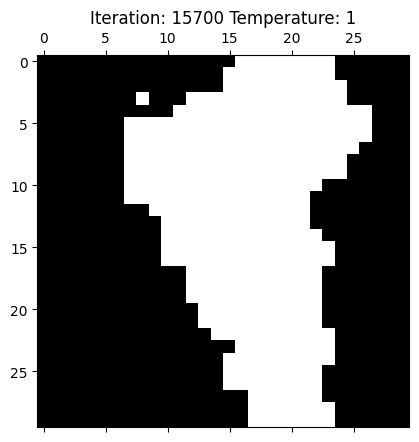

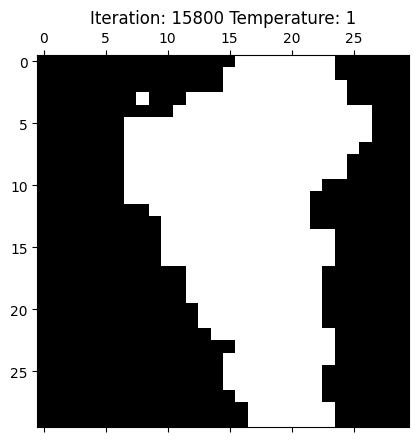

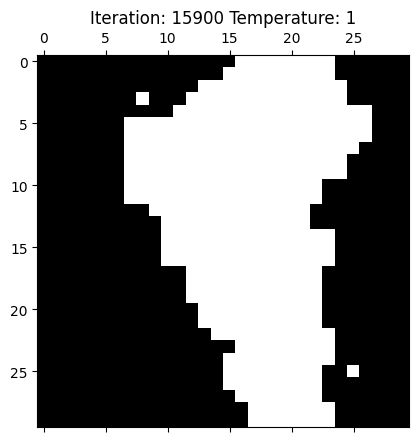

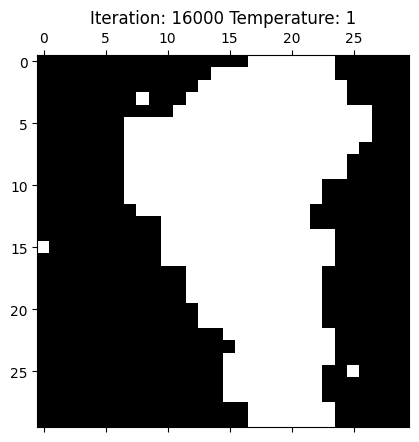

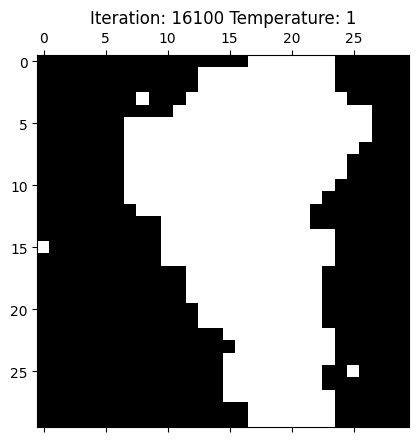

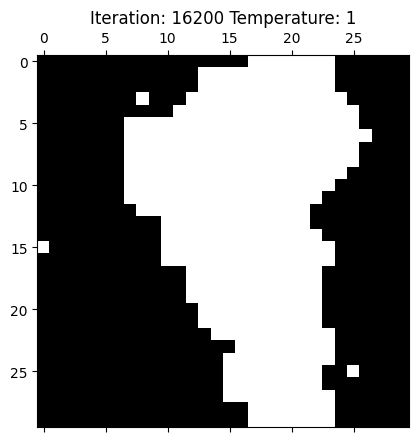

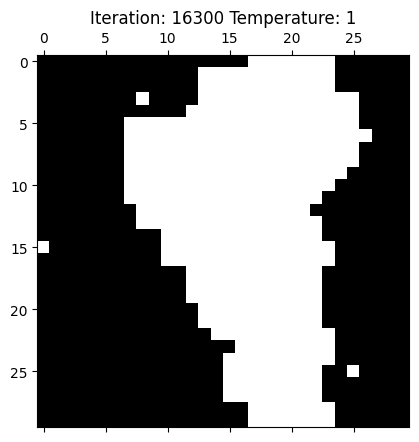

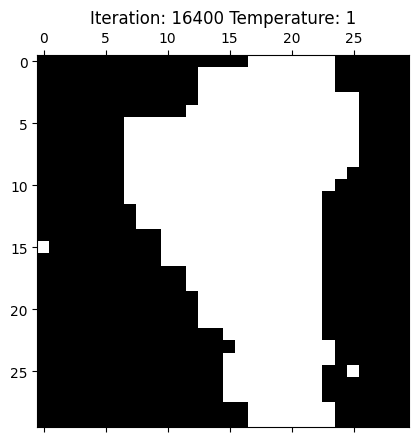

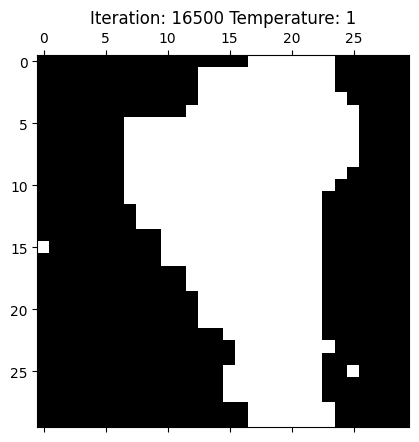

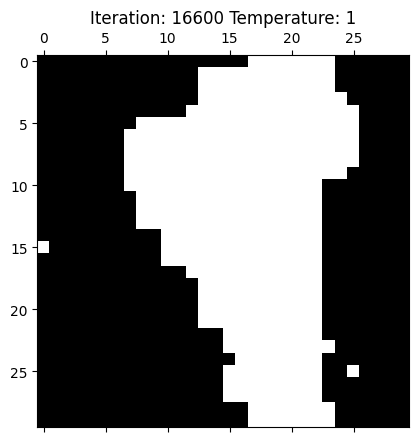

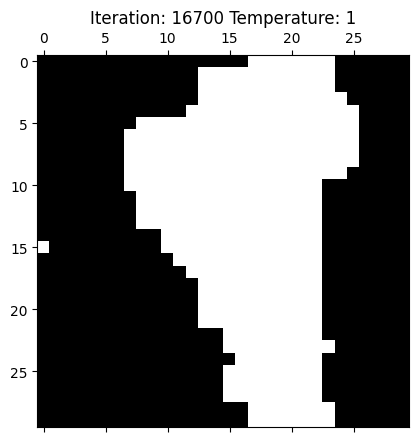

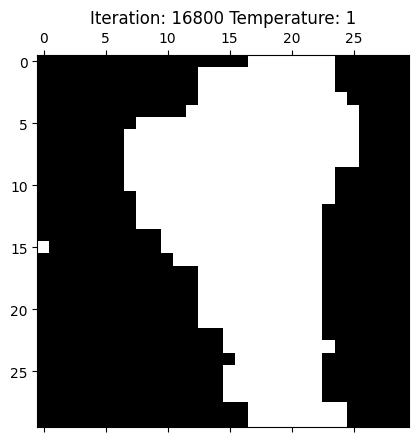

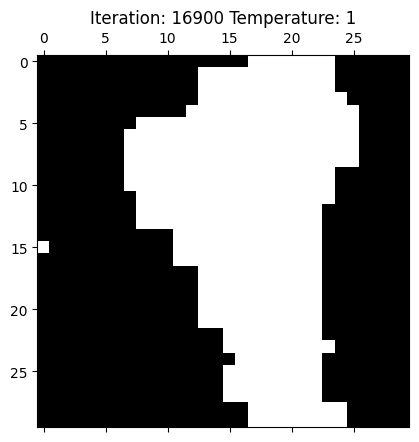

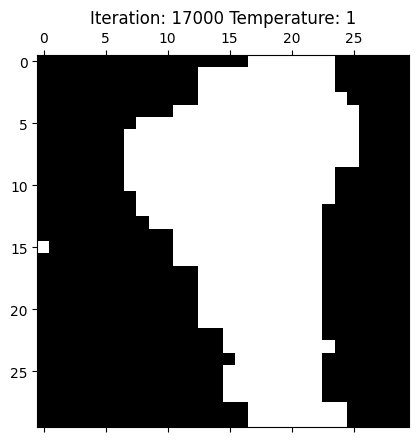

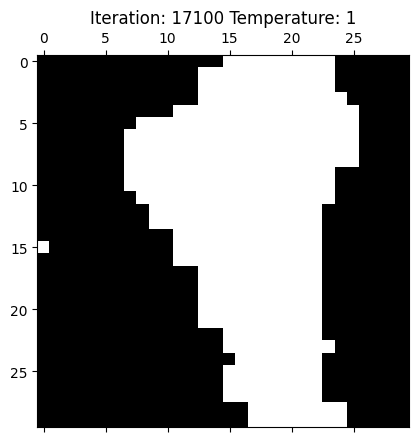

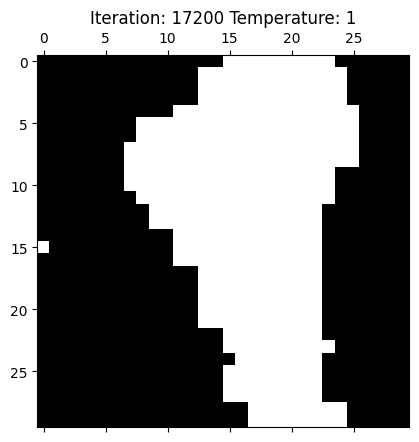

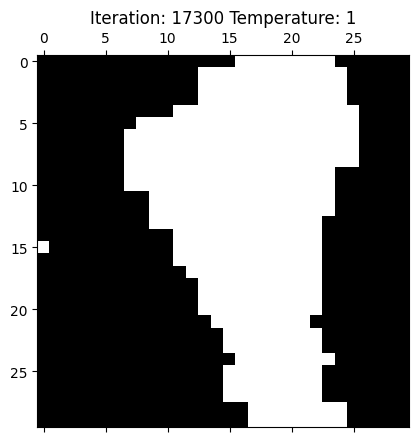

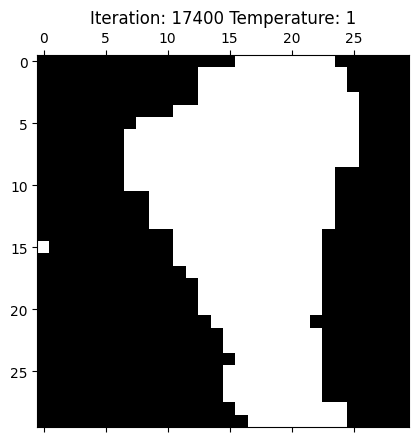

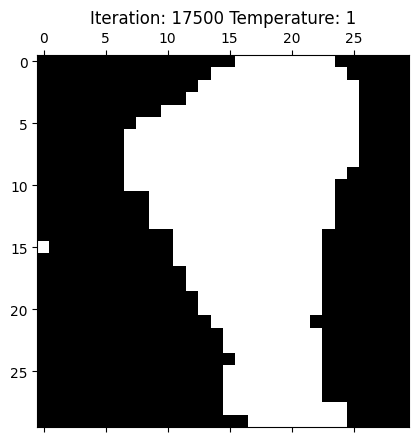

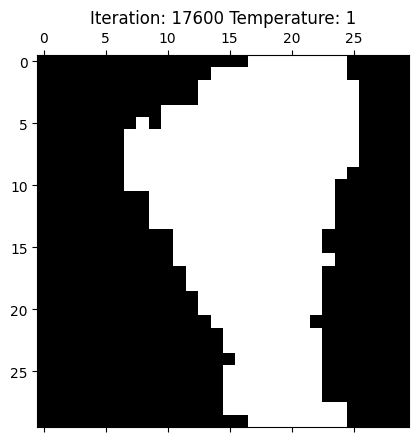

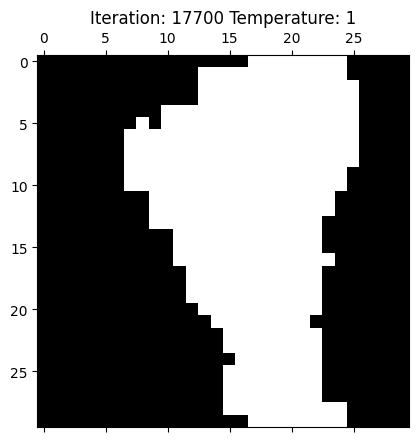

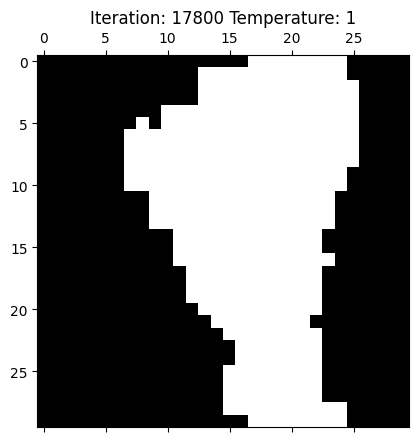

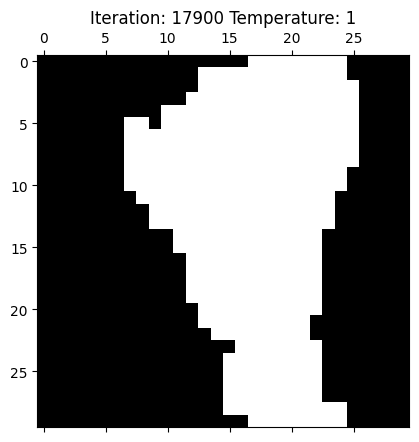

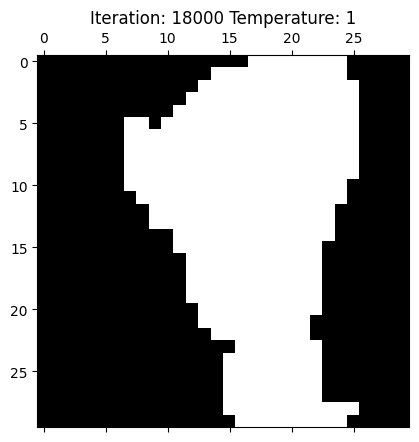

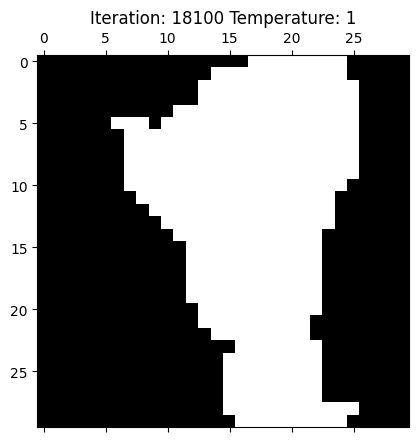

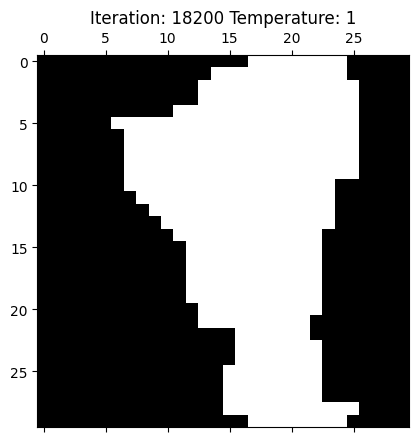

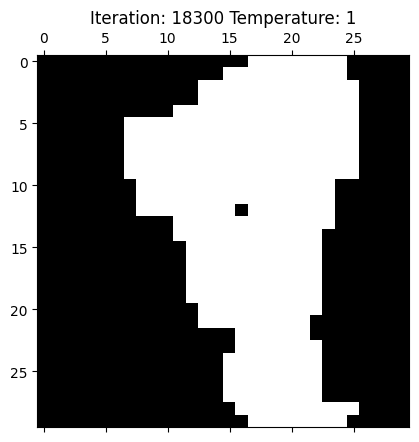

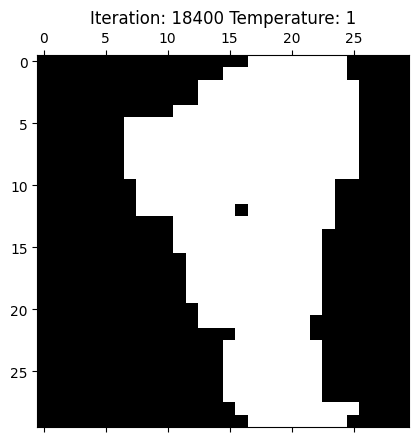

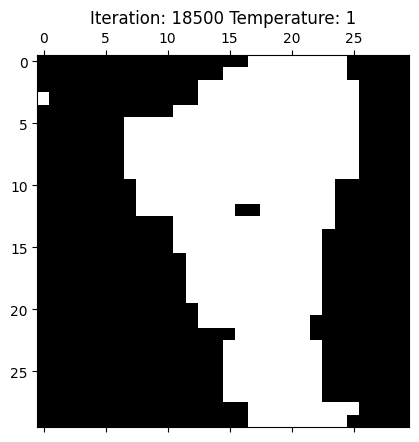

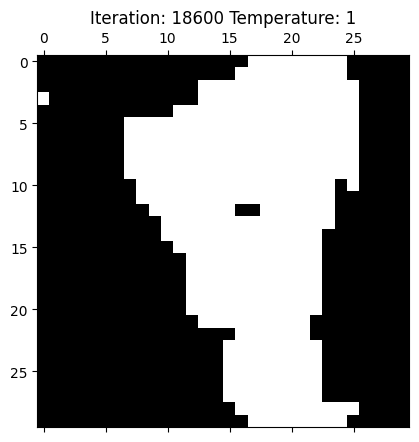

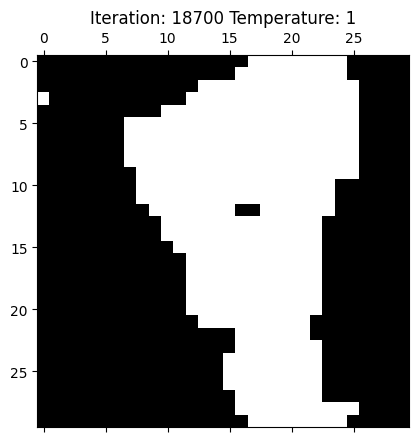

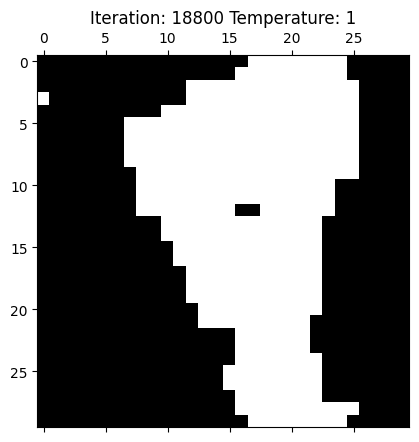

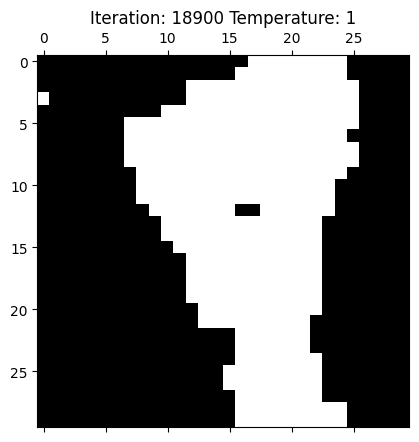

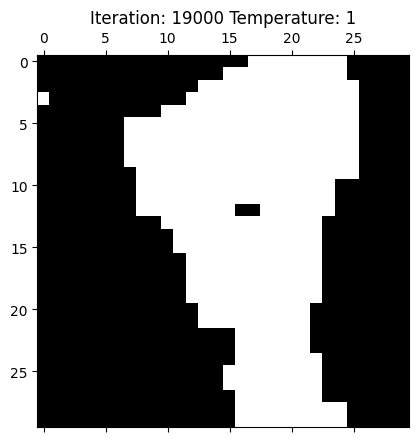

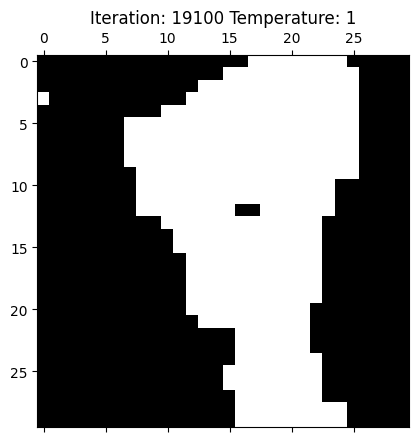

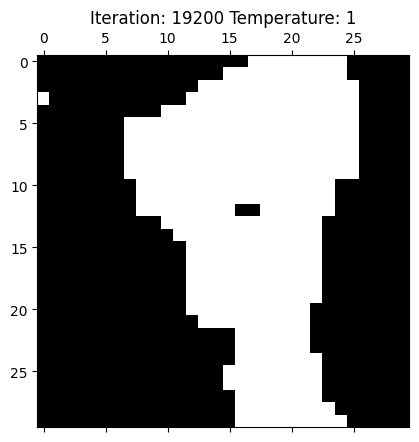

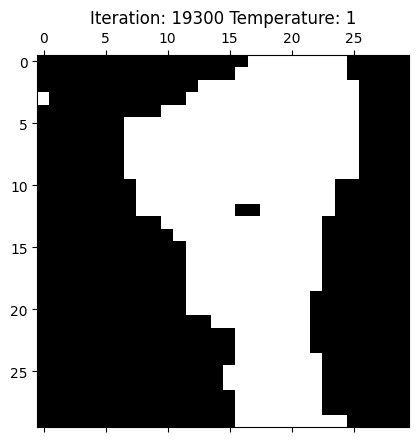

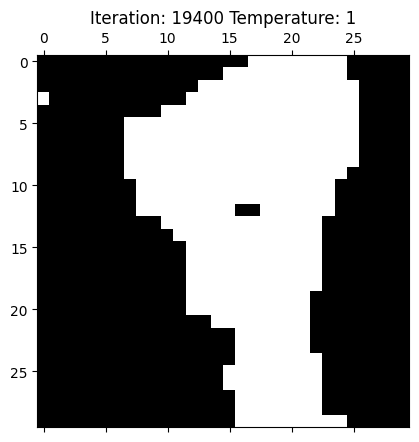

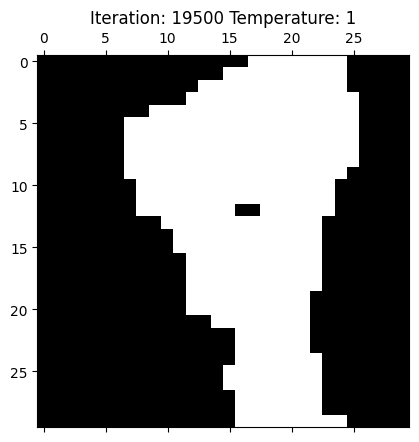

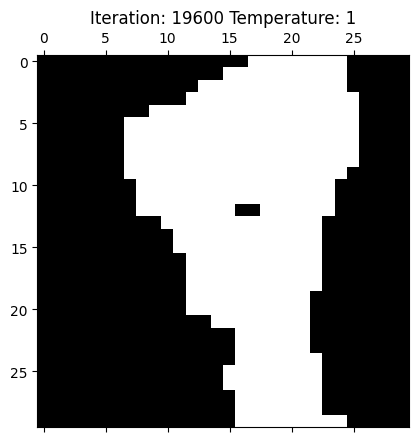

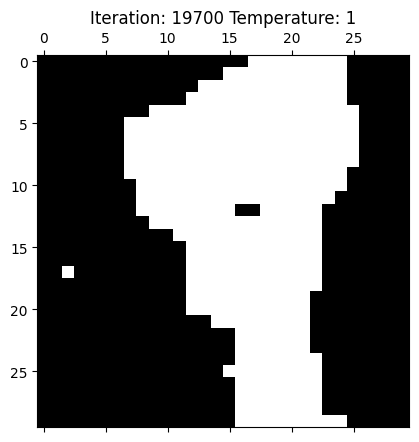

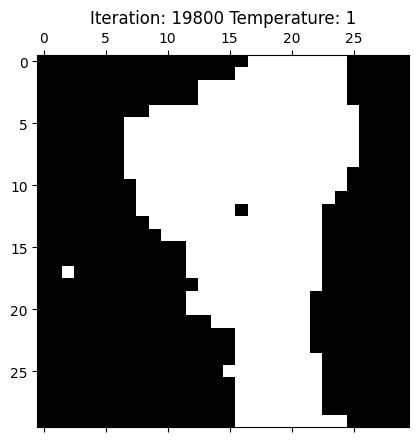

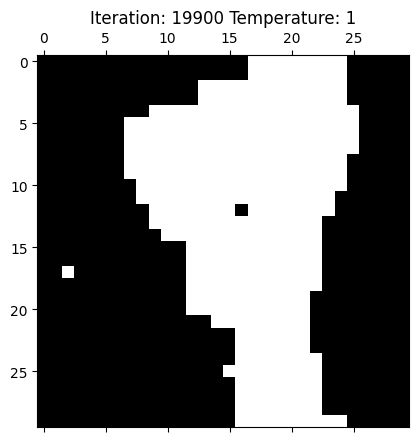

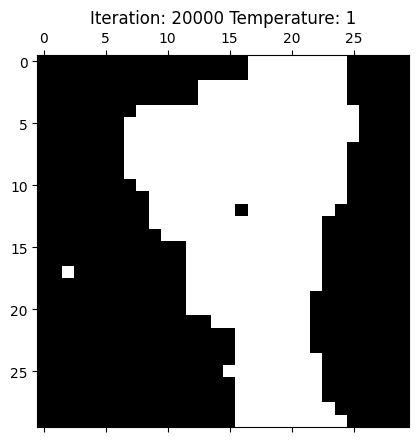

In [47]:
check = True
#check = False
if check:
    count_list = []
    count_adding_up = 0

    mag_list = []
    internal_energy_list = []
    heat_capacity_list = []

    iteration_times = 200
    iteration_length = 100

    temp = 1
    for i in range(iteration_times):
        for j in range(iteration_length):
            grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp)
            count_adding_up += count
        plt.matshow(grid_array,cmap='gray')
        plt.title('Iteration: '+str((i+1)*(j+1)) + ' Temperature: '+str(temp))
        plt.savefig('/Users/alex/Desktop/Ising Model/Ising-Model/pics_iteration/ising_model_'+str(i+1)+'.png')
        #print(count_adding_up)
        count_list.append(count_adding_up)
        mag_list.append(M(grid_array))
        internal_energy_list.append(U(grid_array,0))
        heat_capacity_list.append(heat_capacity(internal_energy_list,temp))

Text(0, 0.5, 'Number of flips (accumulative)')

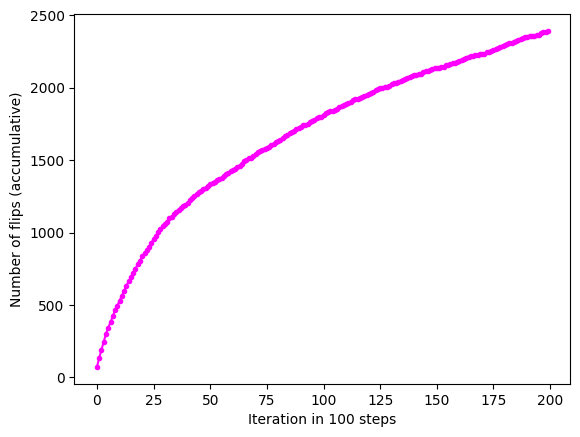

In [48]:
plt.plot(np.arange(iteration_times),count_list, "-", marker='.',color='magenta')
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Number of flips (accumulative)')

Text(0, 0.5, 'Magnetization')

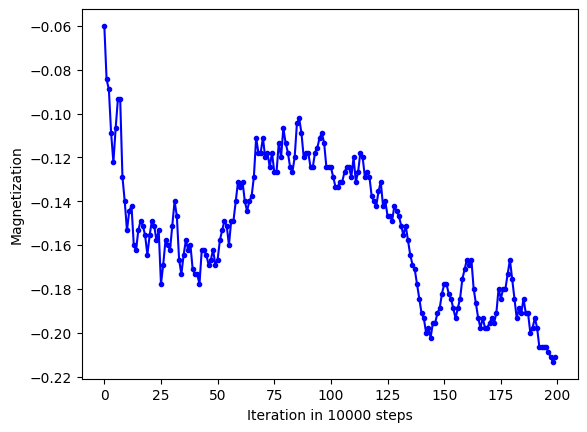

In [49]:
plt.plot(np.arange(iteration_times),mag_list, "-", marker='.',color='blue')
plt.xlabel('Iteration in 10000 steps')
plt.ylabel('Magnetization')

Text(0, 0.5, 'Internal Energy')

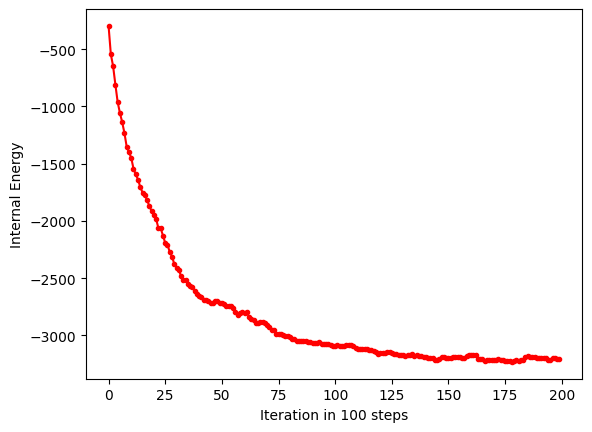

In [50]:
plt.plot(np.arange(iteration_times),internal_energy_list, "-", marker='.',color='red')
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Internal Energy')

Text(0, 0.5, 'Heat Capacity')

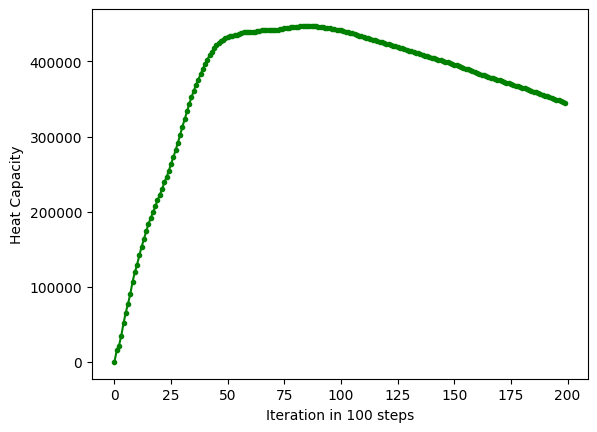

In [51]:
plt.plot(np.arange(iteration_times),heat_capacity_list, "-", marker='.',color='green')
plt.xlabel(f'Iteration in {iteration_length} steps')
plt.ylabel('Heat Capacity')

### Save as gif

In [52]:
# make animation out of all plots
import matplotlib.animation as animation
from PIL import Image

image_array = []

for i in range(iteration_times):
    image_array.append(Image.open('/Users/alex/Desktop/Ising Model/Ising-Model/pics_iteration/ising_model_'+str(i+1)+'.png'))

MovieWriter ffmpeg unavailable; using Pillow instead.


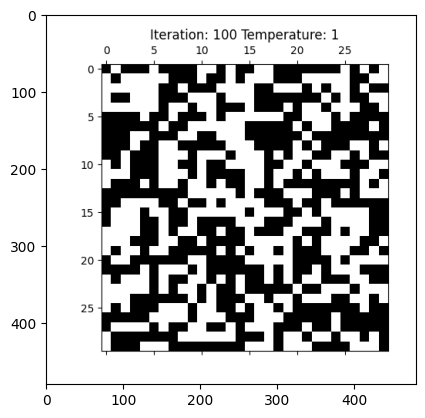

In [53]:
fig,ax = plt.subplots()
im = ax.imshow(image_array[0])

def update(i):
    im.set_array(image_array[i])
    return ax

ani = animation.FuncAnimation(fig,update,frames = len(image_array),interval = 250)
ani.save('ising_model.gif')

### Make measurements at different temperatures, each after 10000 steps

/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_72859/2277176281.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array,cmap='gray')


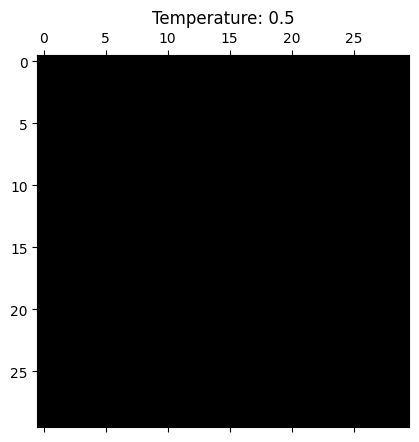

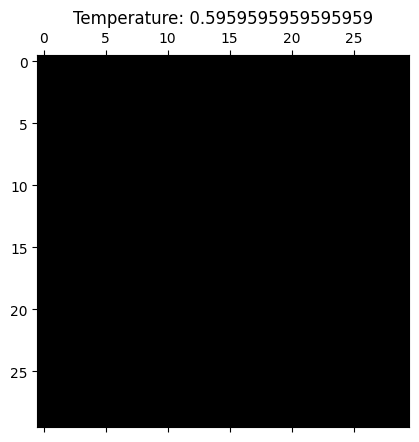

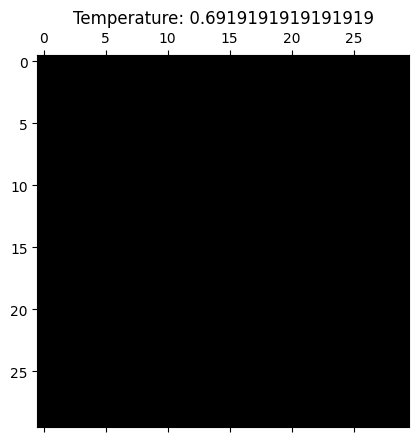

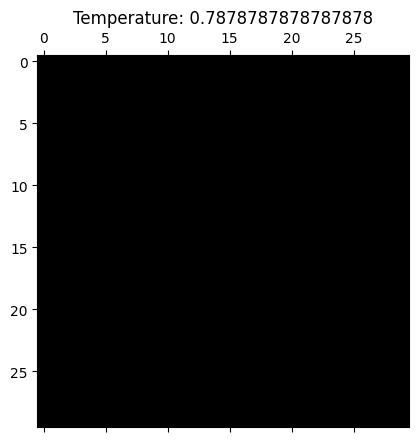

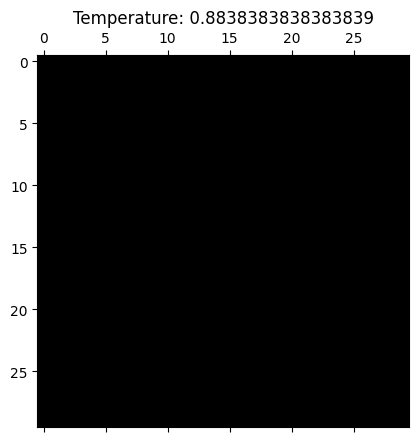

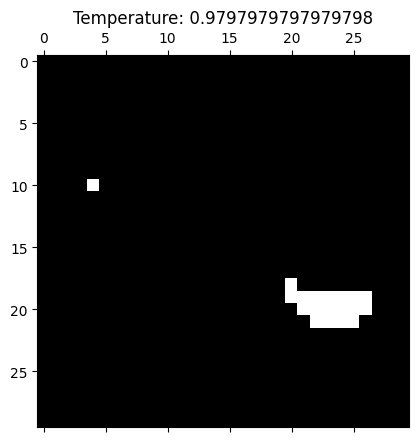

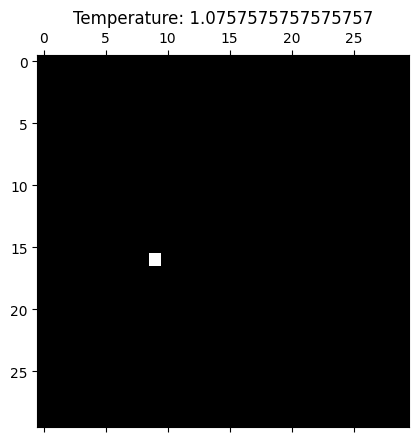

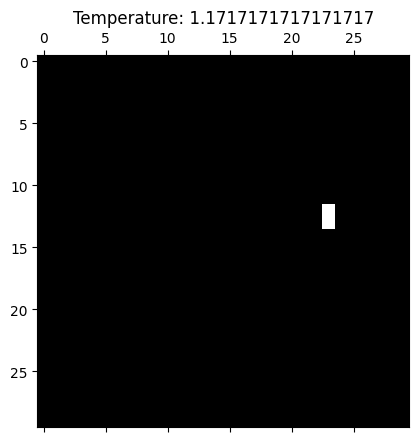

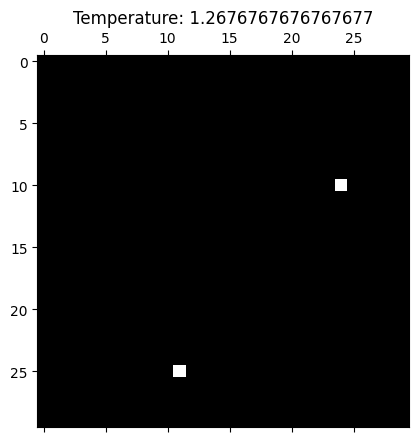

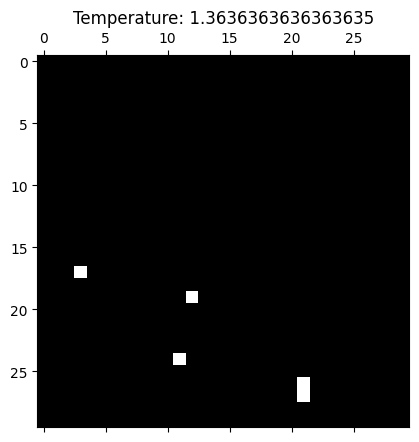

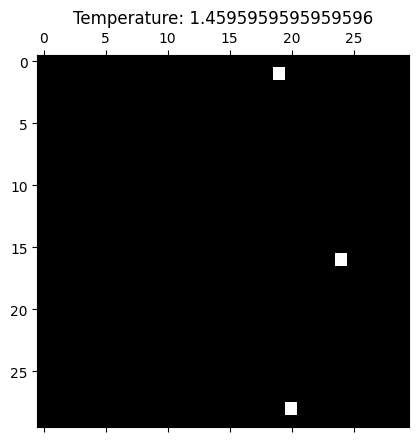

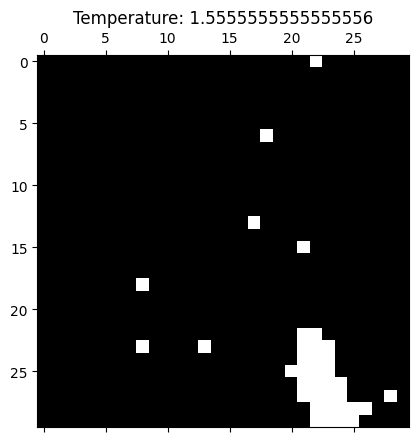

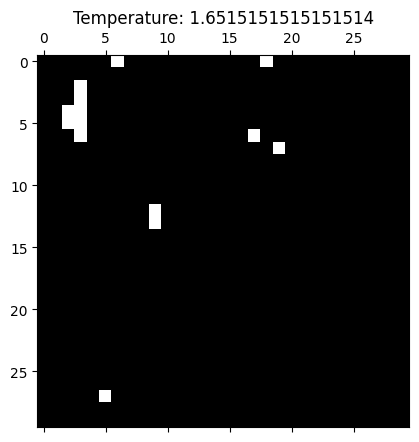

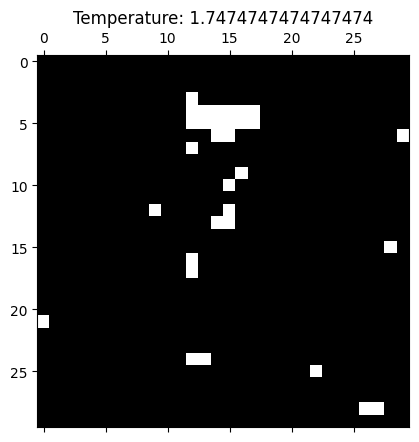

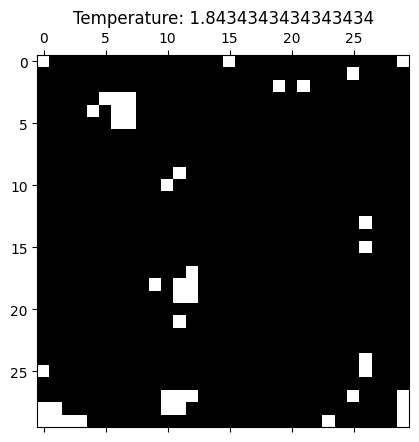

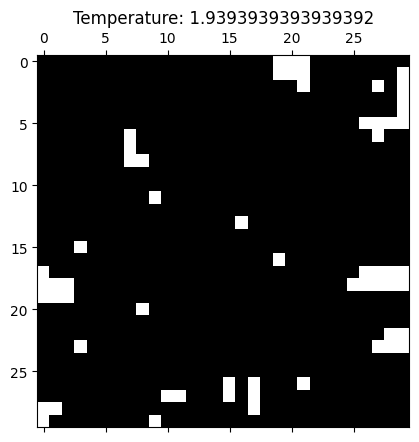

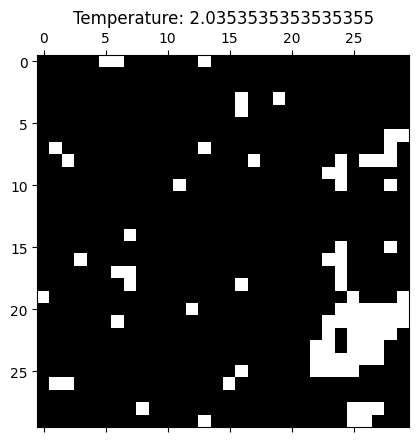

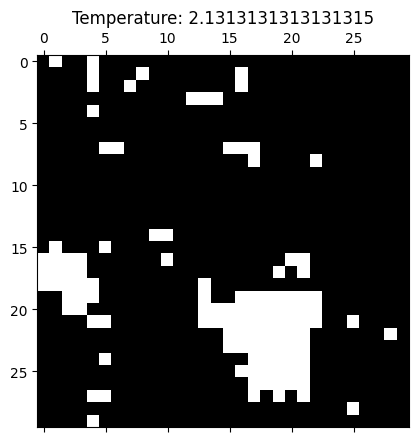

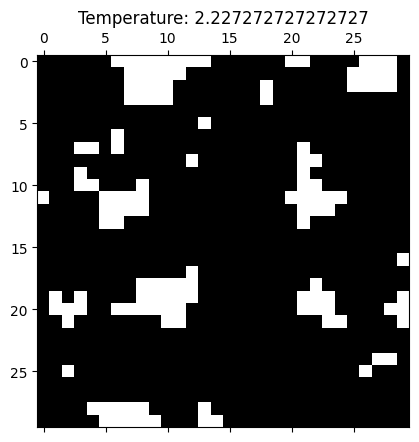

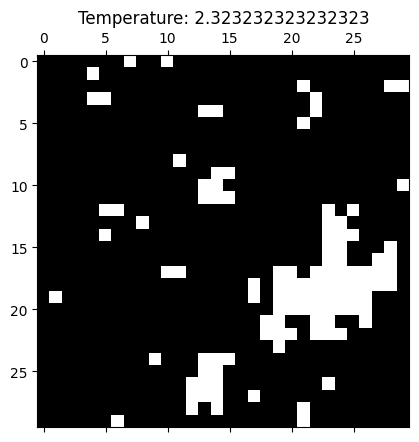

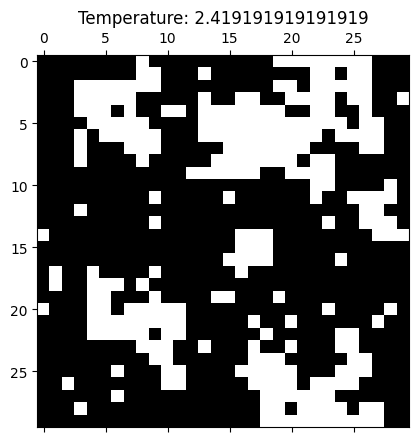

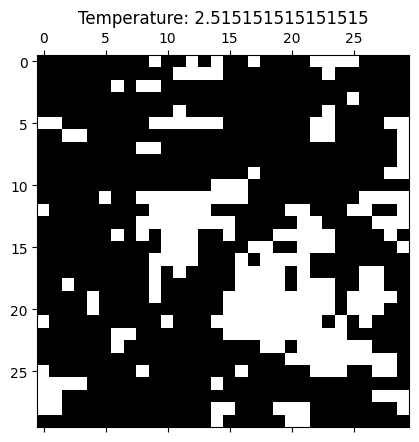

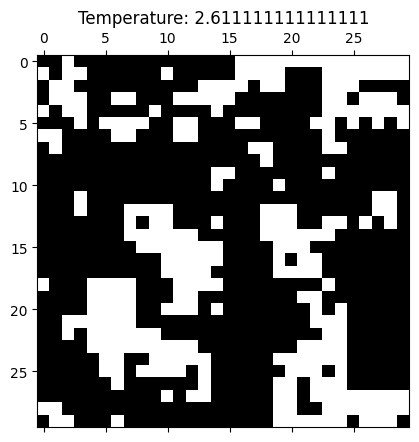

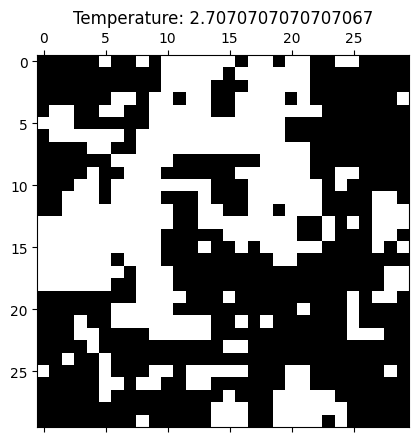

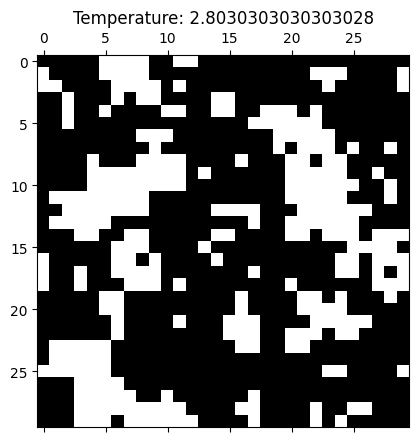

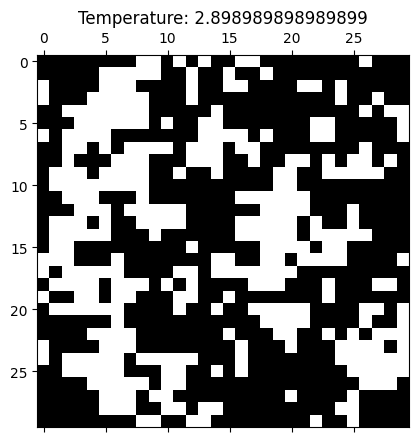

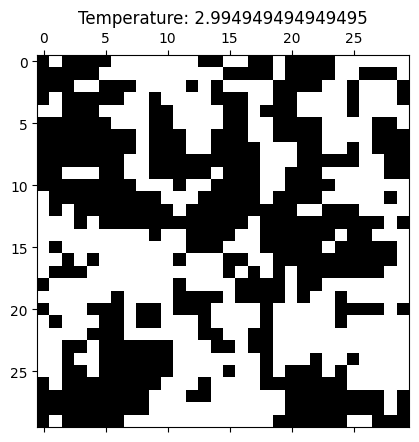

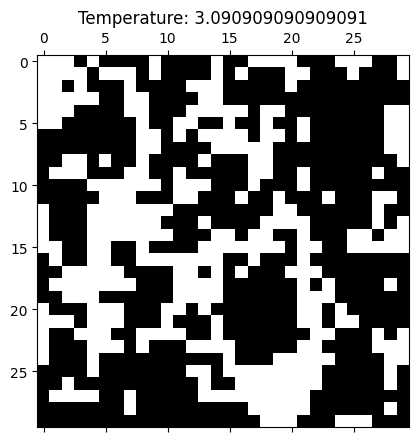

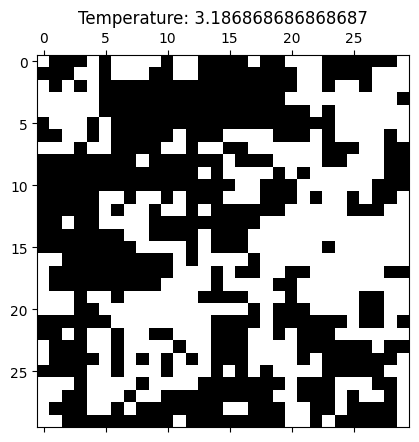

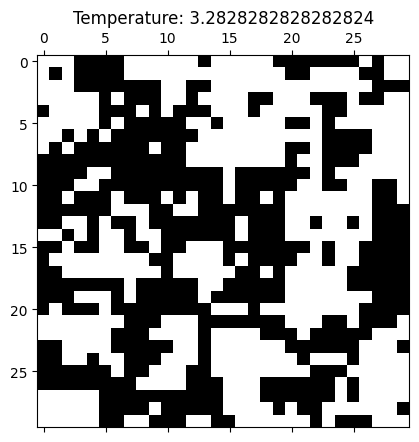

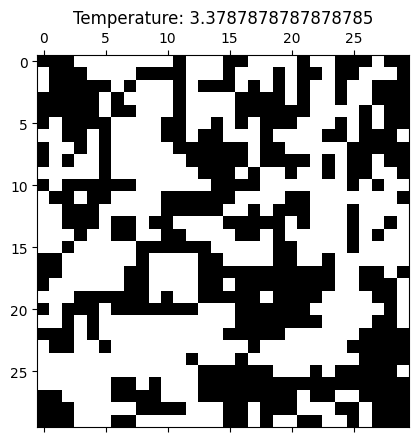

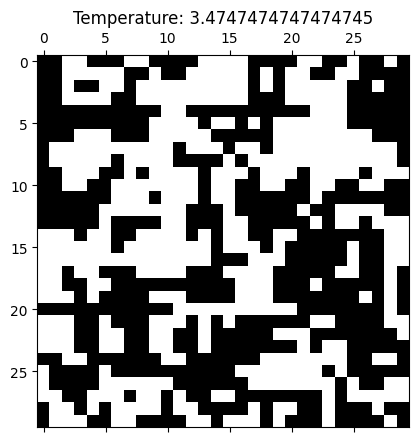

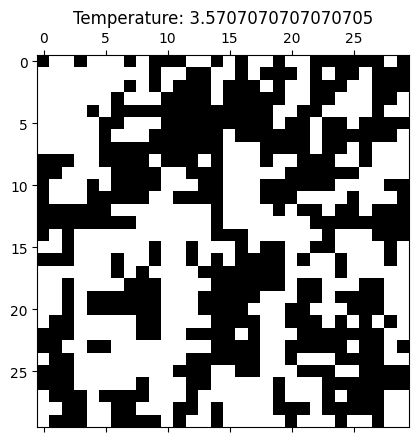

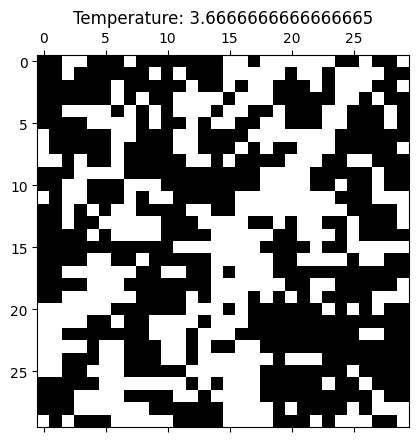

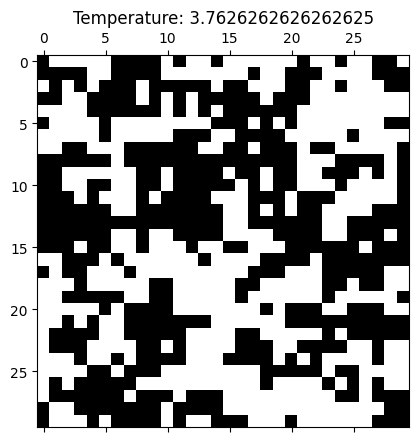

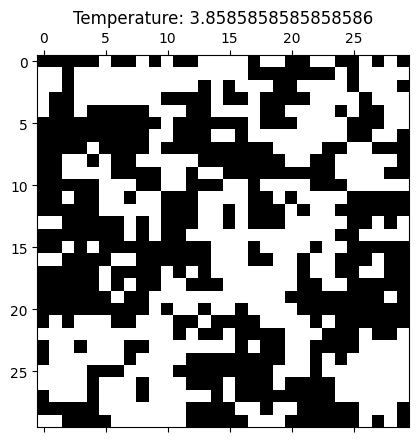

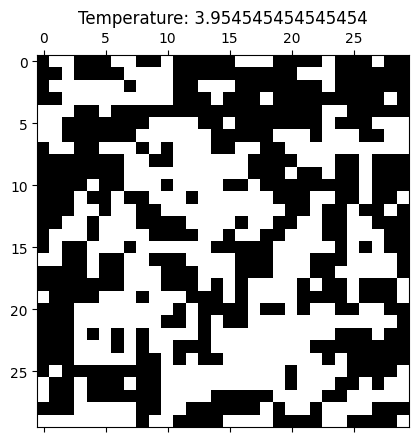

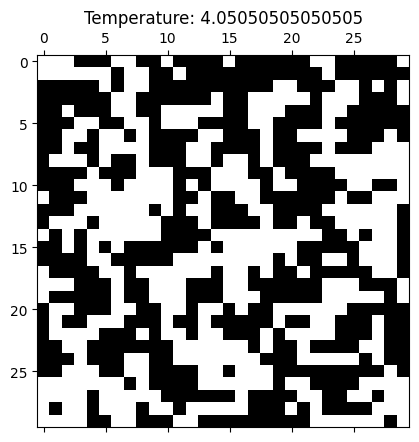

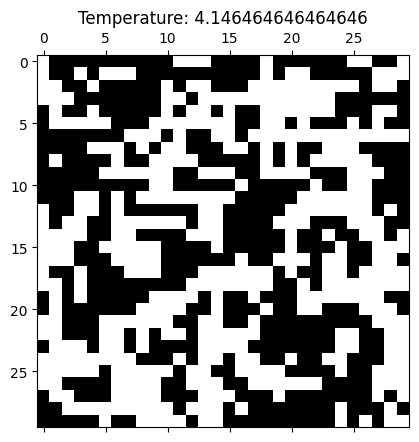

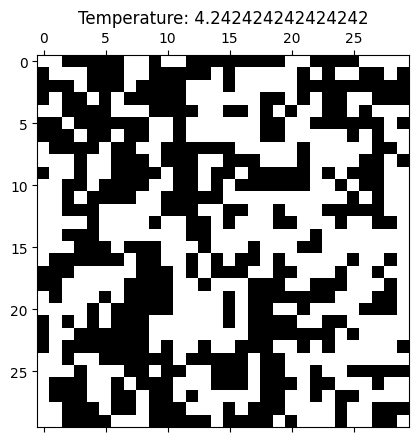

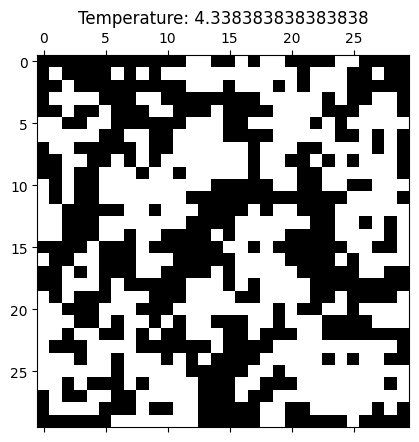

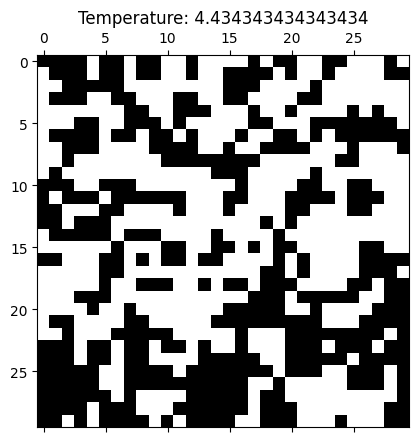

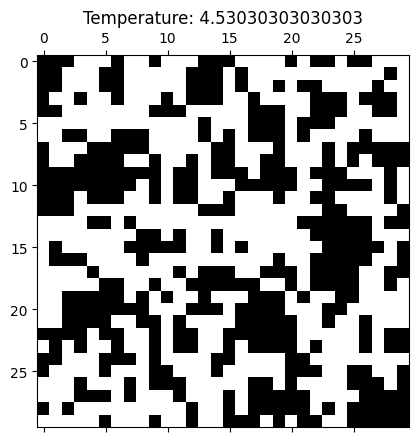

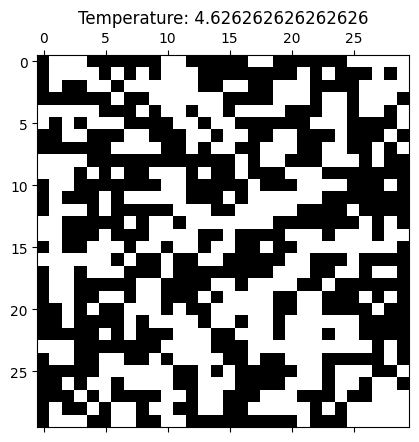

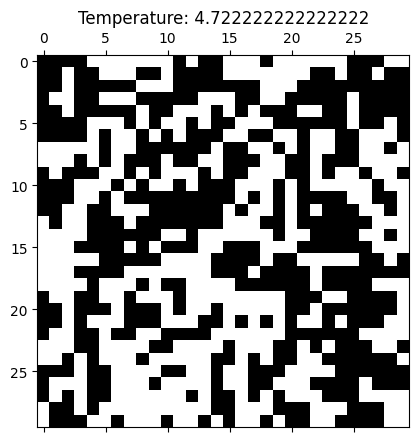

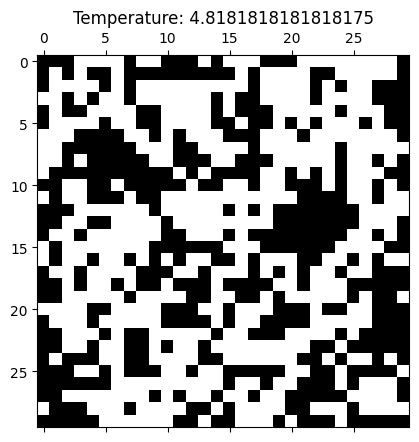

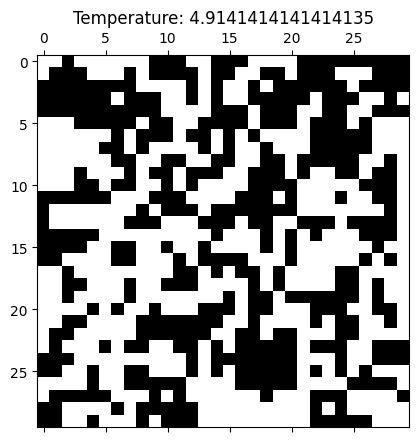

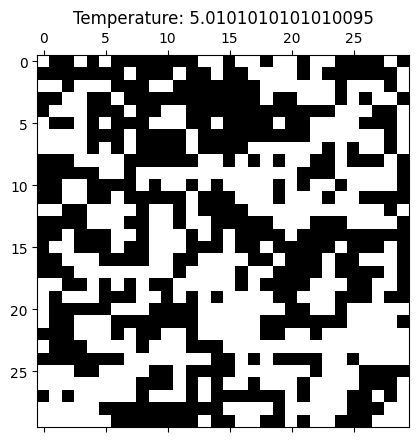

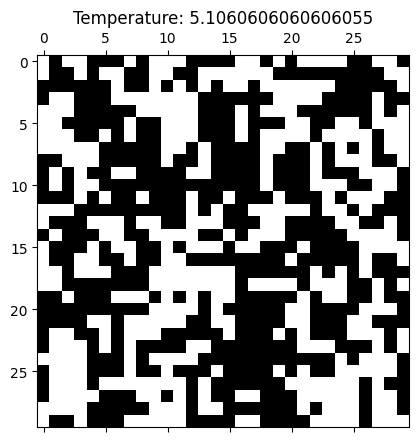

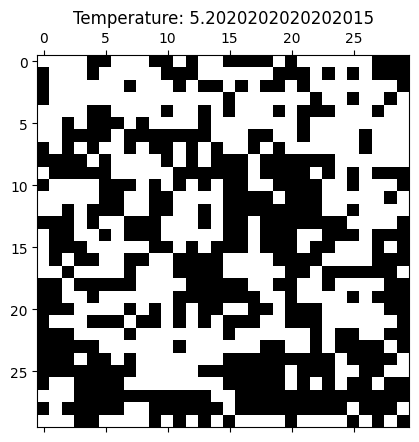

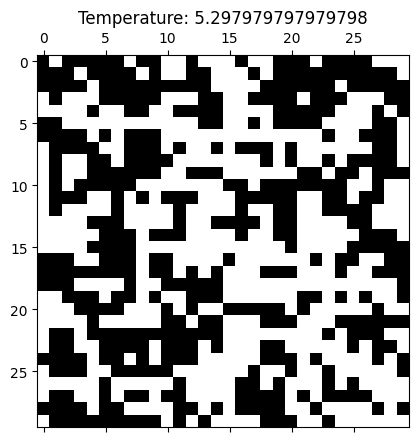

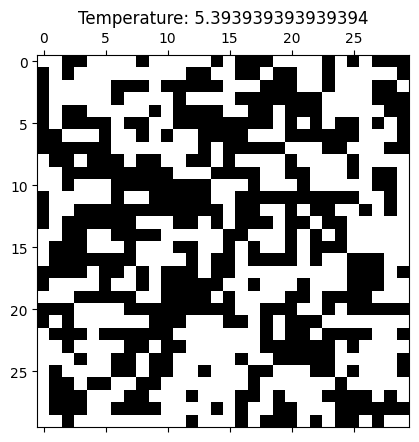

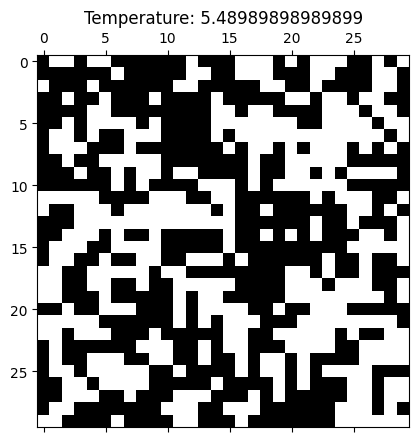

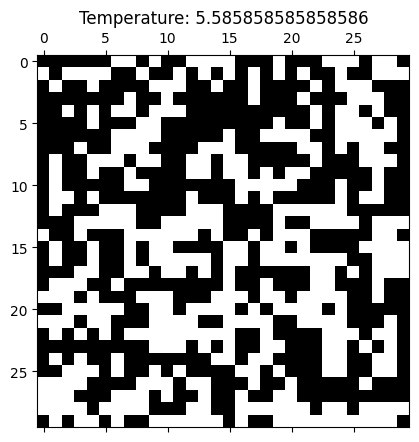

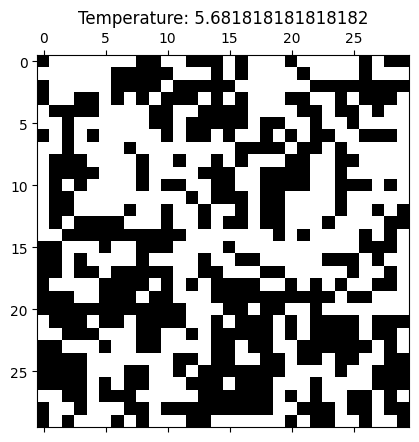

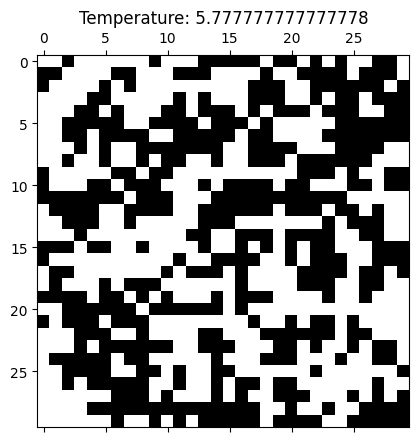

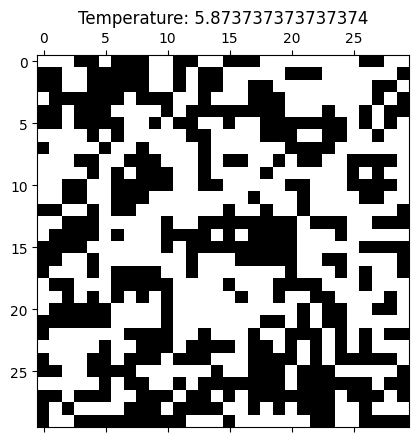

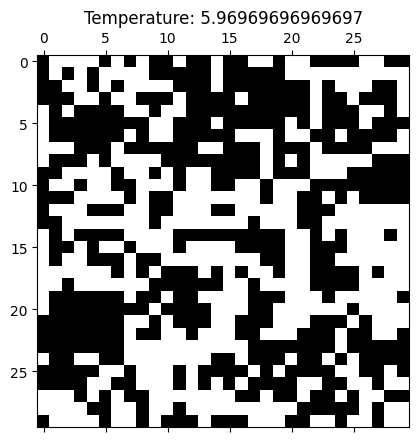

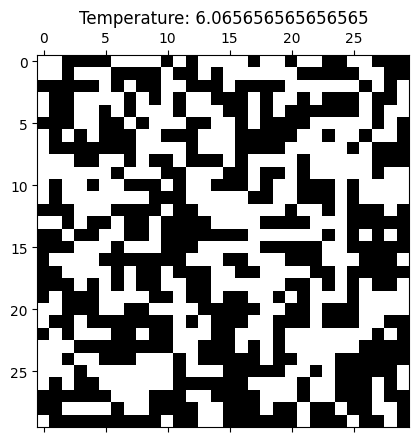

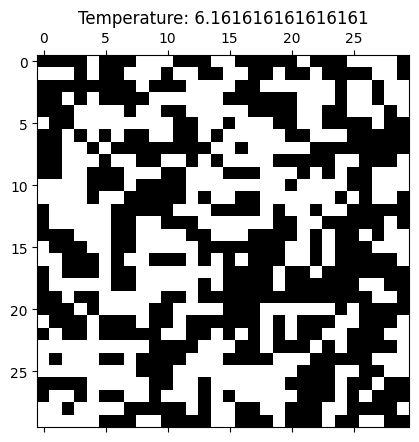

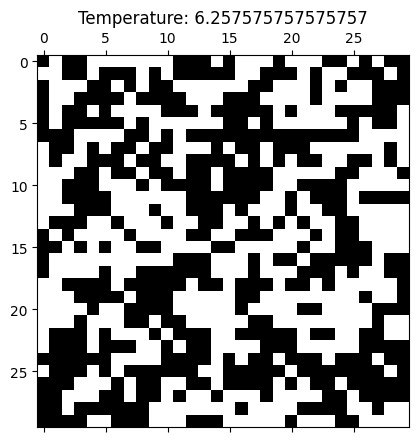

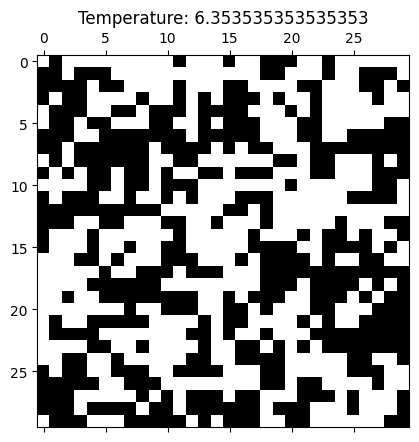

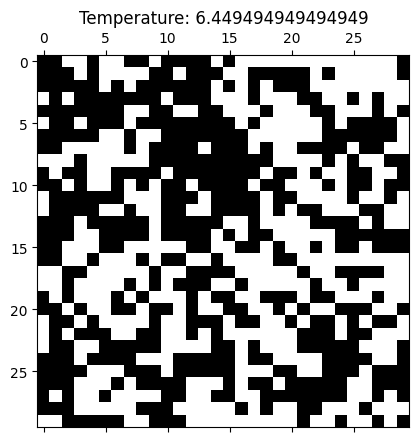

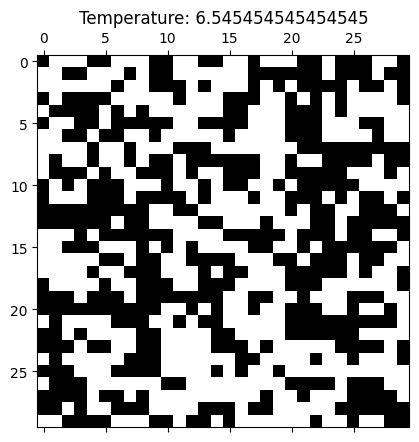

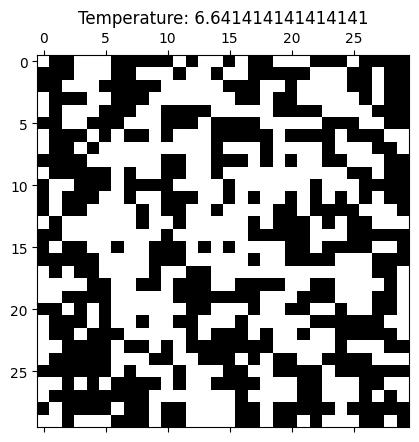

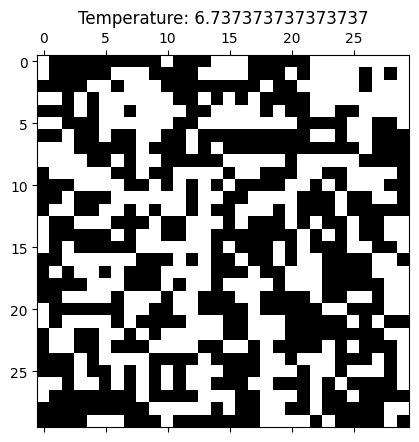

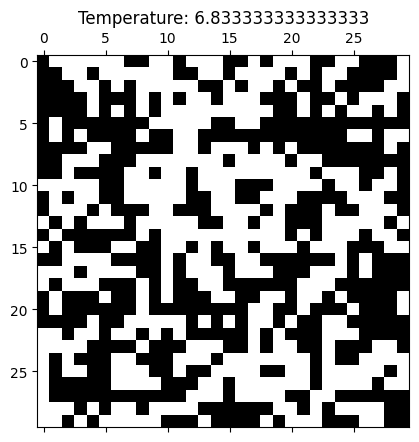

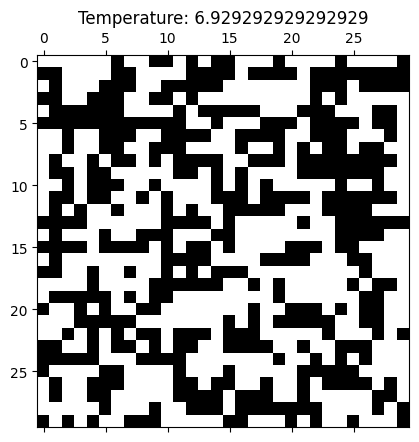

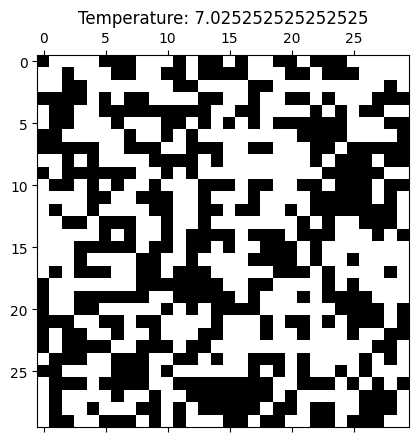

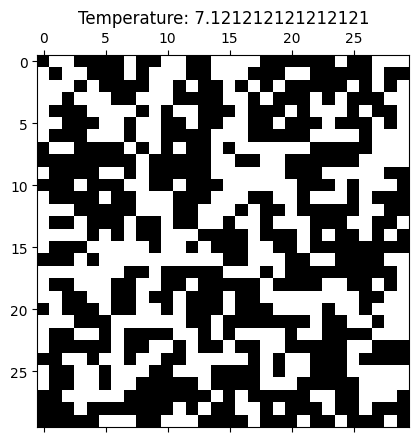

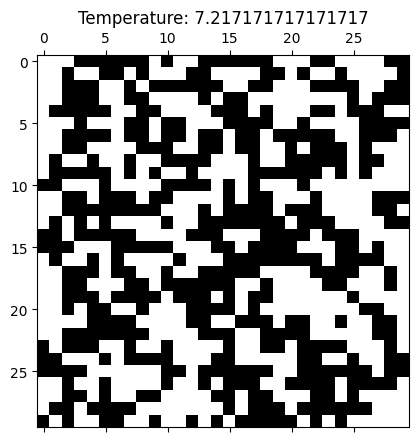

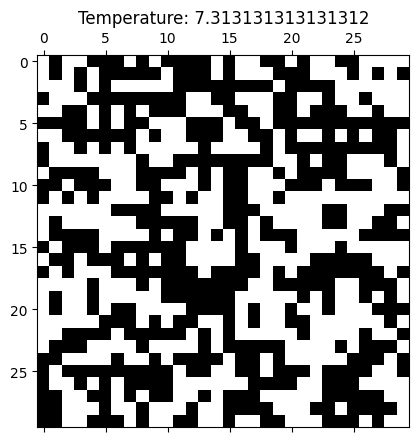

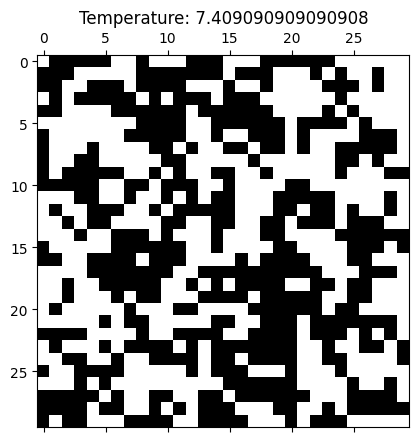

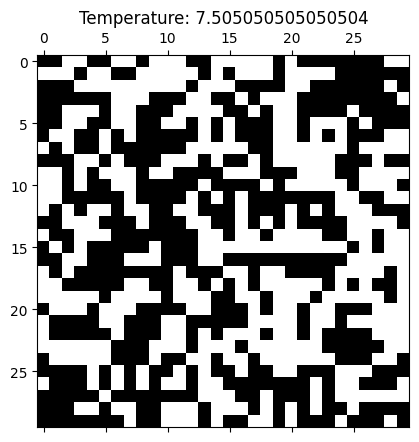

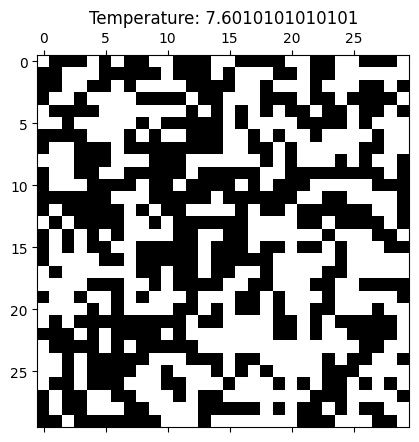

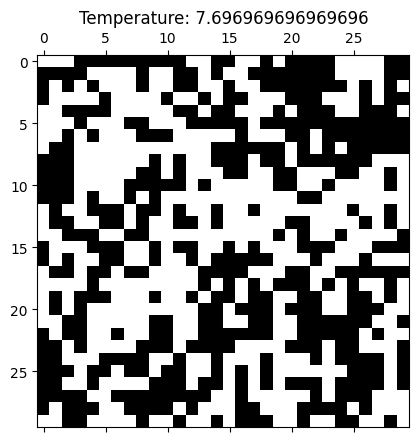

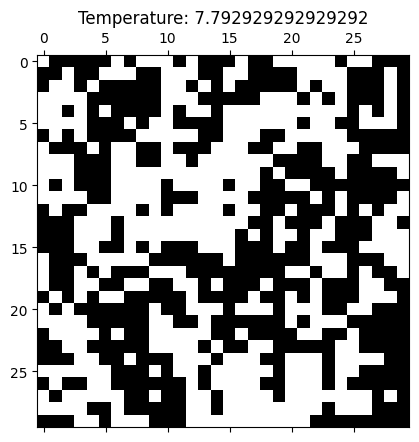

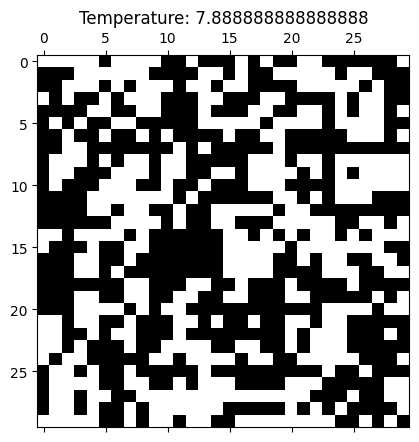

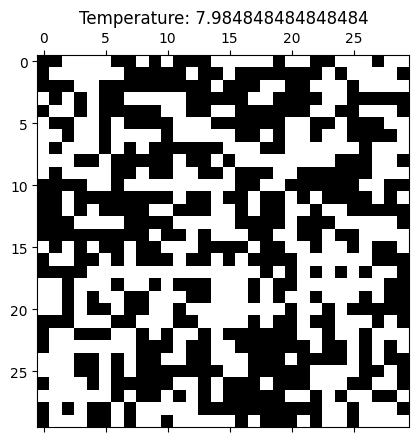

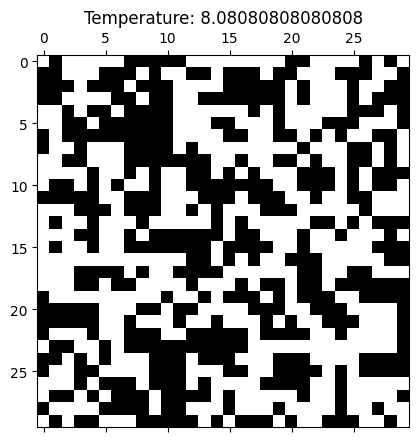

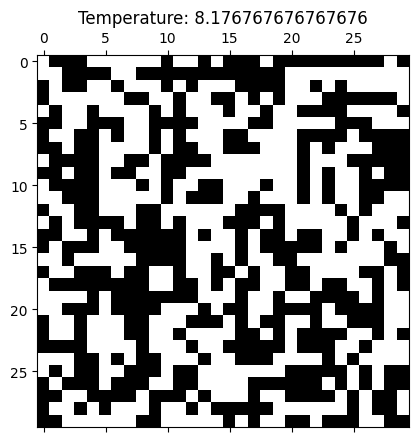

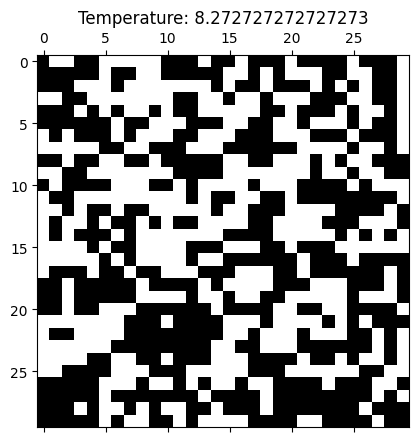

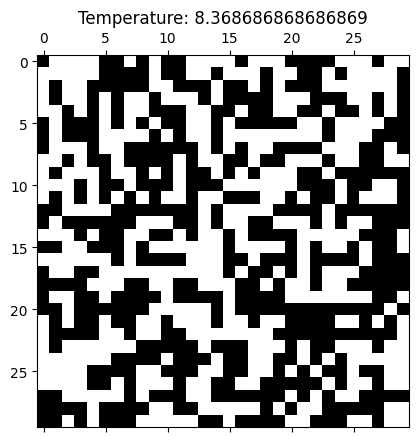

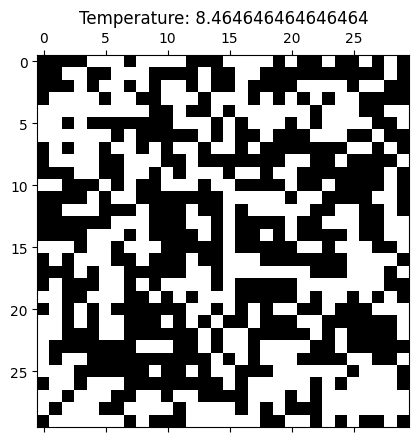

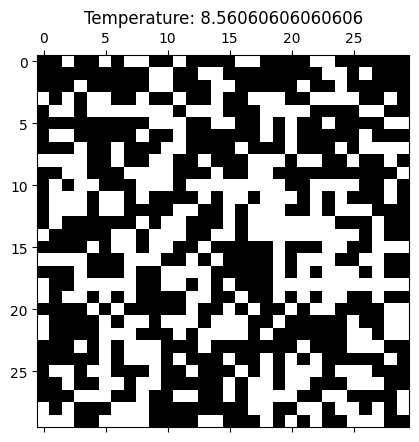

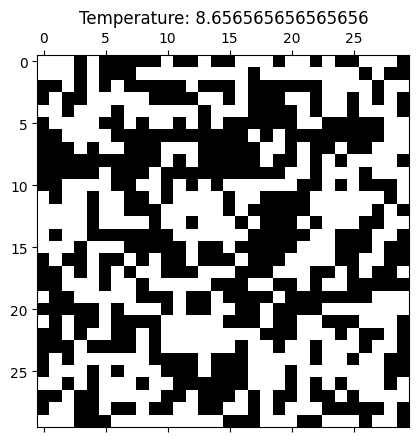

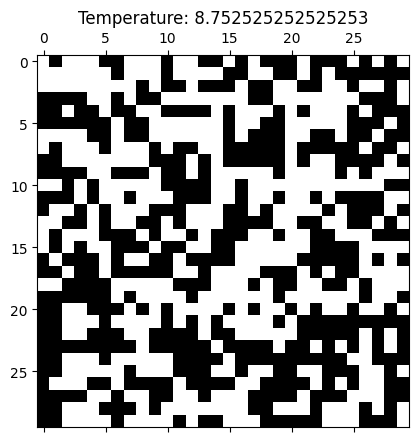

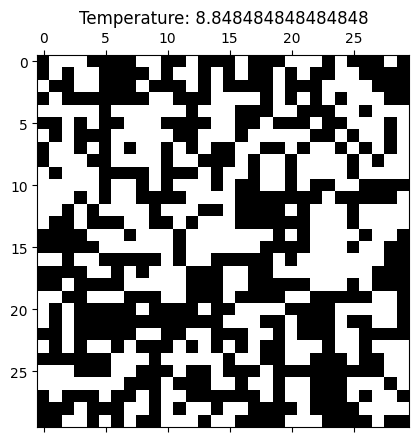

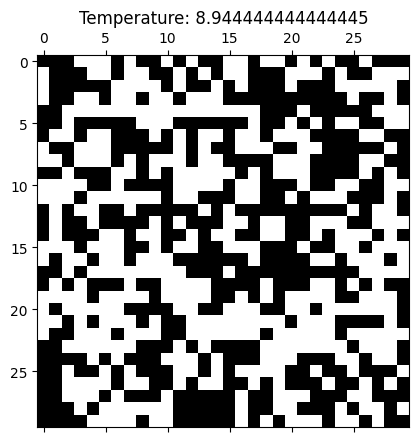

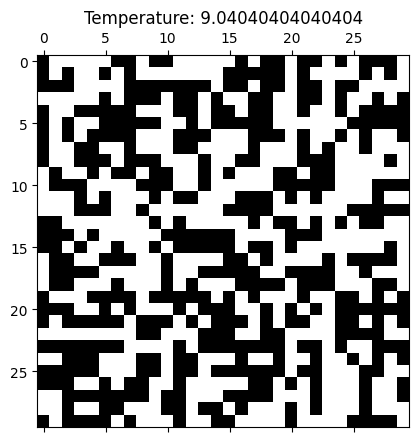

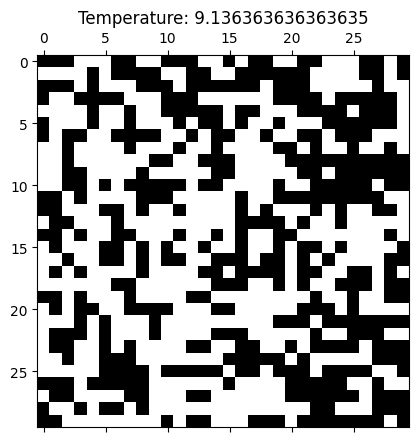

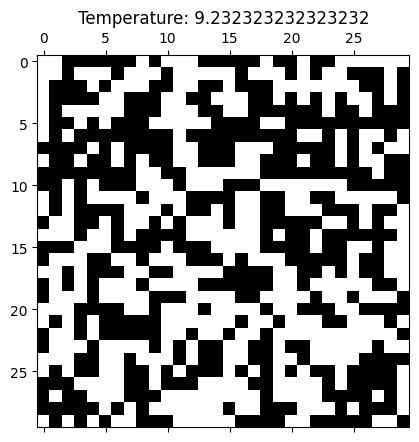

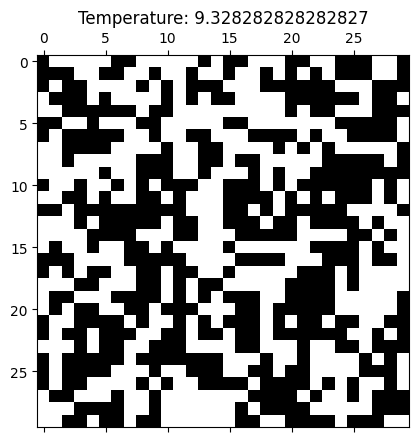

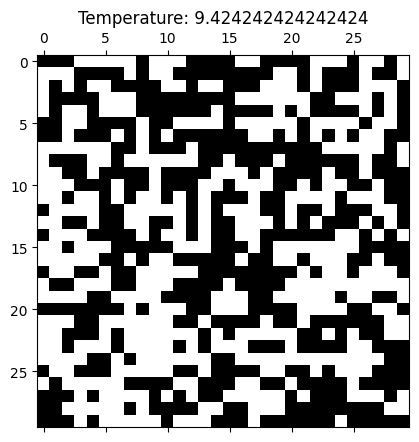

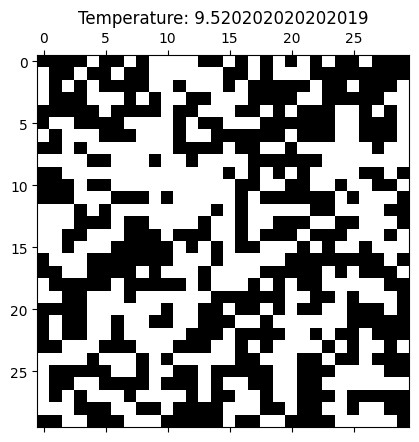

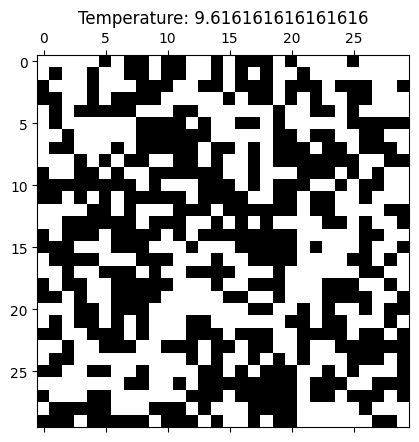

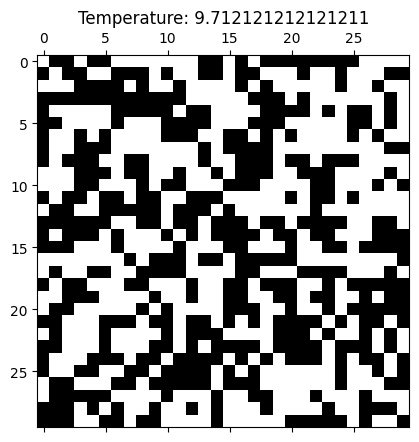

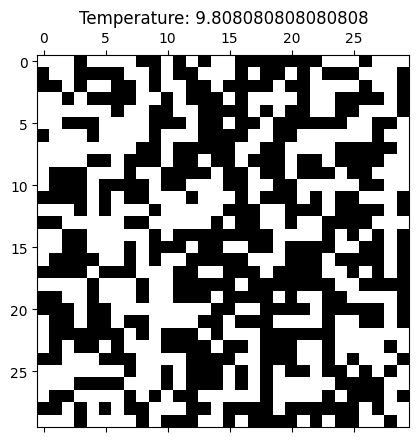

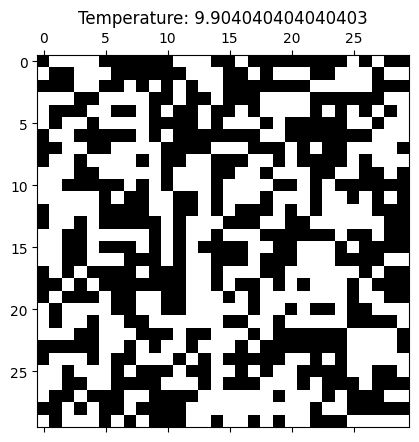

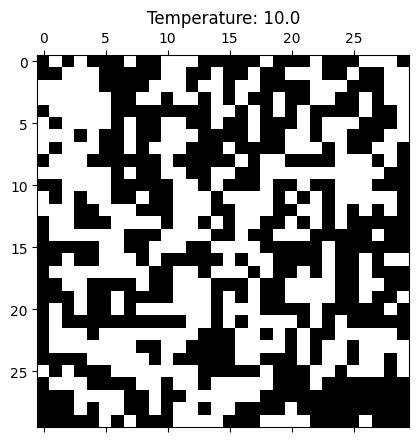

In [54]:
# make measurements af different temperatures for U
temperature_list = np.linspace(0.5,10,100)
a = 0
internal_energy_list_temp = []
internal_energy_variance_list_temp = []
magnetization_list_temp = []
magnetization_variance_list_temp = []
heat_capacity_list_temp = []
susceptibility_list_temp = []

steps_equibrilium = 20000
steps_measurement = 100

for temp in temperature_list:
    grid_array = generate_grid_with_tendency(length_grid,0.7)

    for i in range(steps_equibrilium): #for reaching equibrilium
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp, a = a)
    
    internal_energy_list_temp.append(U(grid_array, a)) #measure internal eneryg after equibrilium
    magnetization_list_temp.append(M(grid_array))      #measure magnetization after equibrilium

    for i in range(steps_measurement): #for measurement of variance
        grid_array,count = Hamiltonian_Monte_carlo(grid = grid_array,temperature = temp, a = a)
        internal_energy_variance_list_temp.append(U(grid_array,a))
        magnetization_variance_list_temp.append(M(grid_array))

    heat_capacity_list_temp.append(heat_capacity(internal_energy_variance_list_temp,temp))
    susceptibility_list_temp.append(susceptibility(magnetization_variance_list_temp,temp))   
        
    plt.matshow(grid_array,cmap='gray')
    plt.title('Temperature: '+str(temp))
    plt.savefig('/Users/alex/Desktop/Ising Model/Ising-Model/pics_temperature_dependence/ising_model_temp'+str(temp)+'.png')

Text(0.5, 1.0, 'Internal Energy without external field')

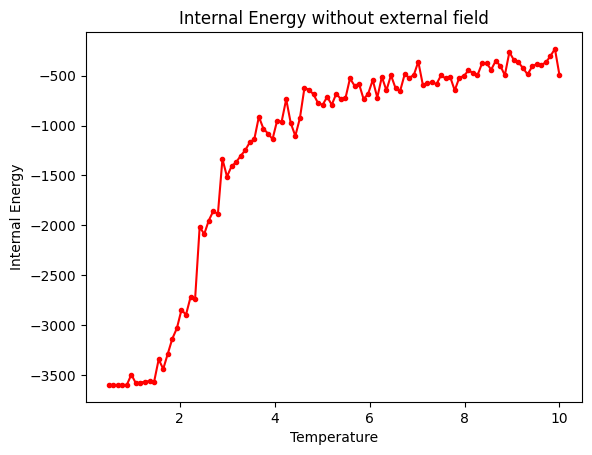

In [55]:
plt.plot(temperature_list,internal_energy_list_temp, "-", marker='.',color='red')
plt.xlabel('Temperature')
plt.ylabel('Internal Energy')
plt.title('Internal Energy without external field')

Text(0.5, 1.0, 'Magnetization without external field')

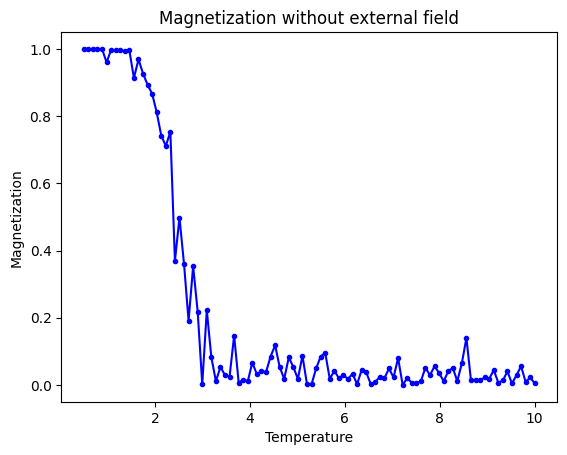

In [56]:
plt.plot(temperature_list,np.abs(magnetization_list_temp), "-", marker='.',color='blue')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization without external field')

Text(0.5, 1.0, 'Heat Capacity without external field')

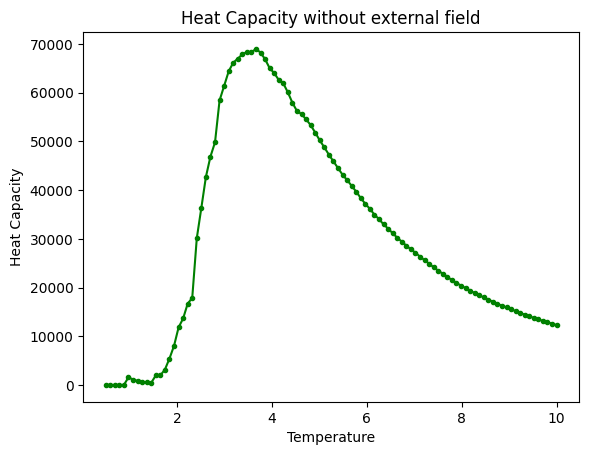

In [57]:
plt.plot(temperature_list,heat_capacity_list_temp, "-", marker='.',color='green')
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity without external field')

Text(0.5, 1.0, 'Susceptibility without external field')

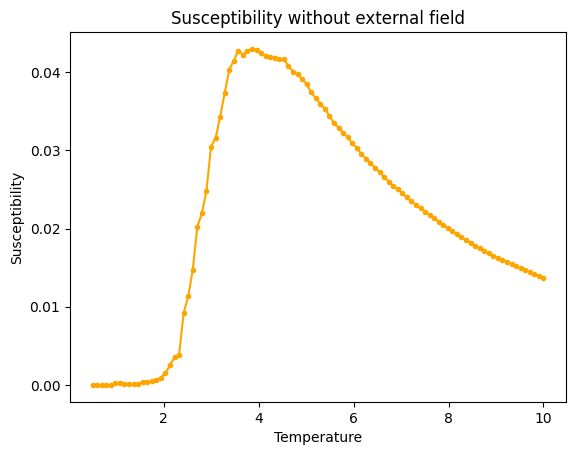

In [58]:
plt.plot(temperature_list,susceptibility_list_temp, "-", marker='.',color='orange')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.title('Susceptibility without external field')

/var/folders/ws/1ntjj2_549vfjr7792jlvh5r0000gn/T/ipykernel_72859/3463293410.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.matshow(grid_array_mag,cmap='gray')


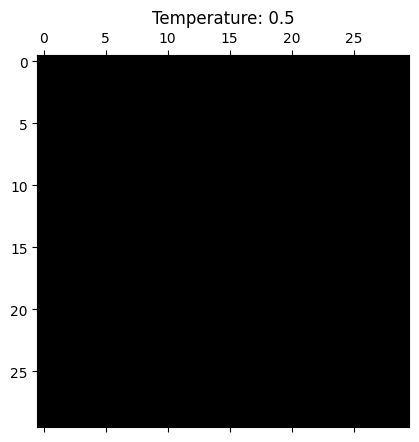

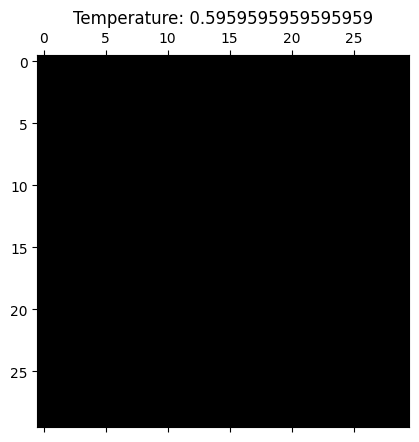

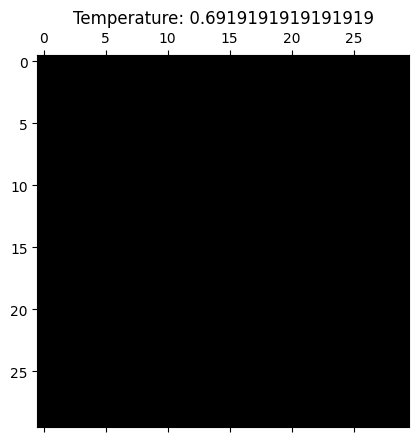

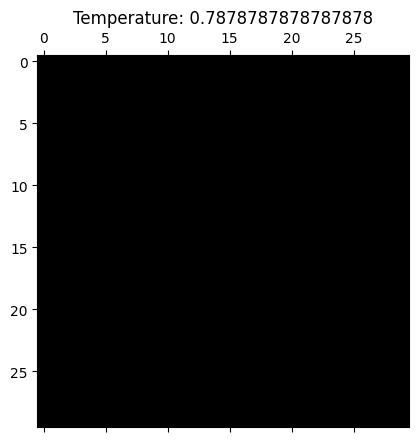

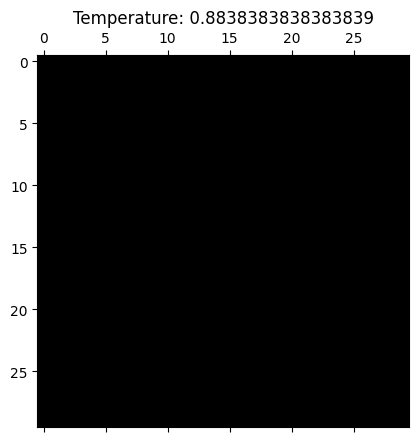

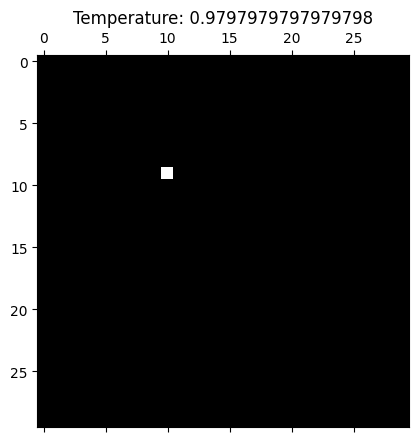

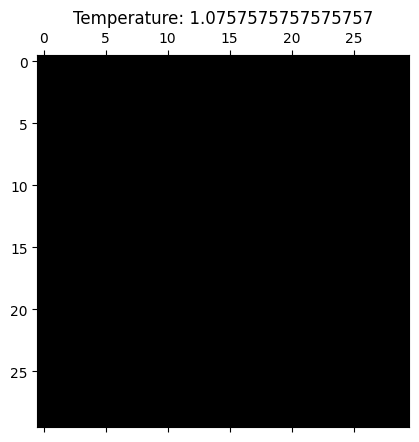

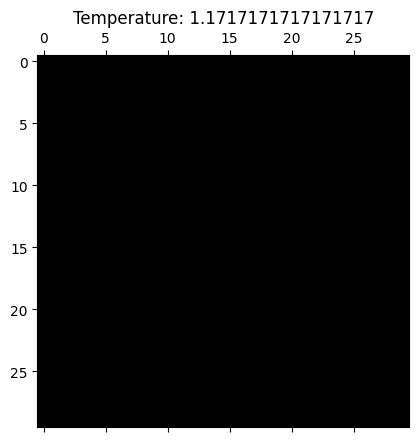

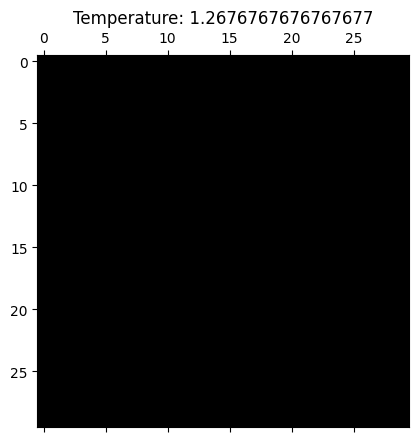

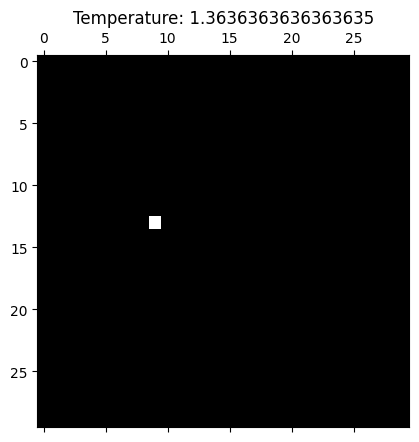

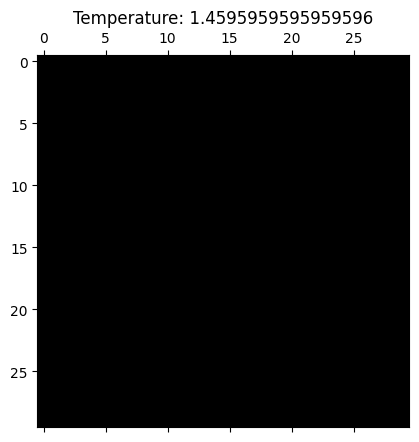

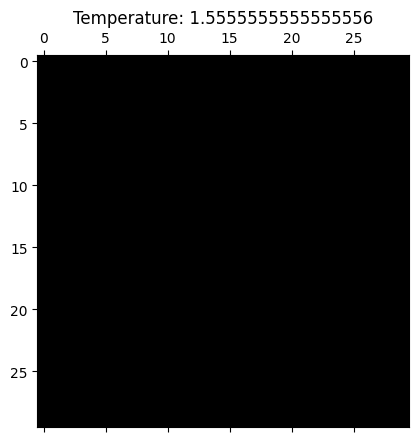

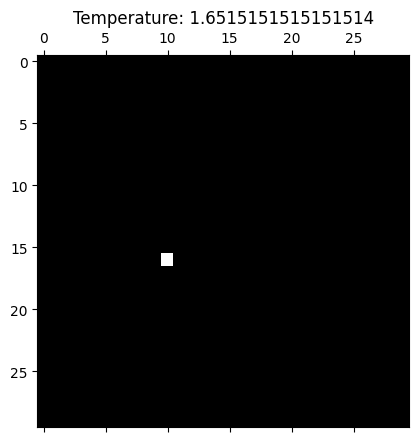

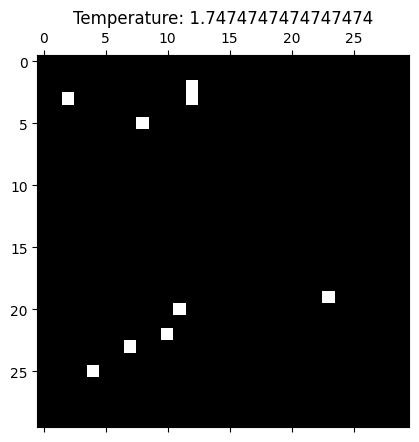

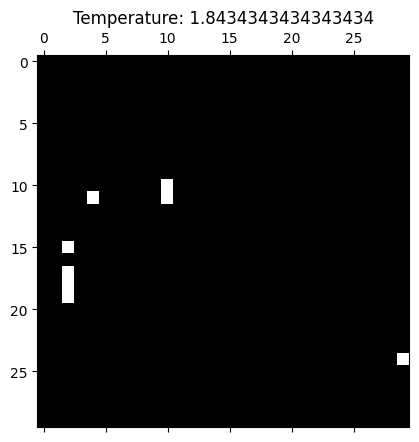

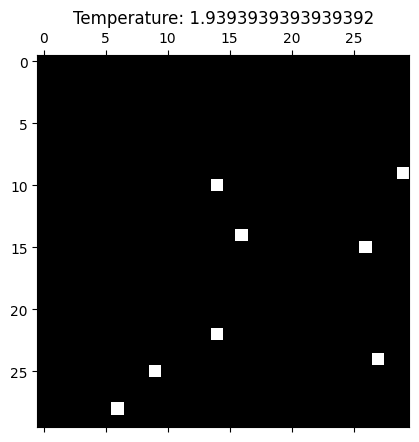

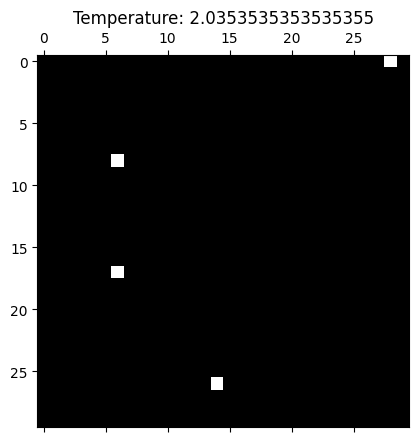

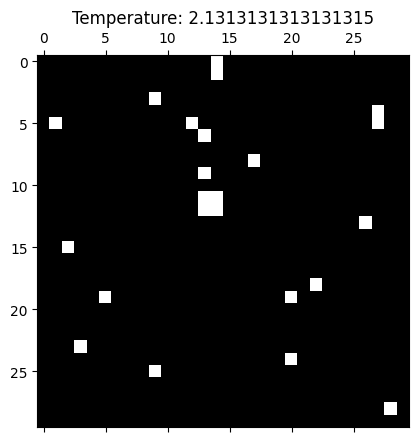

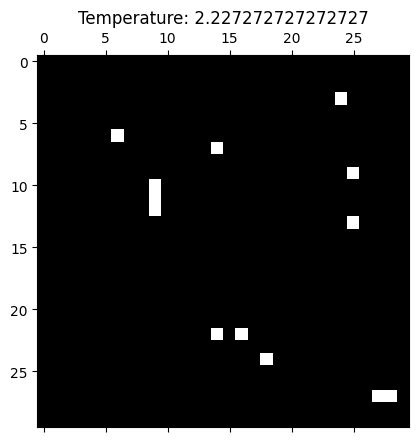

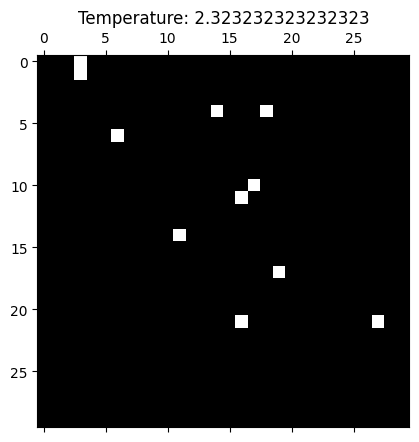

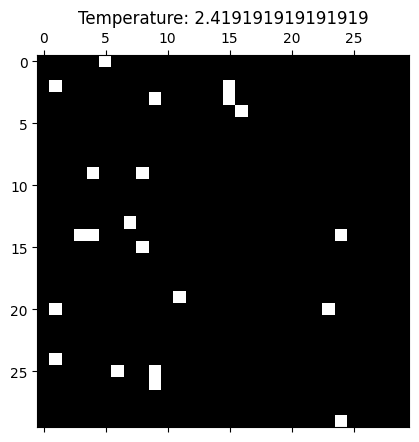

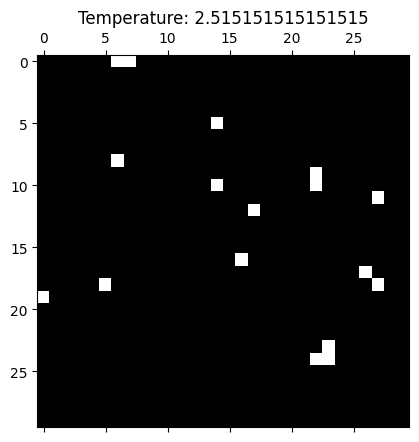

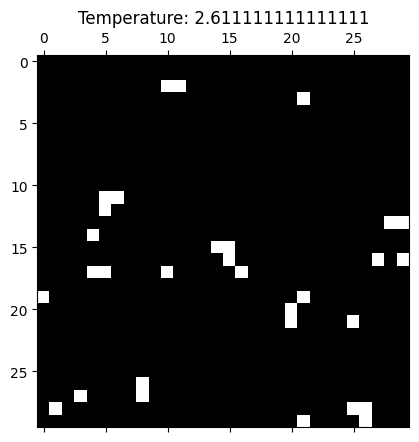

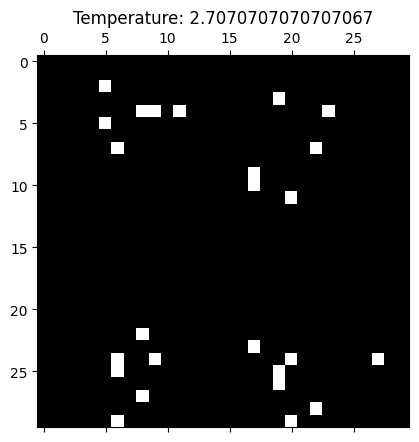

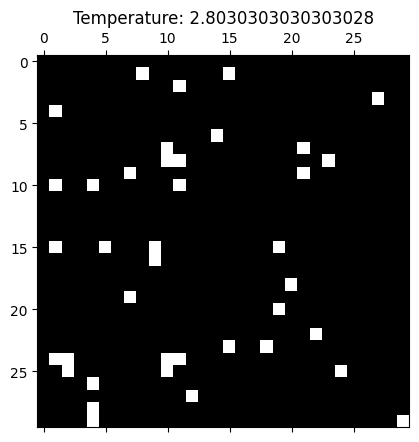

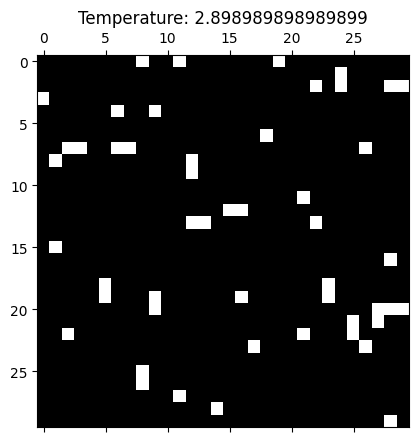

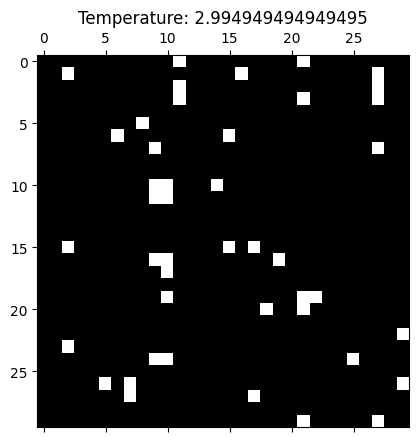

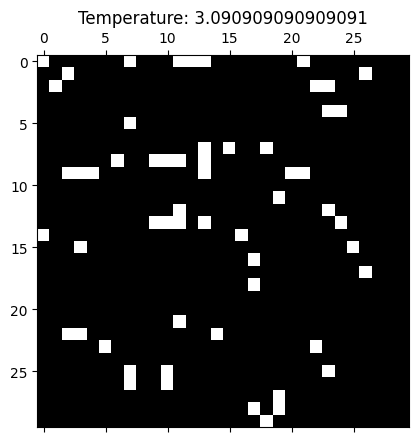

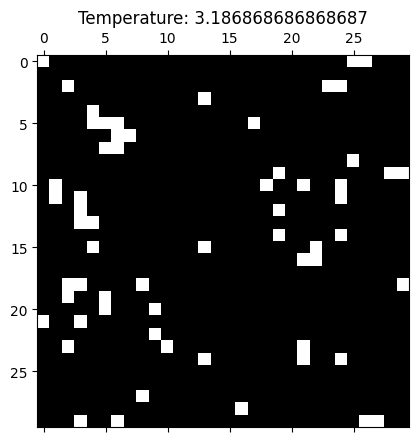

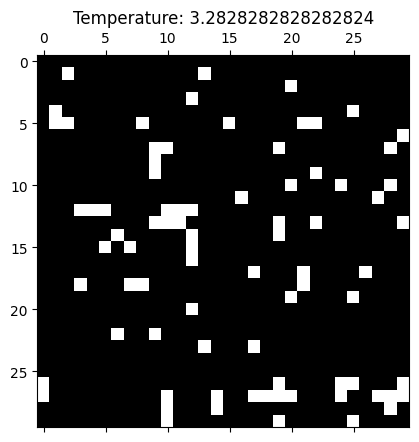

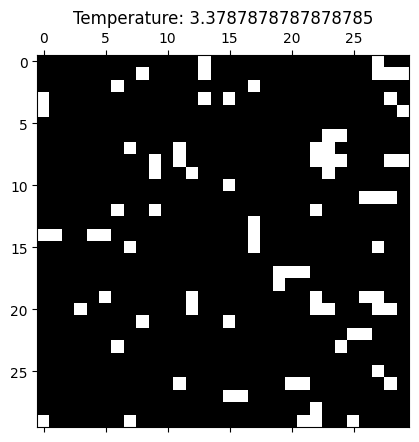

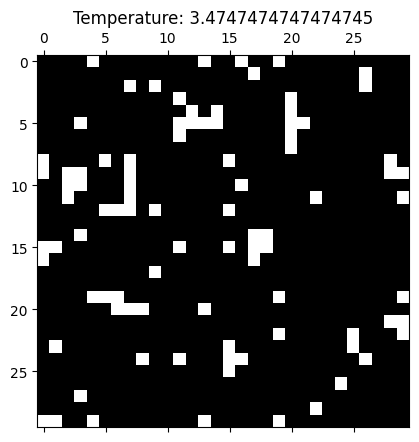

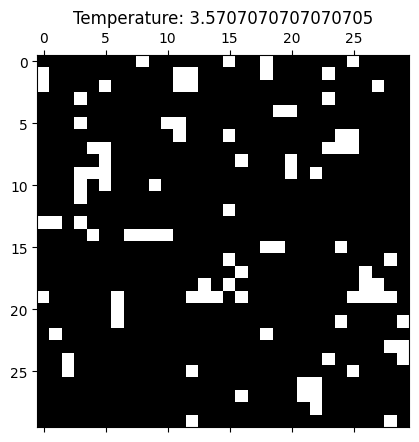

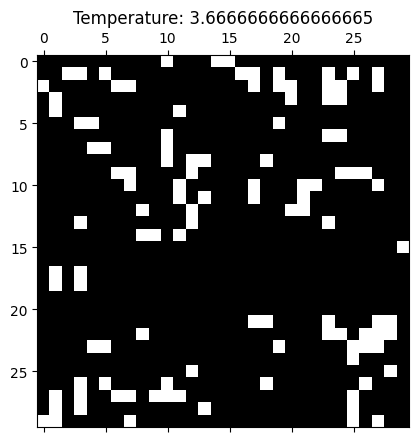

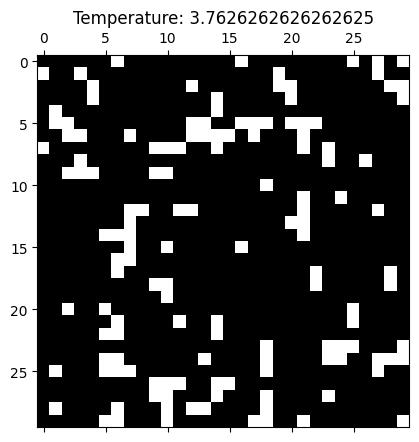

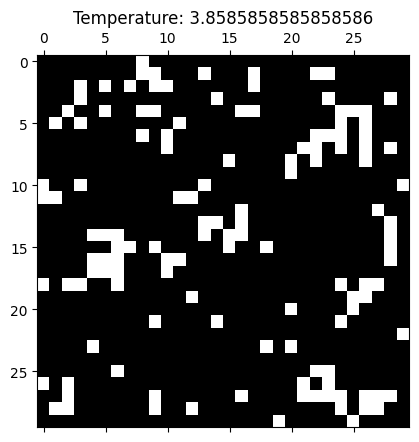

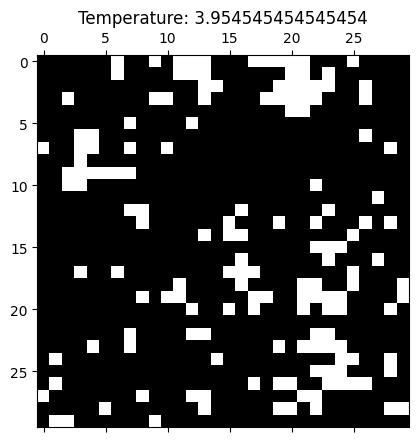

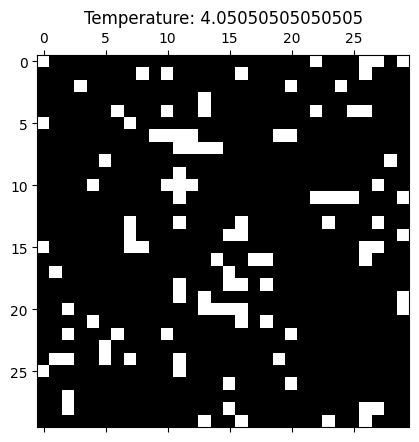

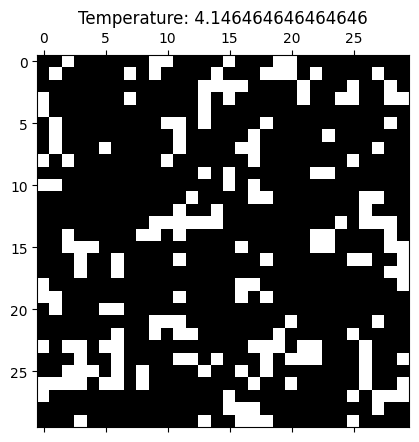

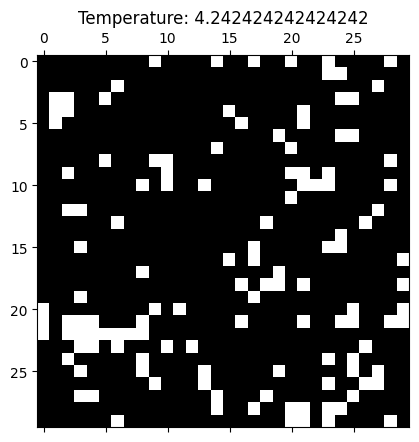

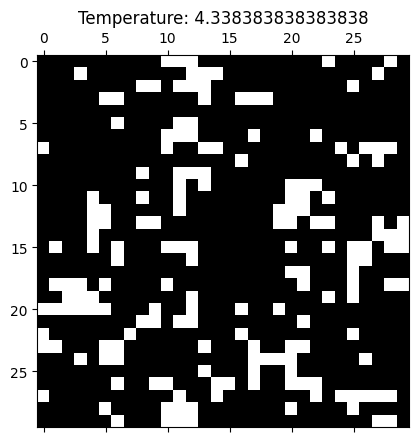

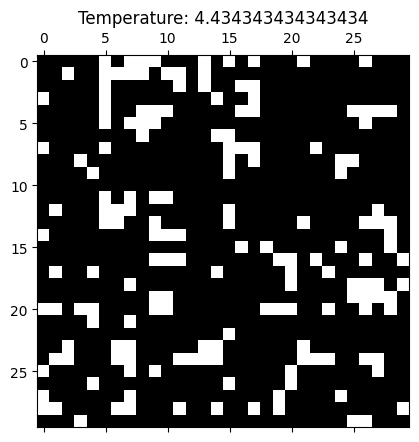

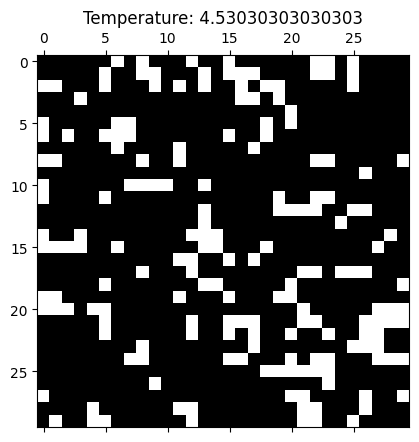

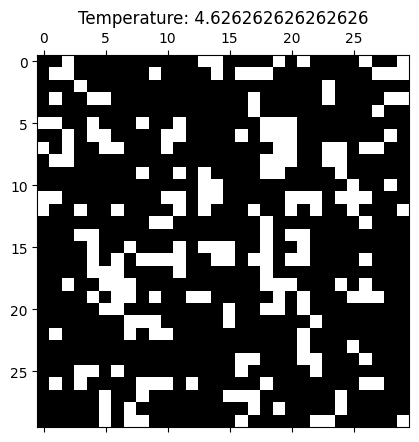

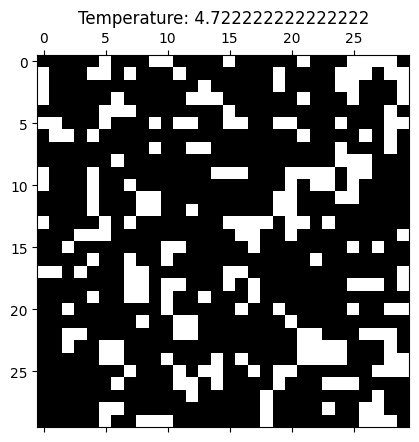

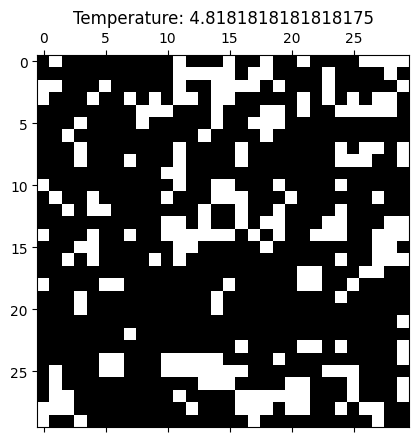

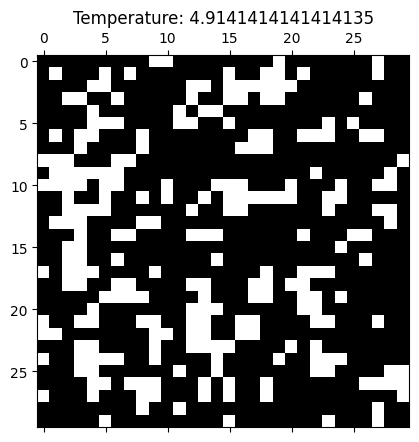

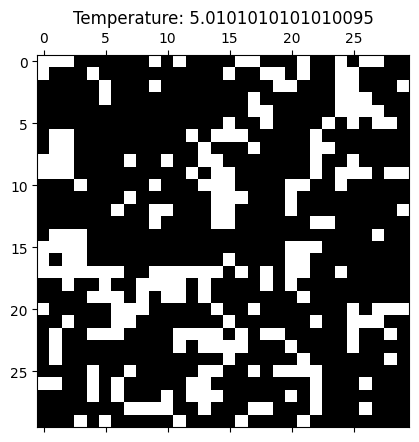

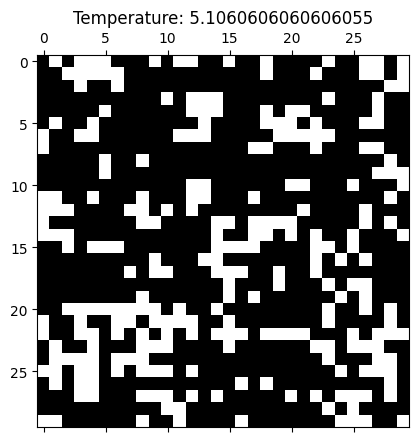

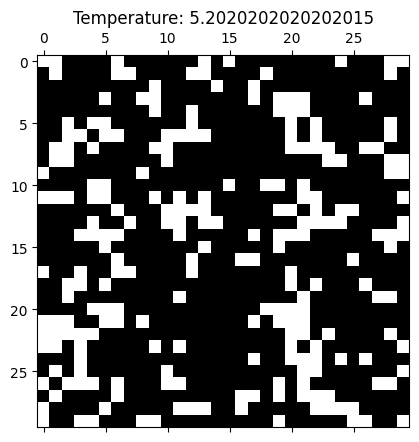

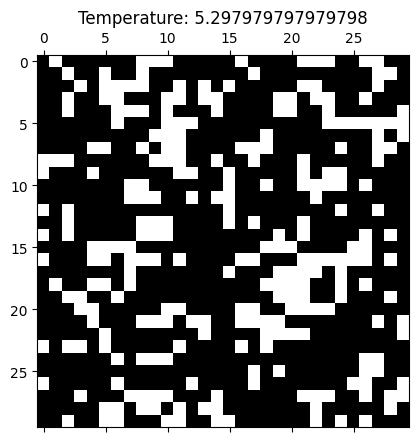

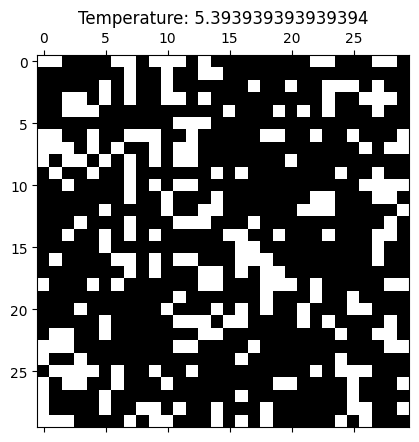

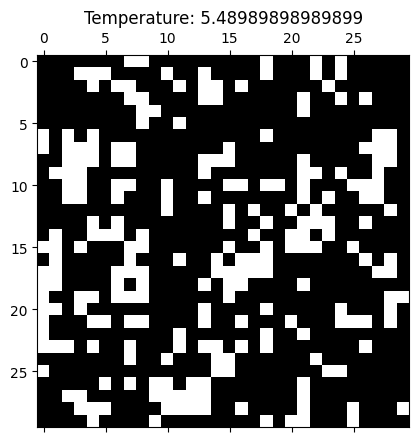

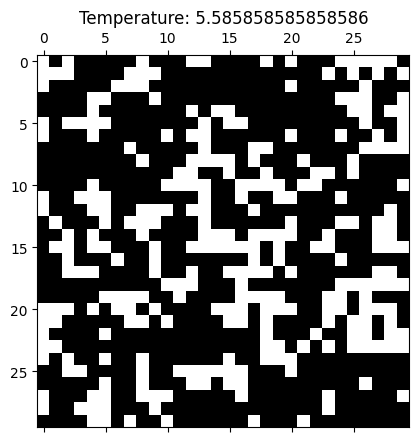

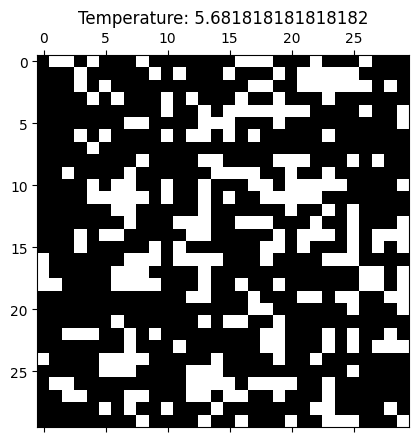

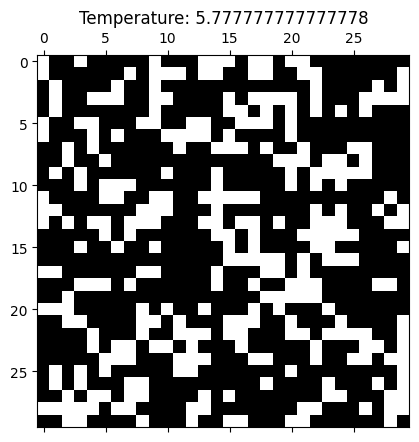

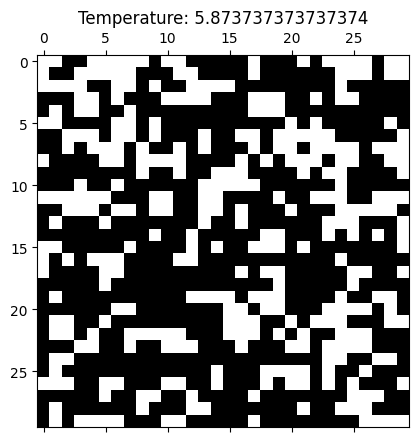

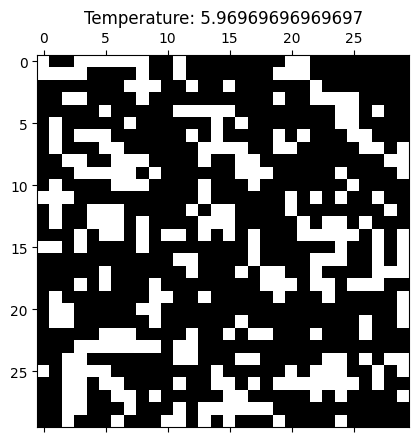

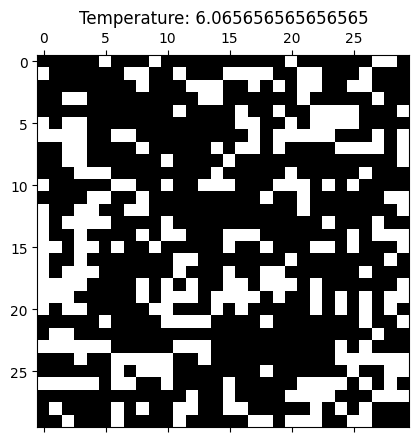

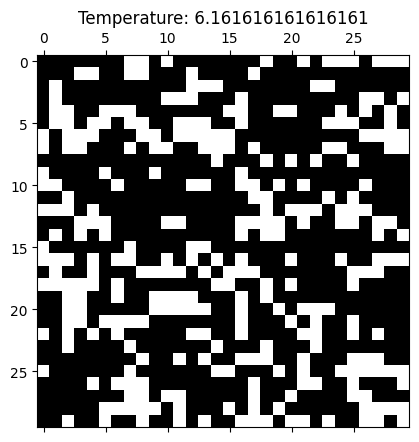

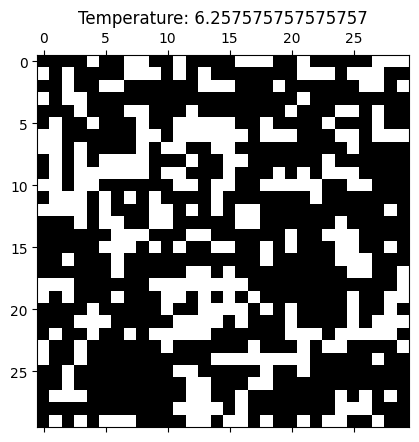

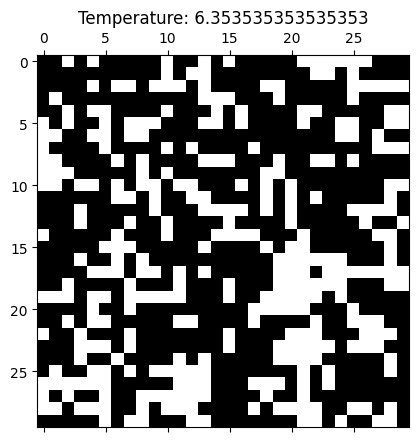

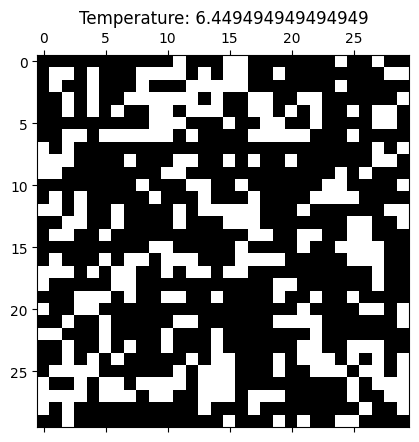

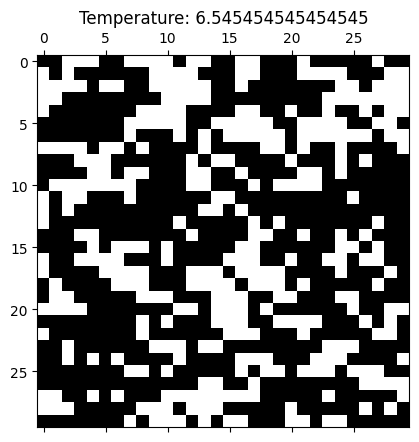

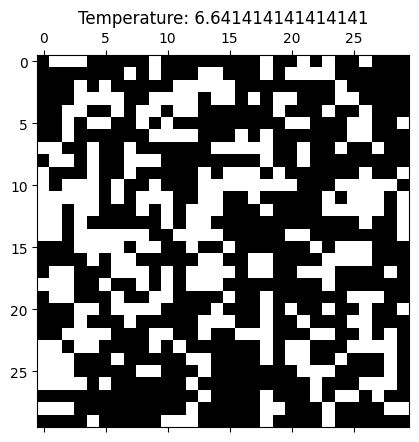

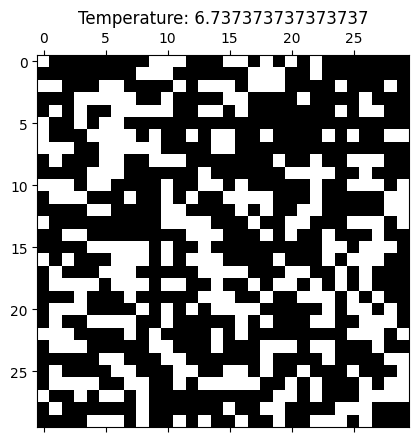

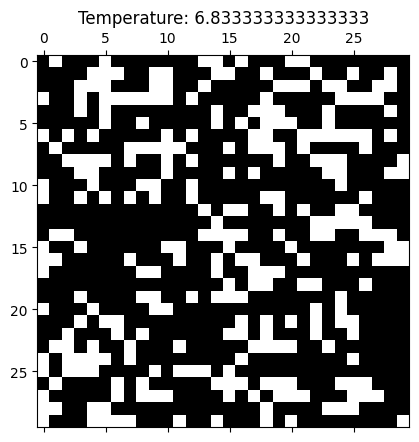

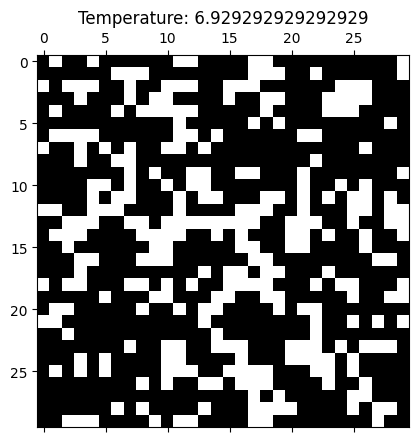

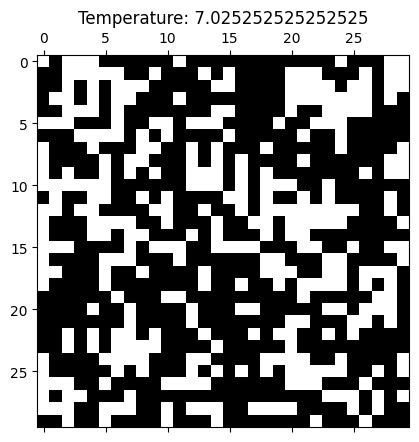

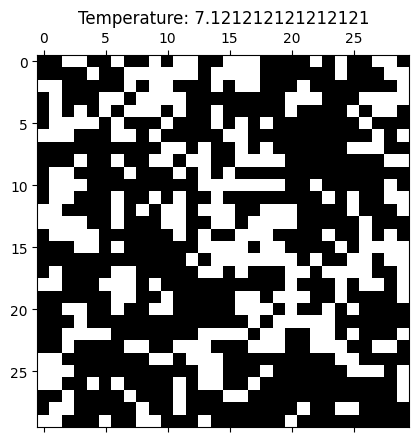

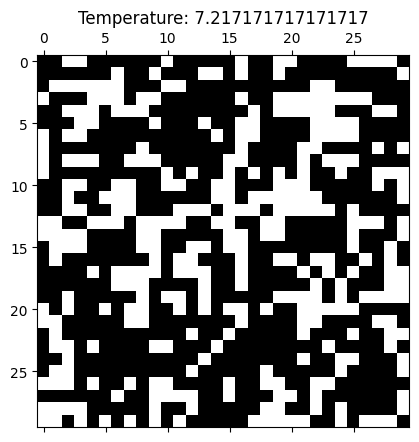

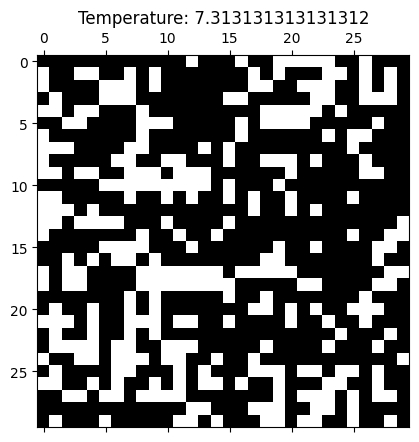

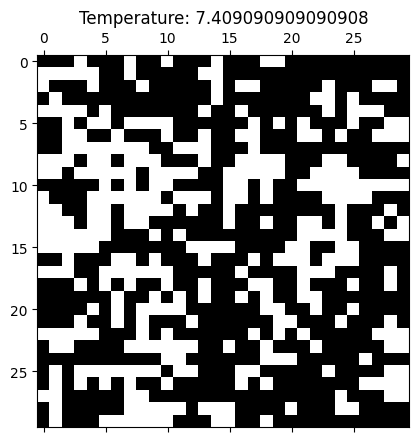

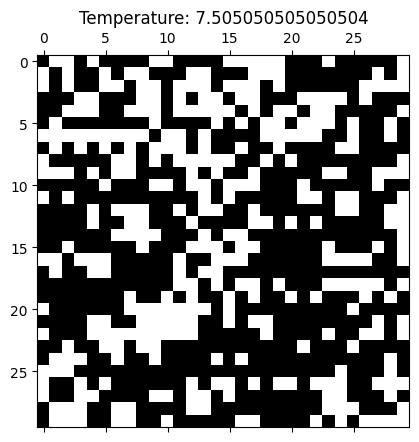

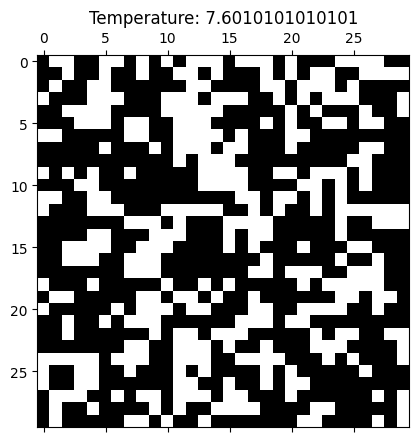

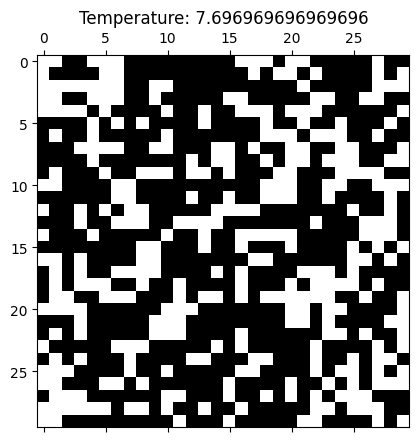

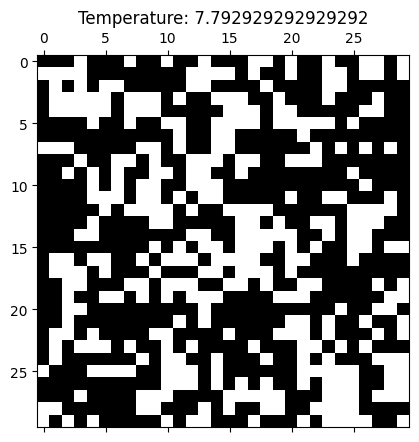

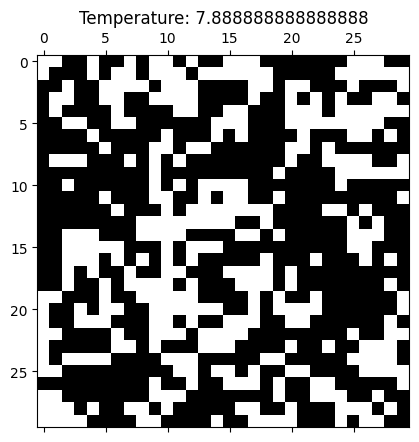

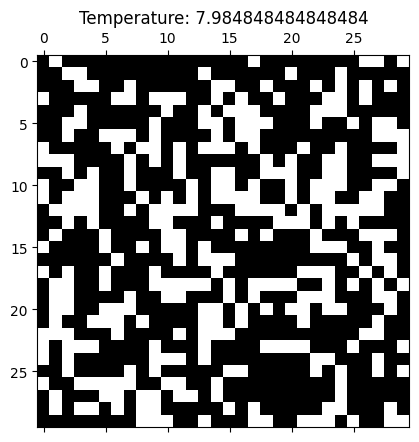

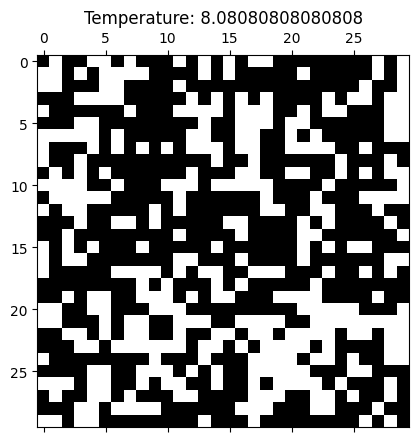

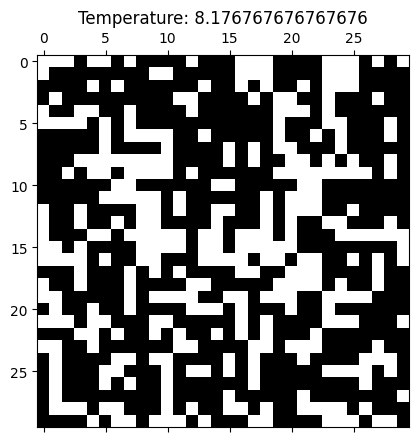

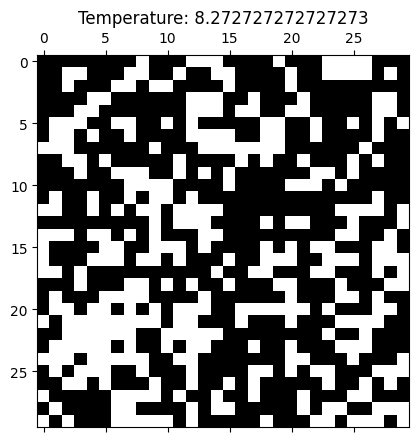

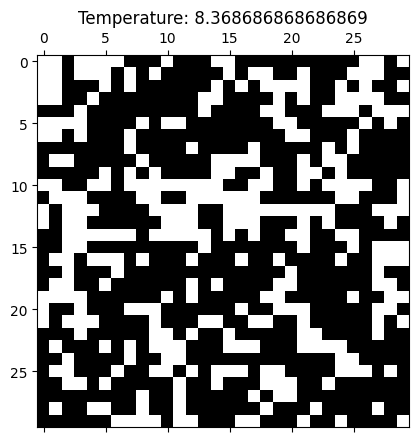

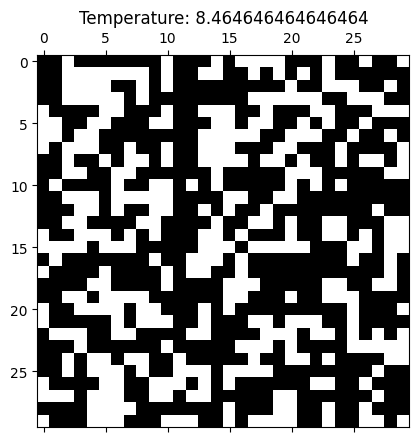

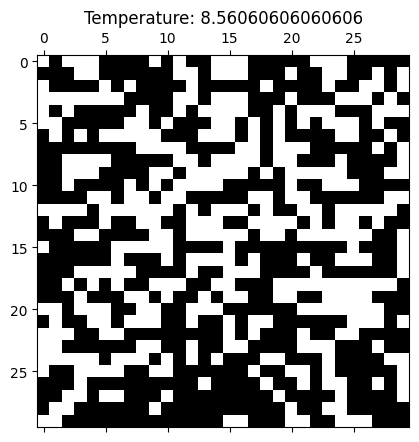

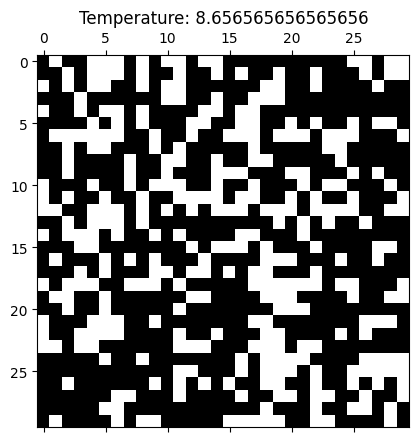

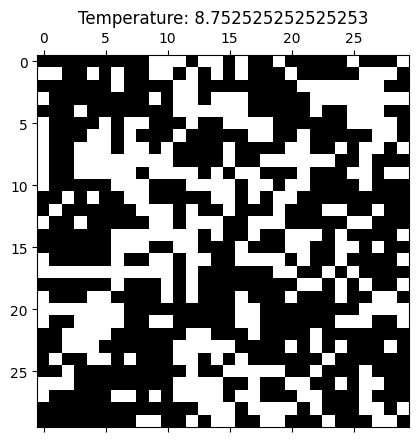

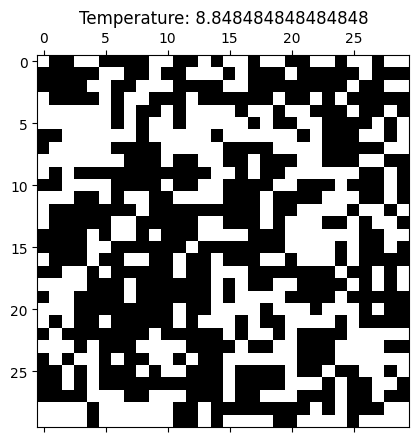

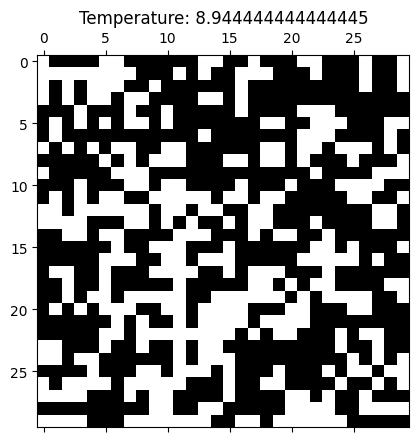

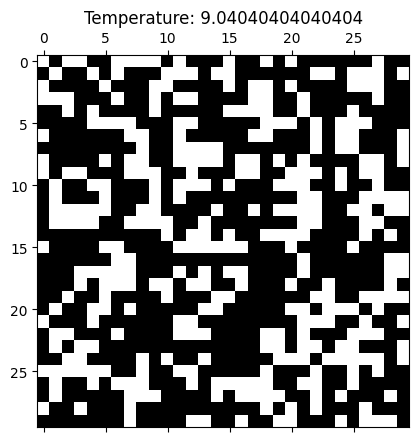

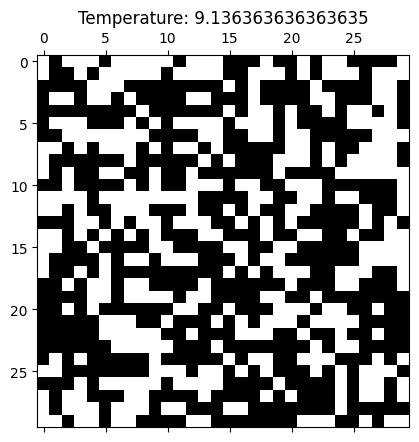

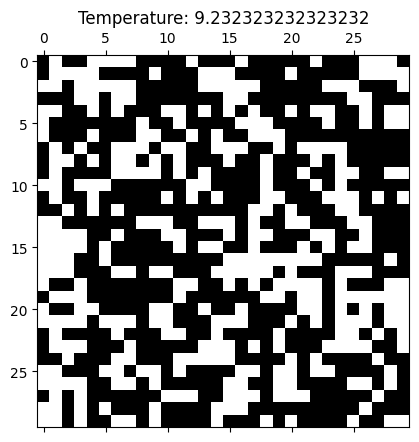

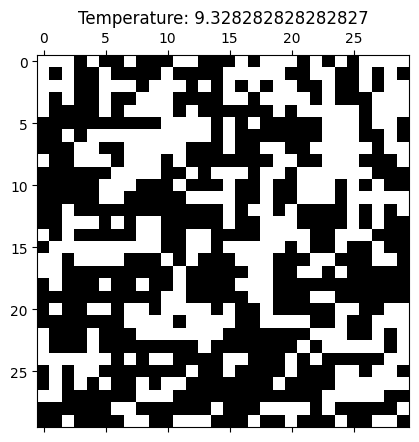

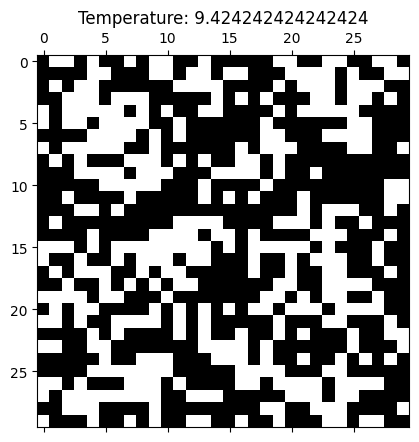

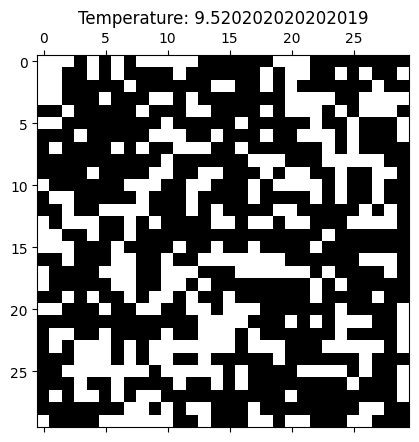

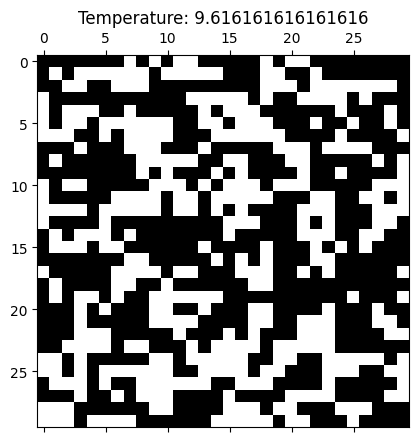

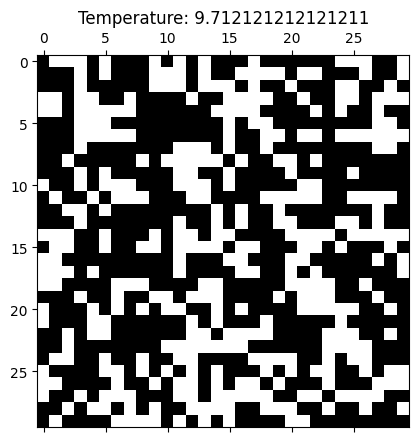

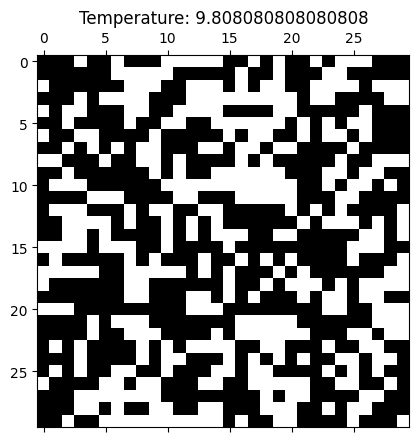

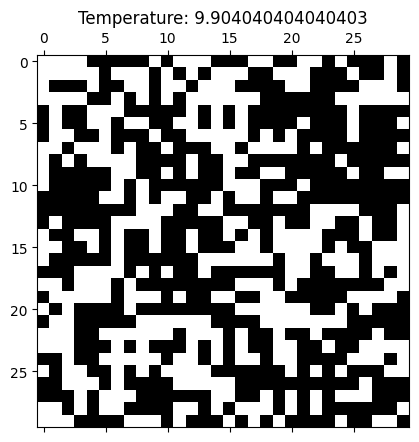

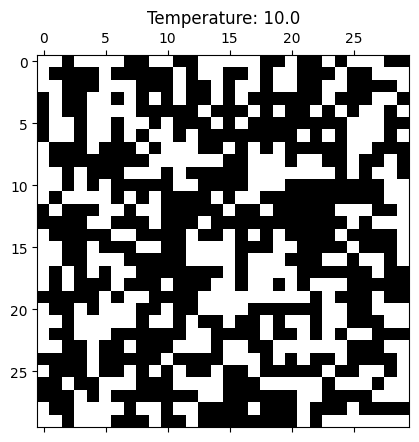

In [ ]:
# now do it with different magneitzation
a = 3
internal_energy_list_temp_mag = []
internal_energy_variance_list_temp_mag = []
magnetization_list_temp_mag = []
magnetization_variance_list_temp_mag = []
heat_capacity_list_temp_mag = []
susceptibility_list_temp_mag = []

for temp in temperature_list:
    grid_array_mag = generate_grid_with_tendency(length_grid,0.7)

    for i in range(steps_equibrilium):
        grid_array_mag,count = Hamiltonian_Monte_carlo(grid = grid_array_mag,temperature = temp, a = a)

    internal_energy_list_temp_mag.append(U(grid_array_mag, a)) #measure internal eneryg after equibrilium
    magnetization_list_temp_mag.append(M(grid_array_mag))      #measure magnetization after equibrilium

    for i in range(steps_measurement): #for measurement of variance
        grid_array_mag,count = Hamiltonian_Monte_carlo(grid = grid_array_mag,temperature = temp, a = a)
        internal_energy_variance_list_temp_mag.append(U(grid_array_mag,a))
        magnetization_variance_list_temp_mag.append(M(grid_array_mag))

    heat_capacity_list_temp_mag.append(heat_capacity(internal_energy_variance_list_temp_mag,temp))
    susceptibility_list_temp_mag.append(susceptibility(magnetization_variance_list_temp_mag,temp))   

    plt.matshow(grid_array_mag,cmap='gray')
    plt.title('Temperature: '+str(temp))
    plt.savefig('/Users/alex/Desktop/Ising Model/Ising-Model/pics_temperature_dependence/ising_model_temp'+str(temp)+'.png')

Text(0.5, 1.0, 'Internal Energy with magnetic field')

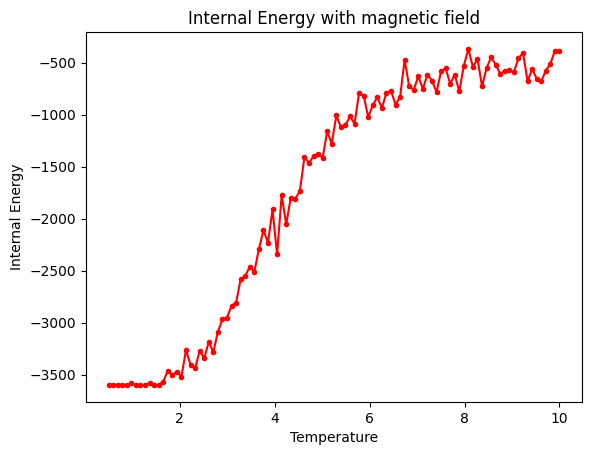

In [113]:
plt.plot(temperature_list,internal_energy_list_temp_mag, "-", marker='.',color='red')
plt.xlabel('Temperature')
plt.ylabel('Internal Energy')
plt.title('Internal Energy with magnetic field')

Text(0.5, 1.0, 'Magnetization with magnetic field')

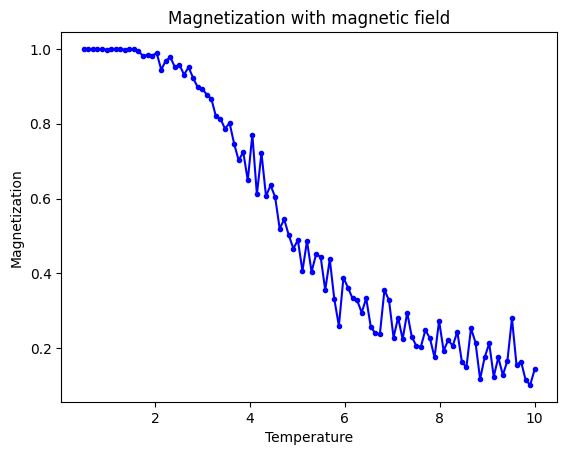

In [114]:
plt.plot(temperature_list,np.abs(magnetization_list_temp_mag), "-", marker='.',color='blue')
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization with magnetic field')

Text(0.5, 1.0, 'Heat Capacity with magnetic field')

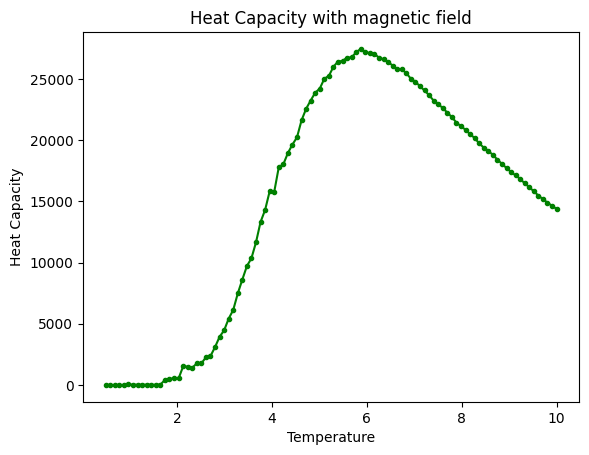

In [115]:
plt.plot(temperature_list,heat_capacity_list_temp_mag, "-", marker='.',color='green')
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity with magnetic field')

Text(0.5, 1.0, 'Susceptibility with magnetic field')

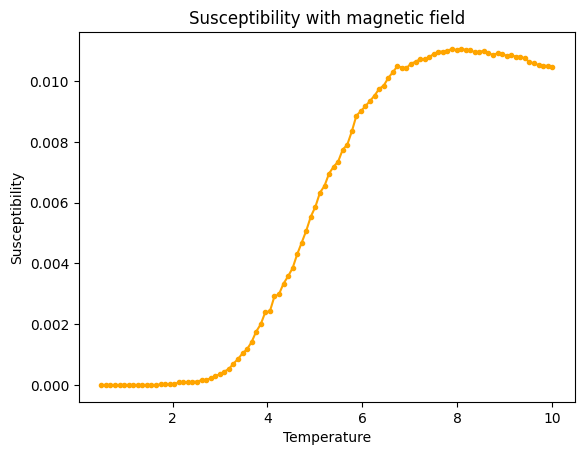

In [116]:
plt.plot(temperature_list,susceptibility_list_temp_mag, "-", marker='.',color='orange')
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.title('Susceptibility with magnetic field')

### Comparison between without B and with B

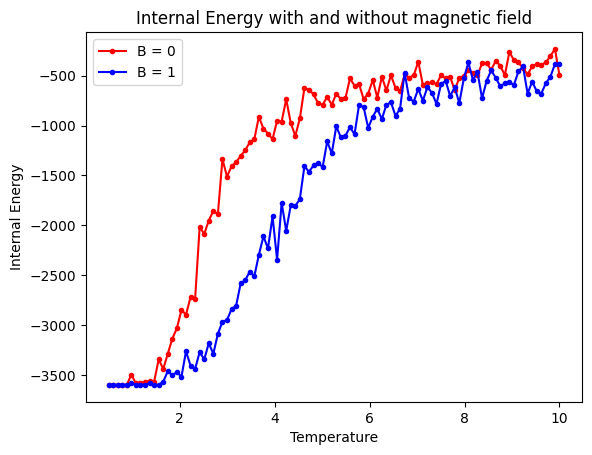

In [117]:
plt.plot(temperature_list,internal_energy_list_temp, "-", marker='.',color='red', label = "B = 0")
plt.plot(temperature_list,internal_energy_list_temp_mag, "-", marker='.',color='blue', label = f"B = {a}")
plt.xlabel('Temperature')
plt.ylabel('Internal Energy')
plt.title('Internal Energy with and without magnetic field')
plt.legend()

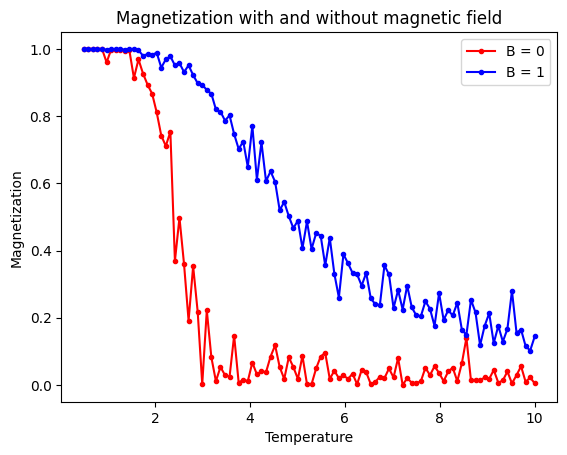

In [118]:
plt.plot(temperature_list,np.abs(magnetization_list_temp), "-", marker='.',color='red', label = "B = 0")
plt.plot(temperature_list,np.abs(magnetization_list_temp_mag), "-", marker='.',color='blue', label = f"B = {a}")
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization with and without magnetic field')
plt.legend()

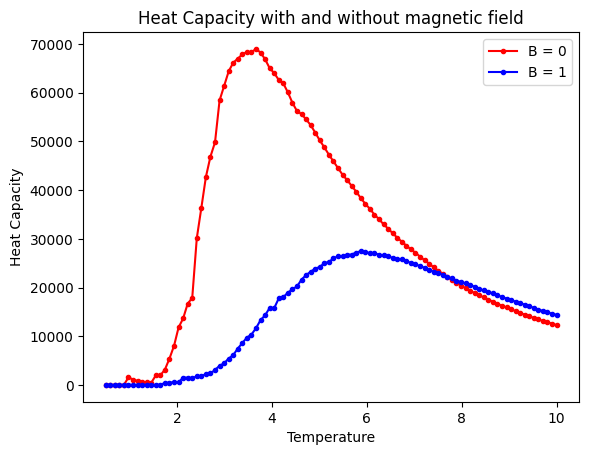

In [119]:
plt.plot(temperature_list,heat_capacity_list_temp, "-", marker='.',color='red', label = "B = 0")
plt.plot(temperature_list,heat_capacity_list_temp_mag, "-", marker='.',color='blue', label = f"B = {a}")
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.title('Heat Capacity with and without magnetic field')
plt.legend()

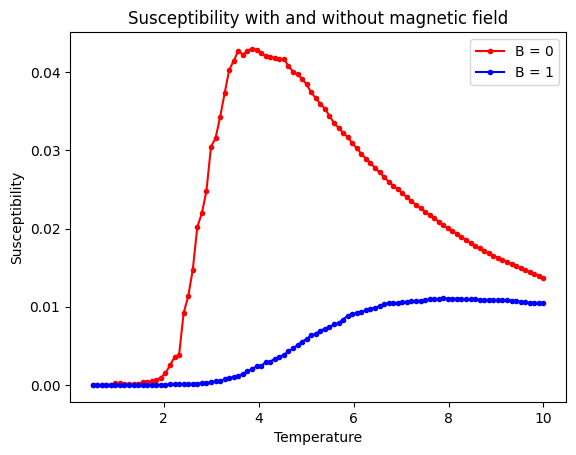

In [120]:
plt.plot(temperature_list,susceptibility_list_temp, "-", marker='.',color='red', label = "B = 0")
plt.plot(temperature_list,susceptibility_list_temp_mag, "-", marker='.',color='blue', label = f"B = {a}")
plt.xlabel('Temperature')
plt.ylabel('Susceptibility')
plt.title('Susceptibility with and without magnetic field')
plt.legend()